In [4]:
import random

"cpu.q@compute" + str( random.randint (1,14) ).zfill(2)

'cpu.q@compute08'

### Sum of mixture 측정

In [2]:
import glob, subprocess, os
import pandas as pd
import numpy as np

DIR = "/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_1D"

SAMPLE_DIR_LIST = glob.glob (DIR + "/*input")
SAMPLE_DIR_LIST = sorted ( SAMPLE_DIR_LIST )
BENCHMARK_NO = 30

som = np.zeros ( (len(SAMPLE_DIR_LIST), BENCHMARK_NO), dtype = "float")
selected_sample = []


print ("###### MRS 1D dataset (n = 500) 의  sum of mixture ######\n")

for SAMPLE_i, SAMPLE_DIR in enumerate (SAMPLE_DIR_LIST):
    for i in range (1, BENCHMARK_NO + 1):
        with open(SAMPLE_DIR + "/GAP_new/500_0_0.1_0.1/" + str(i) + "/0.input_mixture.txt") as input_file:
            for line_i, line in enumerate(input_file):
                if line_i == 1:
                    som [ SAMPLE_i ] [ i - 1 ] = float (  line.rstrip("\n").split (" : ")[1]  )
                    break
                
    if ( round ( np.mean ( som[SAMPLE_i]  ) , 2 ) > 0.95 )  & ( round ( np.mean ( som[SAMPLE_i]  ) , 2 ) < 1.02):
        selected_sample.append ( SAMPLE_DIR.split("/")[-1] )
        
    print ("{} : {}".format ( SAMPLE_DIR.split("/")[-1], round ( np.mean ( som[SAMPLE_i]  ) , 2 )) )

#print (line.rstrip("\n").split (" : ")[1])
print ( sorted( selected_sample) )

###### MRS 1D dataset (n = 500) 의  sum of mixture ######

M1-1_input : 0.98
M1-2_input : 0.97
M1-3_input : 0.93
M1-4_input : 0.96
M1-5_input : 0.94
M1-6_input : 0.9
M1-7_input : 0.94
M1-8_input : 0.91
M1-9_input : 0.96
M2-10_input : 0.93
M2-11_input : 0.94
M2-12_input : 0.94
M2-1_input : 0.95
M2-2_input : 0.96
M2-3_input : 0.96
M2-4_input : 0.97
M2-5_input : 0.97
M2-6_input : 0.94
M2-7_input : 0.92
M2-8_input : 0.92
M2-9_input : 0.97
M3-10_input : 0.91
M3-11_input : 0.89
M3-12_input : 0.9
M3-13_input : 0.94
M3-14_input : 0.92
M3-15_input : 0.91
M3-16_input : 0.93
M3-17_input : 0.93
M3-18_input : 0.94
M3-1_input : 0.96
M3-2_input : 0.94
M3-3_input : 0.93
M3-4_input : 0.93
M3-5_input : 0.93
M3-6_input : 0.91
M3-7_input : 0.92
M3-8_input : 0.92
M3-9_input : 0.89
['M1-1_input', 'M1-2_input', 'M1-4_input', 'M1-9_input', 'M2-2_input', 'M2-3_input', 'M2-4_input', 'M2-5_input', 'M2-9_input', 'M3-1_input']


### Hard vs Fuzzy 개수 비교

In [13]:
import glob, subprocess, os
import pandas as pd
DIR = "/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput"

# for SimCellBio in ["simulation_2D", "simulation_3D"]:
#     if (SimCellBio == "simulation_2D") & (SimCellBio == "MRS"):
#         NUM_BLOCK = 2
#     elif SimCellBio == "simulation_3D":
#         NUM_BLOCK = 3
        
#     CLONE_LIST = glob.glob (DIR + "/" + SimCellBio + "/*")
#     CLONE_LIST = [i.split("/")[-1] for i in CLONE_LIST]

#     for Clone_No in CLONE_LIST:
#         TRIAL_LIST = glob.glob (DIR + "/" + SimCellBio + "/" + Clone_No + "/*")
#         TRIAL_LIST = [i.split("/")[-1] for i in TRIAL_LIST]
#         TRIAL_LIST = sorted ( [ int(i) for i in TRIAL_LIST  if len(i) <= 2  ] )

#         for Trial in TRIAL_LIST:
#             try:
#                 df_hard = pd.read_csv (DIR + "/" + SimCellBio + "/" + Clone_No  + "/" +  str(Trial) + "/CLEMENT_hard_1st.results.txt" , sep = "\t", header = None)
#             except:
#                 print ("df_hard에 문제가 있다.", DIR + "/" + SimCellBio + "/" + Clone_No  + "/" +  str(Trial) + "/CLEMENT_hard_1st.results.txt")
                
#             # try:
#             #     df_soft = pd.read_csv (DIR + "/" + SimCellBio + "/" + Clone_No  + "/" +  str(Trial) + "/CLEMENT_soft_1st.results.txt" , sep = "\t", header = None)
#             # except:
#             #     print ("df_soft에 문제가 있다.", DIR + "/" + SimCellBio + "/" + Clone_No  + "/" +  str(Trial) + "/CLEMENT_soft_1st.results.txt")
            
#             #print (df_hard)
            
            
for SimCellBio in ["M1-3_M1-8_input", "M1-2_M1-6_input", "M1-5_M1-6_input"]:
    NUM_BLOCK = 2
        
    TRIAL_LIST = glob.glob (DIR + "/MRS/" + SimCellBio + "/500_2_0.1_0.1/*")
    TRIAL_LIST = [i.split("/")[-1] for i in TRIAL_LIST]
    TRIAL_LIST = sorted ( [ int(i) for i in TRIAL_LIST  if len(i) <= 2  ] )
    
    
    for Trial in TRIAL_LIST:
        df_hard = pd.read_csv ( DIR + "/MRS/" + SimCellBio + "/500_2_0.1_0.1/" +  str(Trial) + "/CLEMENT_hard_1st.results.txt" , sep = "\t", header = None)
        df_soft = pd.read_csv ( DIR + "/MRS/" + SimCellBio + "/500_2_0.1_0.1/" +  str(Trial) + "/CLEMENT_soft_1st.results.txt" , sep = "\t", header = None)
        
        print ("{}\tTrial : {}\tdf_hard : {} vs df_soft : {}".format ( SimCellBio, Trial, df_hard.iloc[0][1] , df_soft.iloc[0][1] ))

M1-3_M1-8_input	Trial : 1	df_hard : 7 vs df_soft : 6
M1-3_M1-8_input	Trial : 2	df_hard : 6 vs df_soft : 6
M1-3_M1-8_input	Trial : 3	df_hard : 6 vs df_soft : 5
M1-3_M1-8_input	Trial : 4	df_hard : 6 vs df_soft : 5
M1-3_M1-8_input	Trial : 5	df_hard : 5 vs df_soft : 7
M1-3_M1-8_input	Trial : 6	df_hard : 7 vs df_soft : 5
M1-3_M1-8_input	Trial : 7	df_hard : 6 vs df_soft : 6
M1-3_M1-8_input	Trial : 8	df_hard : 7 vs df_soft : 6
M1-3_M1-8_input	Trial : 9	df_hard : 6 vs df_soft : 6
M1-3_M1-8_input	Trial : 10	df_hard : 6 vs df_soft : 5
M1-2_M1-6_input	Trial : 1	df_hard : 4 vs df_soft : 6
M1-2_M1-6_input	Trial : 2	df_hard : 4 vs df_soft : 6
M1-2_M1-6_input	Trial : 3	df_hard : 4 vs df_soft : 7
M1-2_M1-6_input	Trial : 4	df_hard : 4 vs df_soft : 6
M1-2_M1-6_input	Trial : 5	df_hard : 4 vs df_soft : 7
M1-2_M1-6_input	Trial : 6	df_hard : 4 vs df_soft : 6
M1-2_M1-6_input	Trial : 7	df_hard : 4 vs df_soft : 6
M1-2_M1-6_input	Trial : 8	df_hard : 4 vs df_soft : 7
M1-2_M1-6_input	Trial : 9	df_hard : 4 vs df_s

FileNotFoundError: [Errno 2] No such file or directory: '/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS/M1-2_M1-6_input/500_2_0.1_0.1/11/CLEMENT_soft_1st.results.txt'

### Error 난 log 파일이 있는지 살펴보기

In [2]:
import glob, subprocess, os
DIR = "/data/project/Alzheimer/YSscript/EM_MRS/log"

for SimCellBio in ["simulation_1D", "simulation_2D", "simulation_3D"]:
    if SimCellBio == "simulation_1D":
        NUM_BLOCK = 1
    elif SimCellBio == "simulation_2D":
        NUM_BLOCK = 2
    elif SimCellBio == "simulation_3D":
        NUM_BLOCK = 3


    CLONE_LIST = glob.glob (DIR + "/decoy/FP/" + SimCellBio + "/*")
    CLONE_LIST = [i.split("/")[-1] for i in CLONE_LIST]

    for Clone_No in CLONE_LIST:
        TRIAL_LIST = glob.glob (DIR + "/" + SimCellBio + "/" + Clone_No + "/*")
        TRIAL_LIST = [i.split("/")[-1] for i in TRIAL_LIST]
        TRIAL_LIST = sorted ( [ int(i) for i in TRIAL_LIST  if "visualization" not in i  ] )
        
        print (Clone_No)

        for Trial in TRIAL_LIST:
            logFile = glob.glob (DIR + "/" + SimCellBio + "/" + Clone_No  + "/" +  str(Trial) + "/*.o*")
            for log in logFile:
                try:
                    if open(log, 'r').read().find( "Job_exited_code: 1") != -1:
                        print ( "NUM_CLONE = {}\tBENCHMARK_I = {}\tlog = {}".format (Clone_No, Trial, log) )
                        # os.system ("python3 simulationdataset_master.py --NUM_CLONE {} --NUM_BLOCK {} --BENCHMARK_START {} --BENCHMARK_END {} --FP_RATIO 0.1 --SIMDATA decoy"
                        #                     .format (Clone_No.split("_")[1], NUM_BLOCK, Trial, Trial ))
                except:
                    continue

#python3 simulationdataset_master.py --NUM_CLONE 4 --NUM_BLOCK 2 --BENCHMARK_START 0 --BENCHMARK_END 99 --FP_RATIO 0.1 --SIMDATA decoy

## NUM_CLONE 2 ~ 7을 한번에 받아서 비교하기

M1-4_M1-7_input
	0	CLEMENT_decision	RMSE : 0.4472135954999579
	0	pyclonevi	RMSE : 2.244994432064365
	0	sciclone	RMSE : 0.7483314773547883
	0	quantumclone	RMSE : 1.9183326093250879
	1	CLEMENT_decision	RMSE : 1.1135528725660044
	1	pyclonevi	RMSE : 1.3114877048604001
	1	sciclone	RMSE : 0.6633249580710799
	1	quantumclone	RMSE : 1.3856406460551018
	2	CLEMENT_decision	RMSE : 1.3856406460551018
	2	pyclonevi	RMSE : 1.2328828005937953
	2	sciclone	RMSE : 0.8717797887081347
	2	quantumclone	RMSE : 2.6229754097208002
	3	CLEMENT_decision	RMSE : 2.181742422927143
	3	pyclonevi	RMSE : 0.8
	3	sciclone	RMSE : 1.8110770276274832
	3	quantumclone	RMSE : 1.833030277982336
		CLEMENT_decision	Sample RMSE : 1.4247806848775006
		pyclonevi	Sample RMSE : 1.493318452306808
		sciclone	Sample RMSE : 1.1224972160321824
		quantumclone	Sample RMSE : 1.98997487421324
M3-1_M3-17_input
0 0
	0	CLEMENT_decision	RMSE : 1.833030277982336
0 0
	0	pyclonevi	RMSE : 1.833030277982336
0 0
	0	sciclone	RMSE : 1.833030277982336
0 0
	0	

/home/goldpm1/miniconda3/envs/cnvpytor/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


0 0
	0	CLEMENT_decision	RMSE : 2.172556098240043
0 0
	0	pyclonevi	RMSE : 2.172556098240043
0 0
	0	sciclone	RMSE : 2.172556098240043
0 0
	0	quantumclone	RMSE : 2.172556098240043
0 0
	1	CLEMENT_decision	RMSE : 2.172556098240043
0 0
	1	pyclonevi	RMSE : 2.172556098240043
0 0
	1	sciclone	RMSE : 2.172556098240043
0 0
	1	quantumclone	RMSE : 2.172556098240043
0 0
	2	CLEMENT_decision	RMSE : 2.172556098240043
0 0
	2	pyclonevi	RMSE : 2.172556098240043
0 0
	2	sciclone	RMSE : 2.172556098240043
0 0
	2	quantumclone	RMSE : 2.172556098240043
0 0
	3	CLEMENT_decision	RMSE : 2.172556098240043
0 0
	3	pyclonevi	RMSE : 2.172556098240043
0 0
	3	sciclone	RMSE : 2.172556098240043
0 0
	3	quantumclone	RMSE : 2.172556098240043
		CLEMENT_decision	Sample RMSE : 1.2930583900195691
		pyclonevi	Sample RMSE : 1.5773395322504282
		sciclone	Sample RMSE : 1.0237187113655781
		quantumclone	Sample RMSE : 2.0278066969018522
M3-5_M3-18_input
0 0
	0	CLEMENT_decision	RMSE : 2.172556098240043
0 0
	0	pyclonevi	RMSE : 2.17255609824

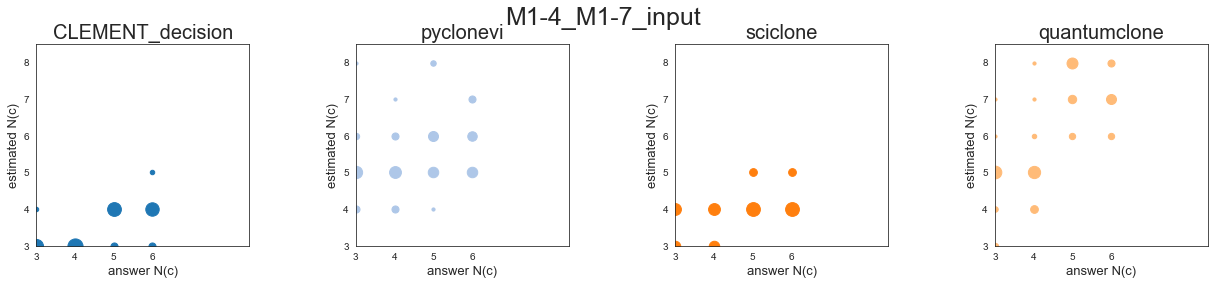

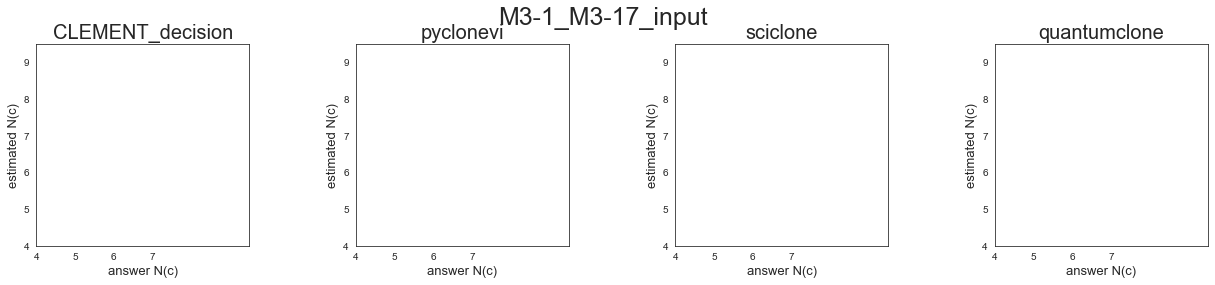

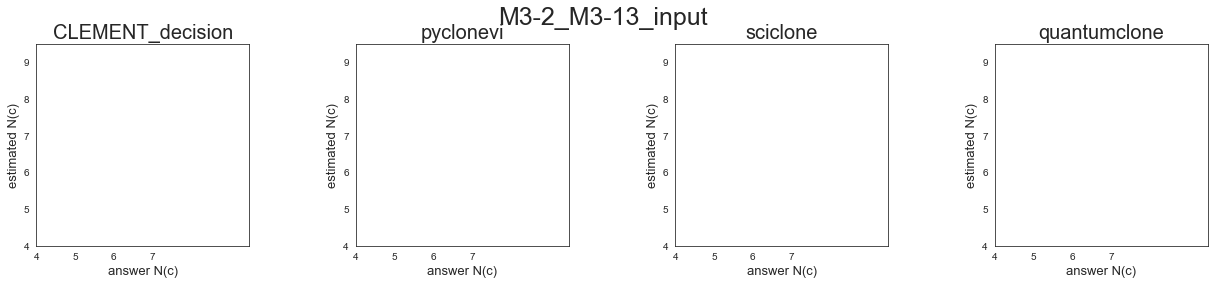

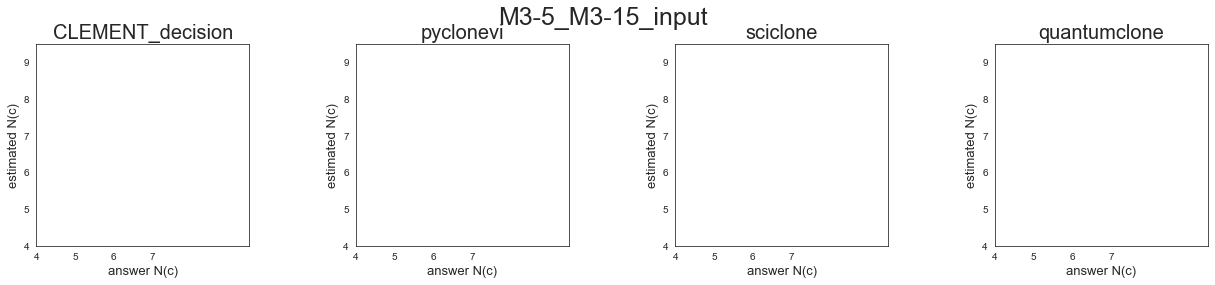

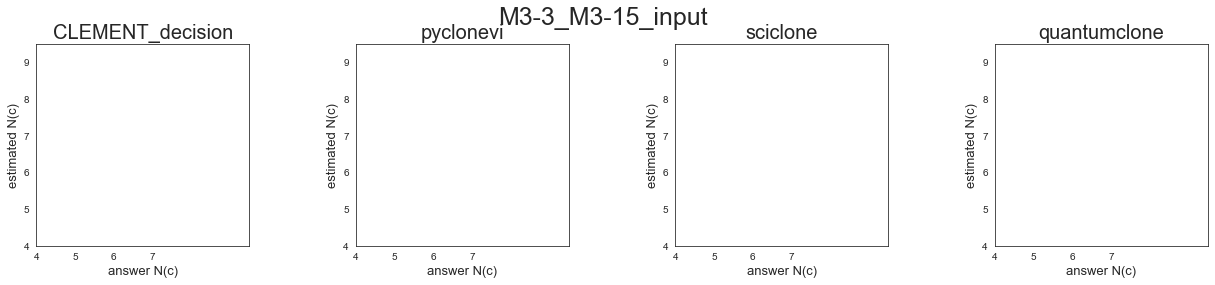

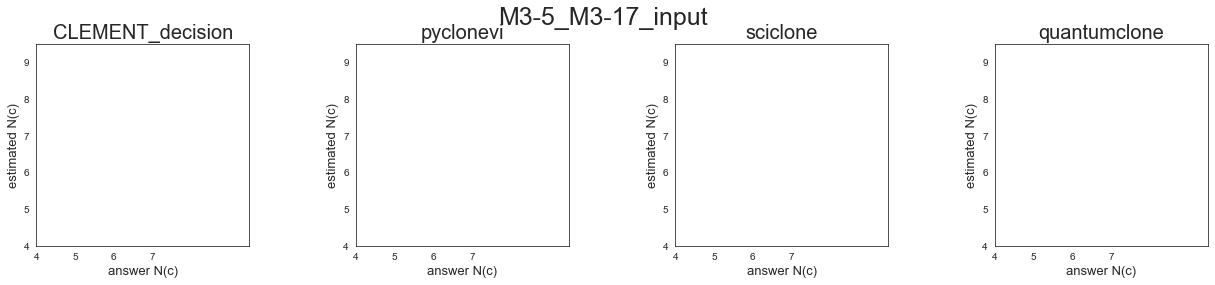

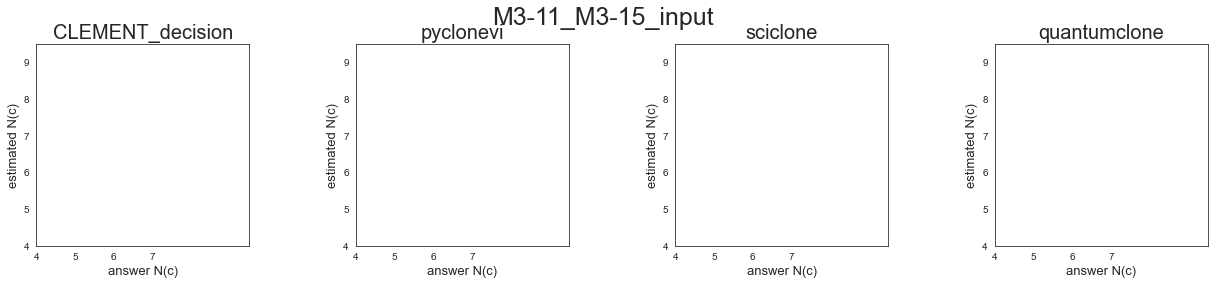

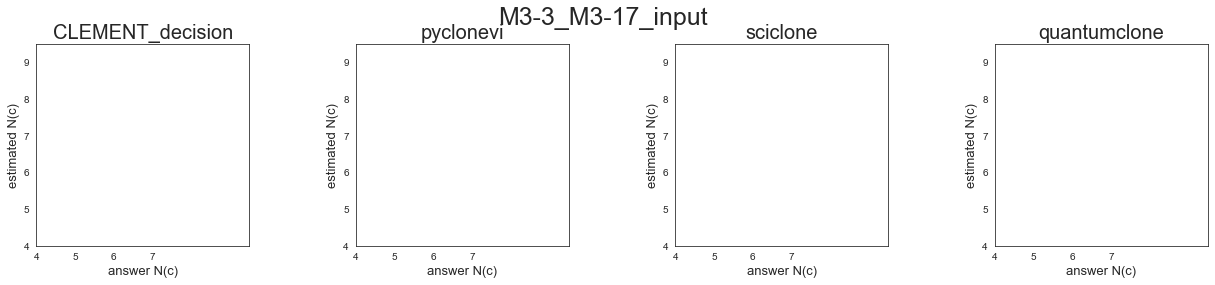

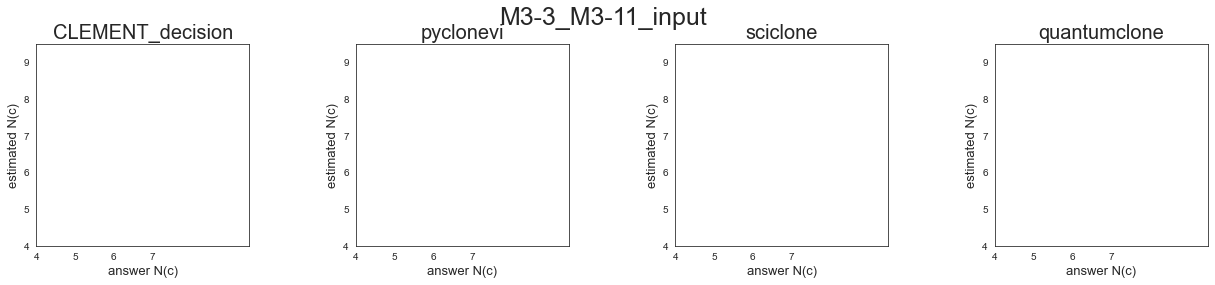

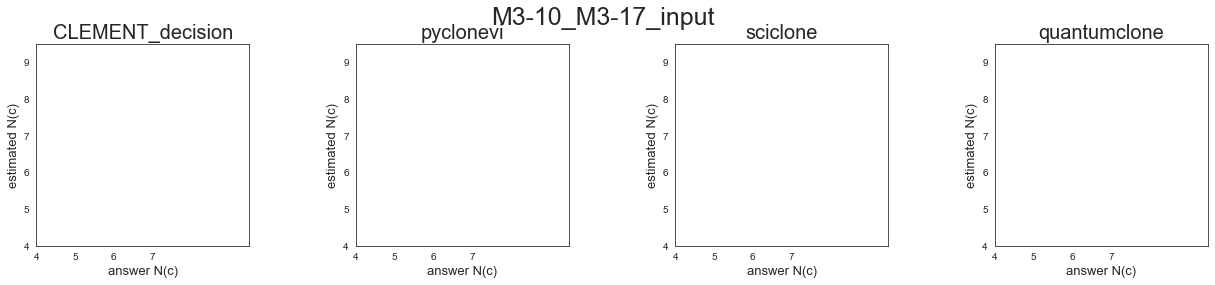

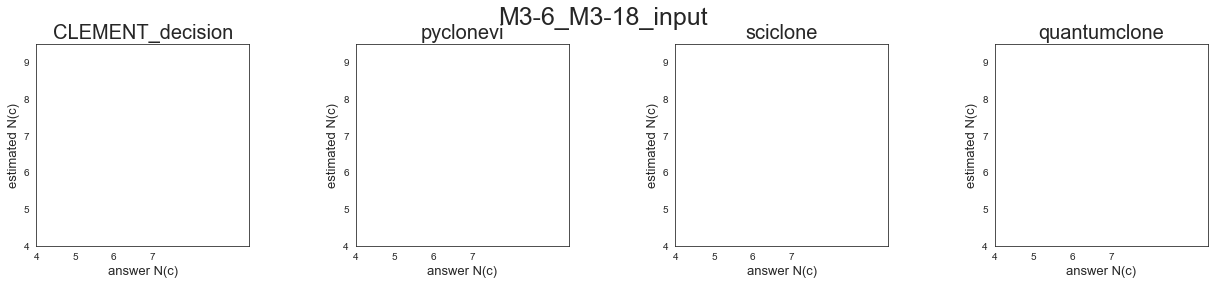

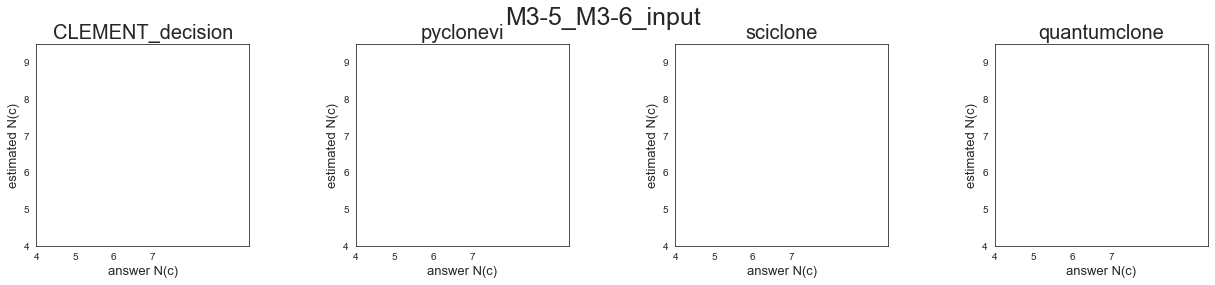

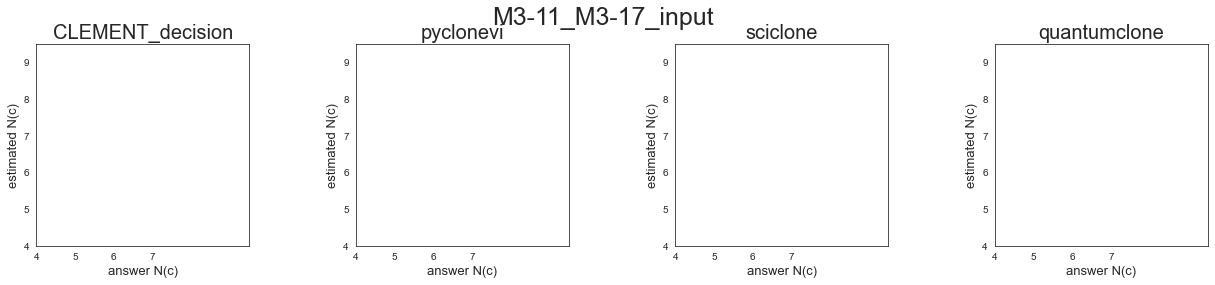

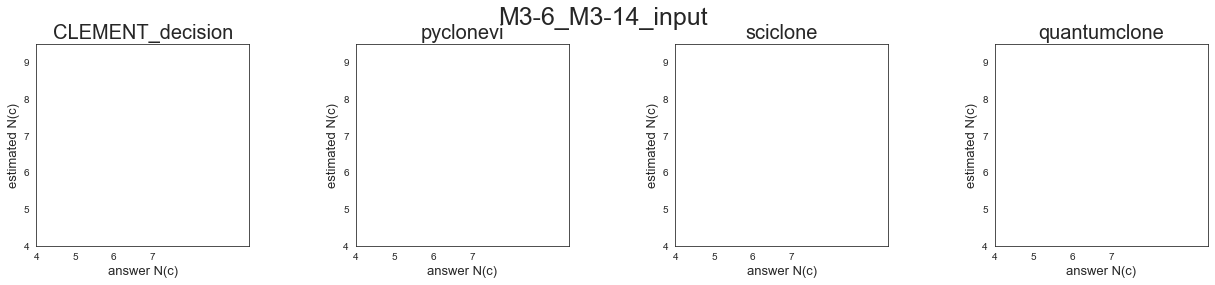

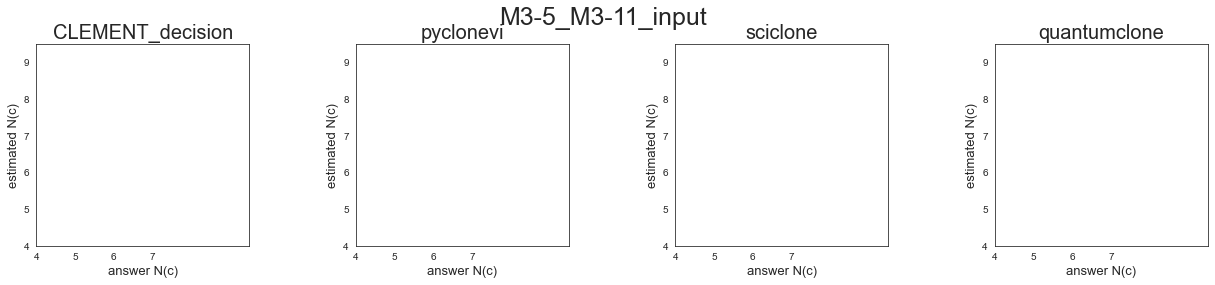

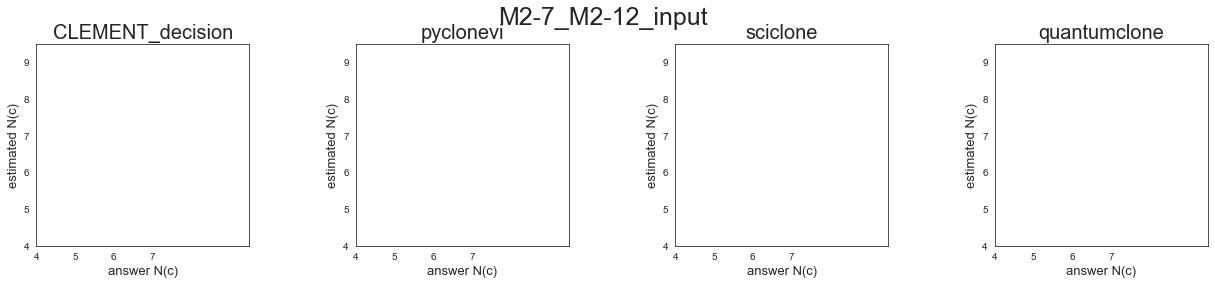

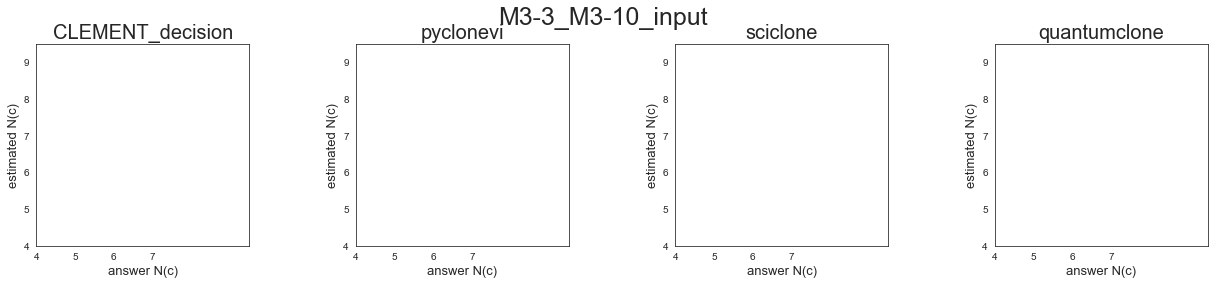

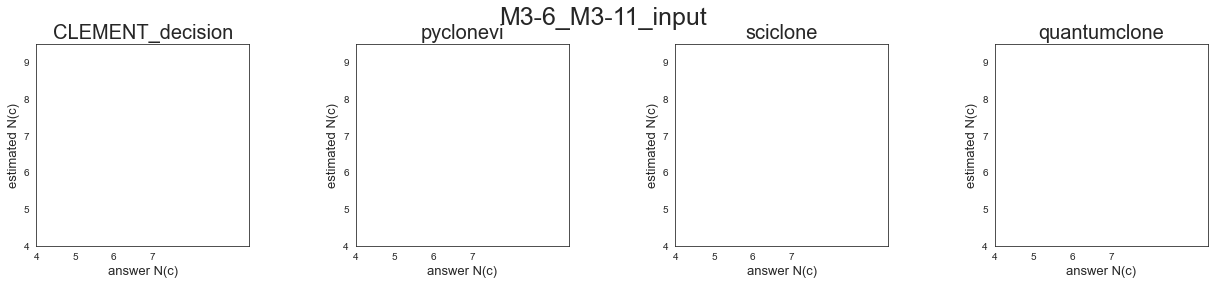

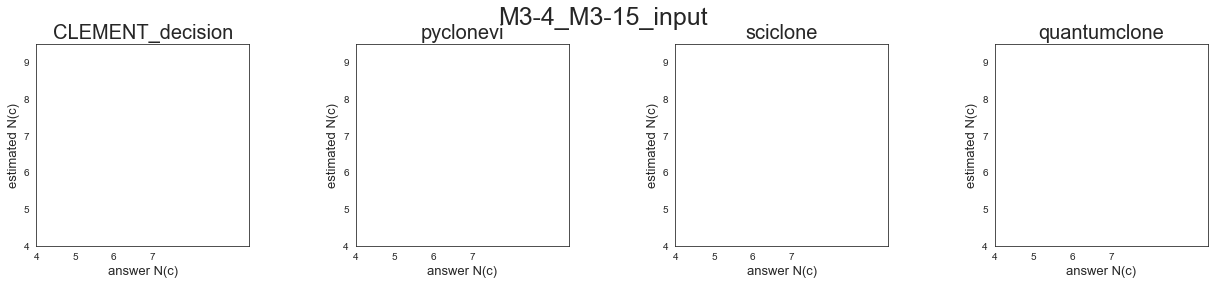

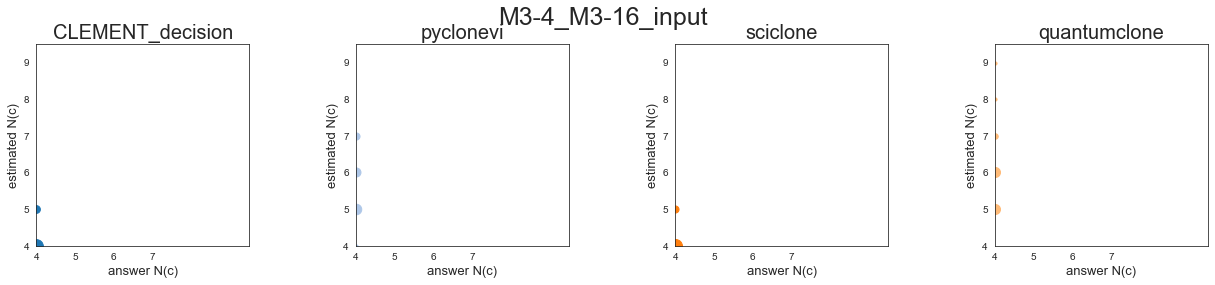

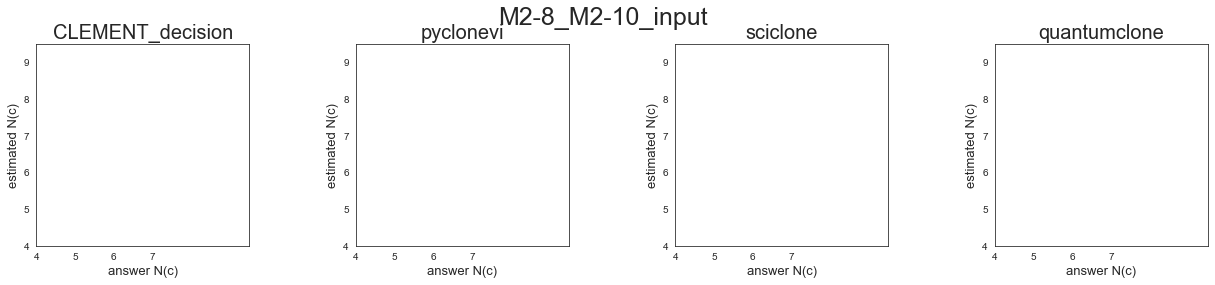

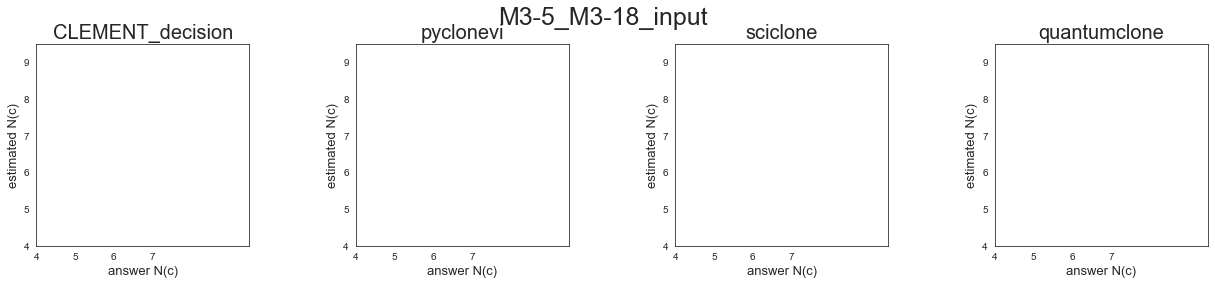

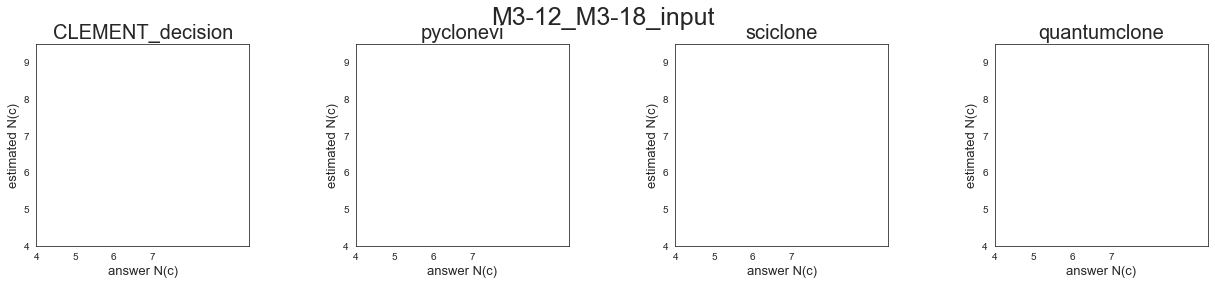

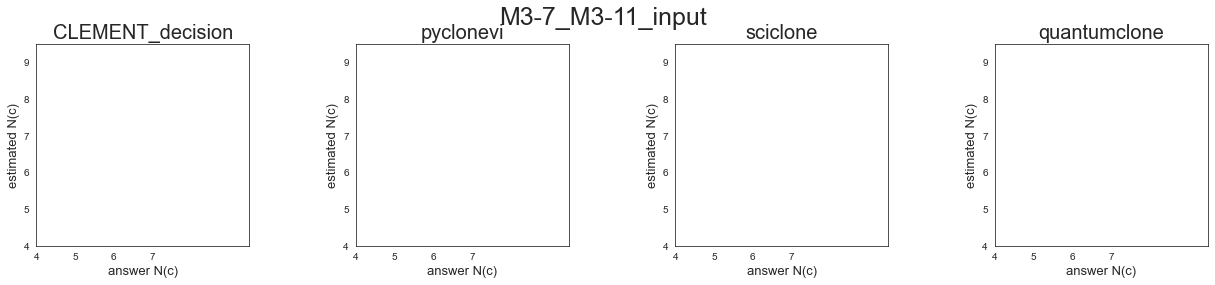

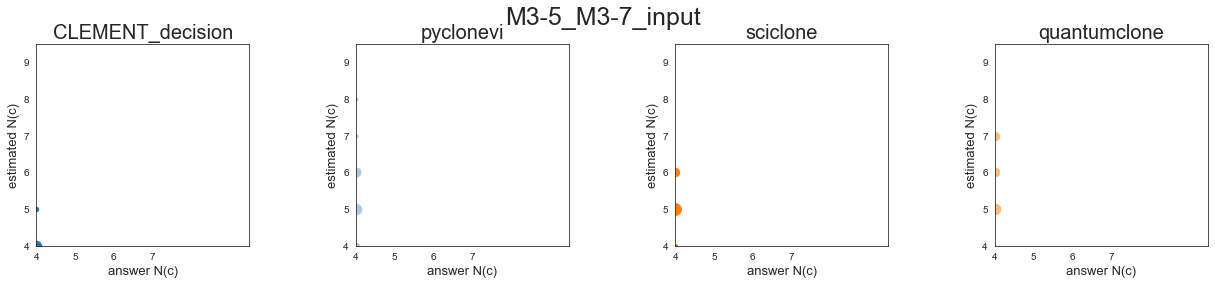

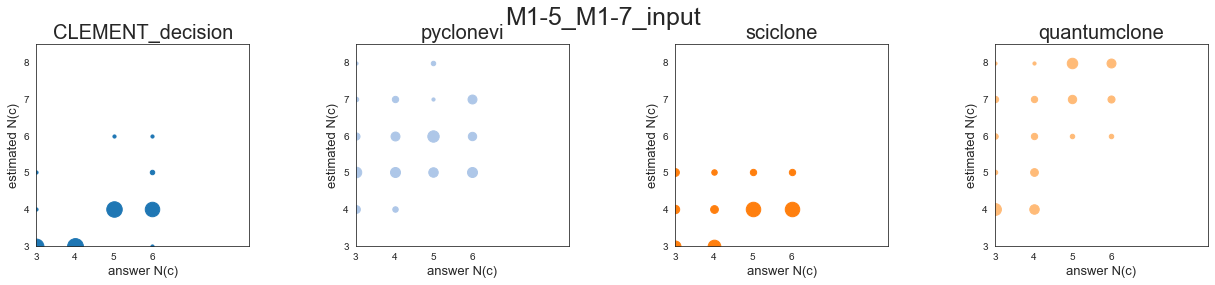

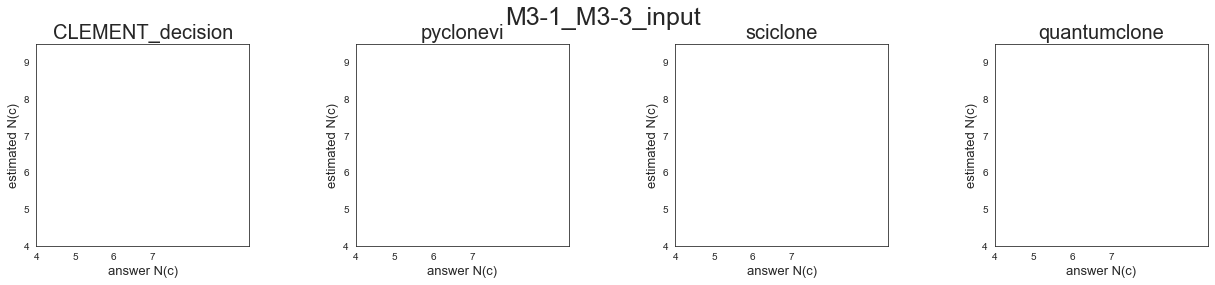

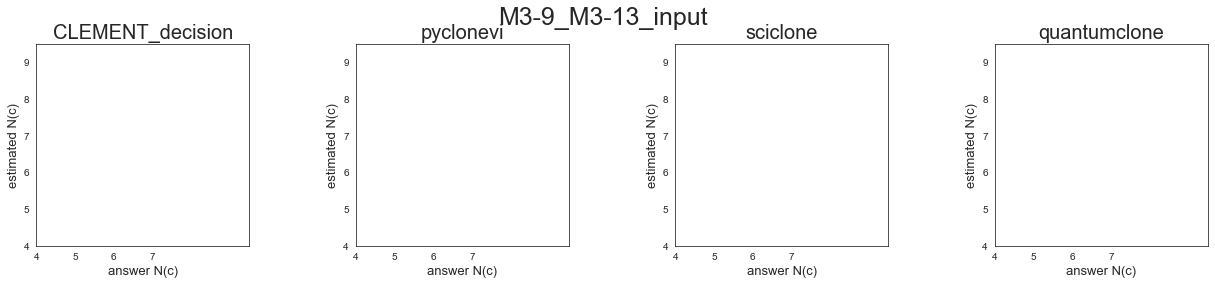

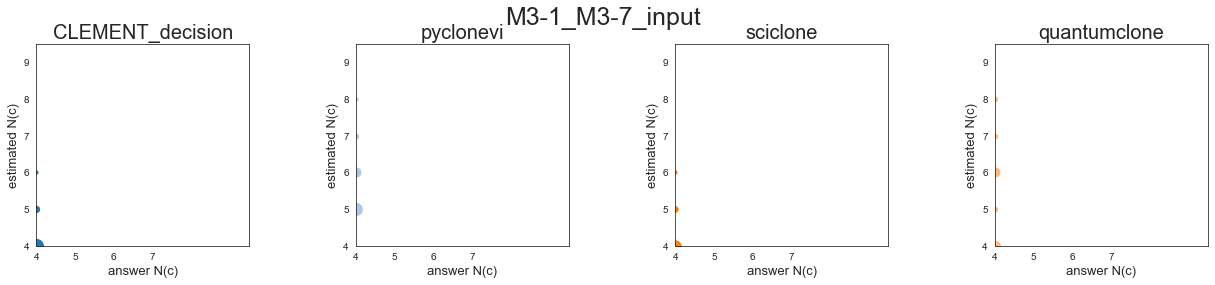

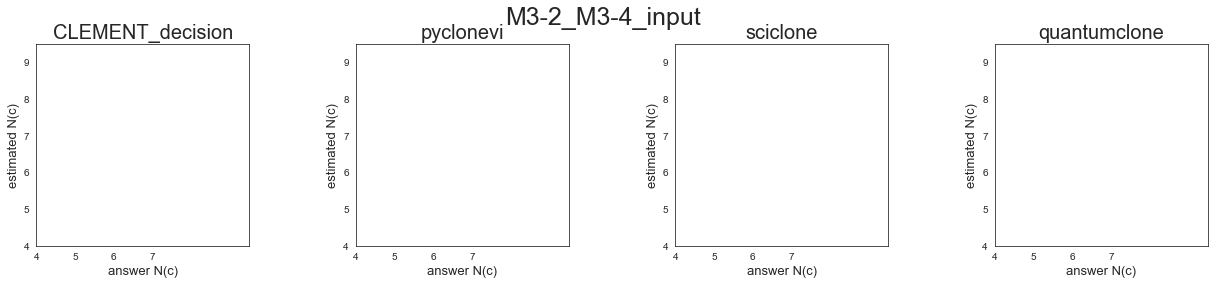

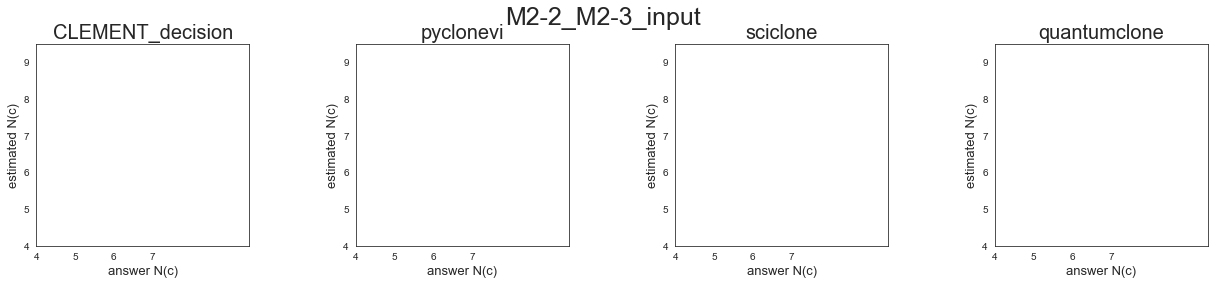

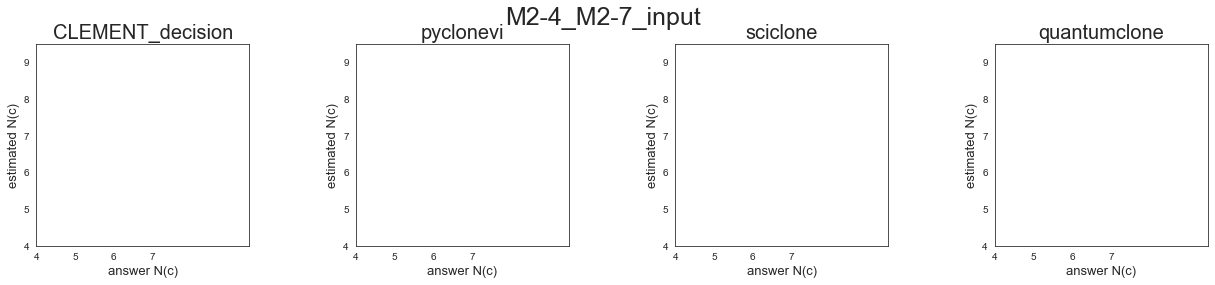

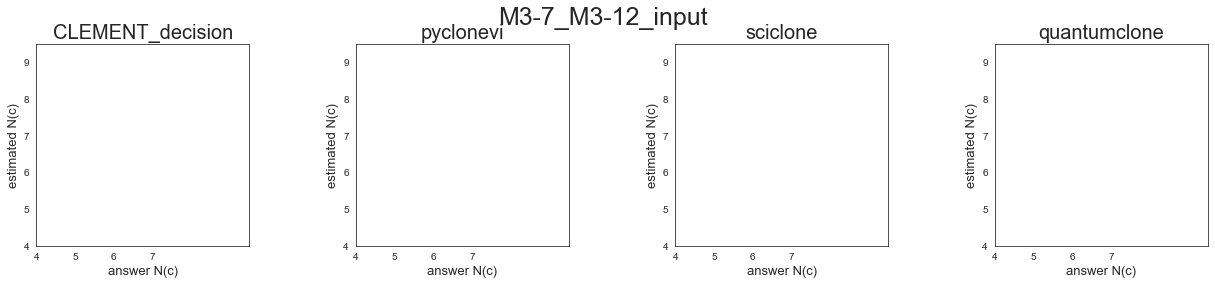

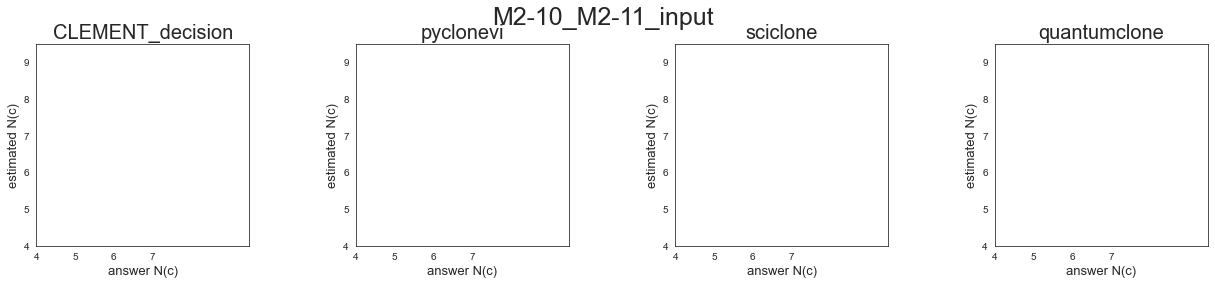

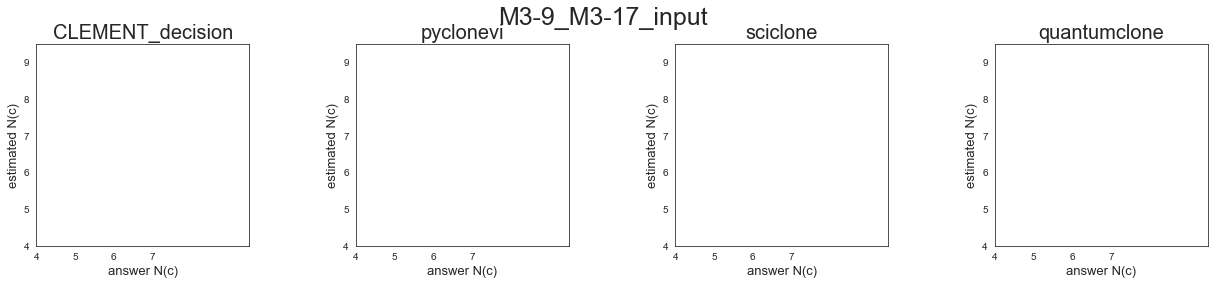

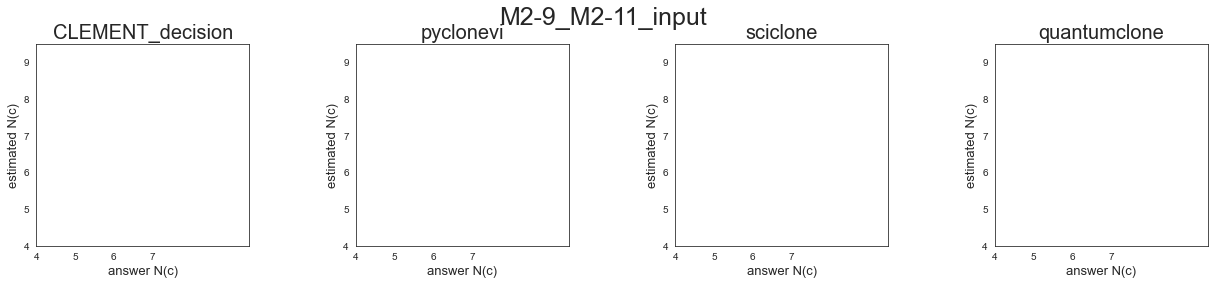

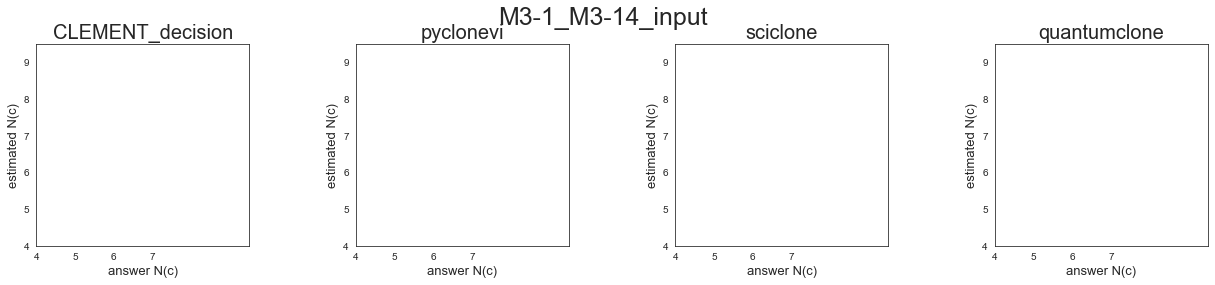

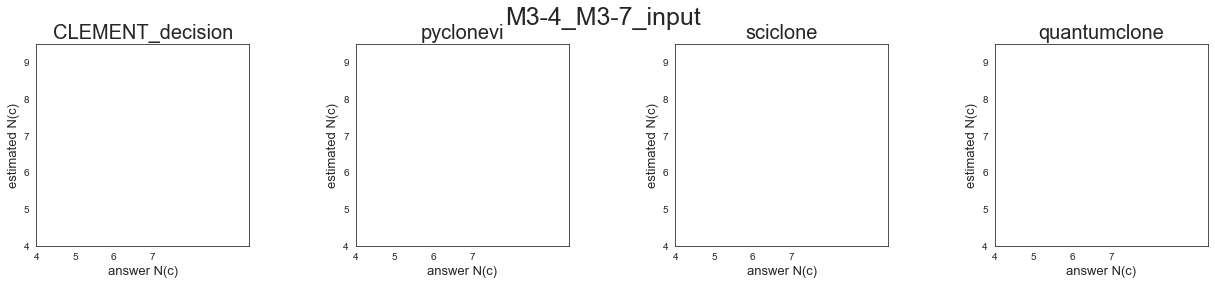

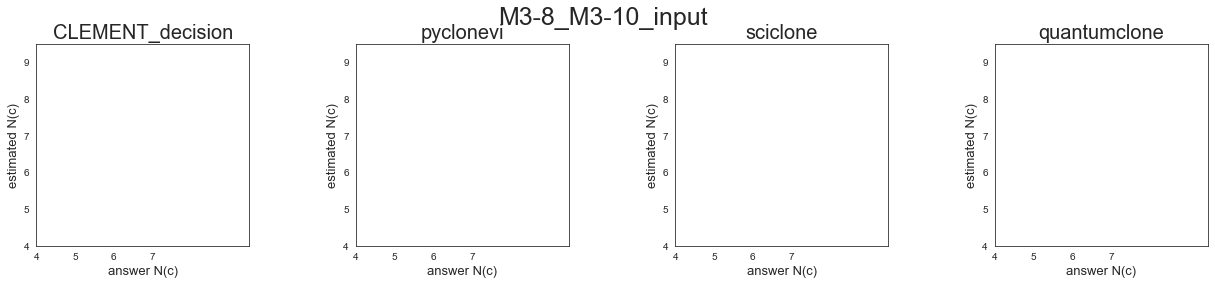

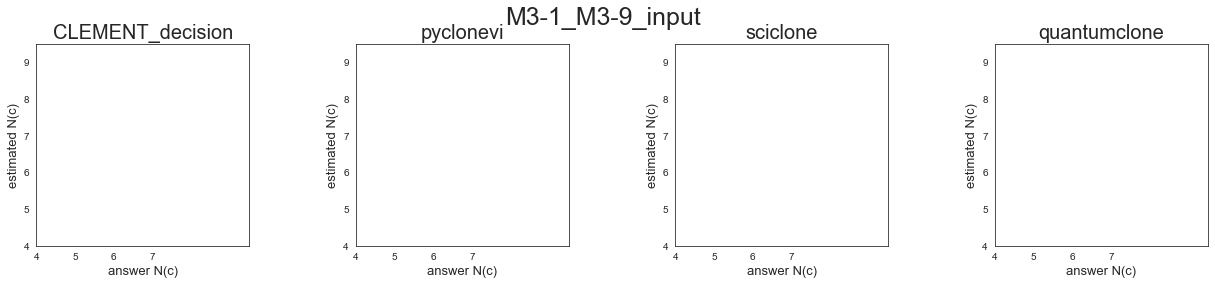

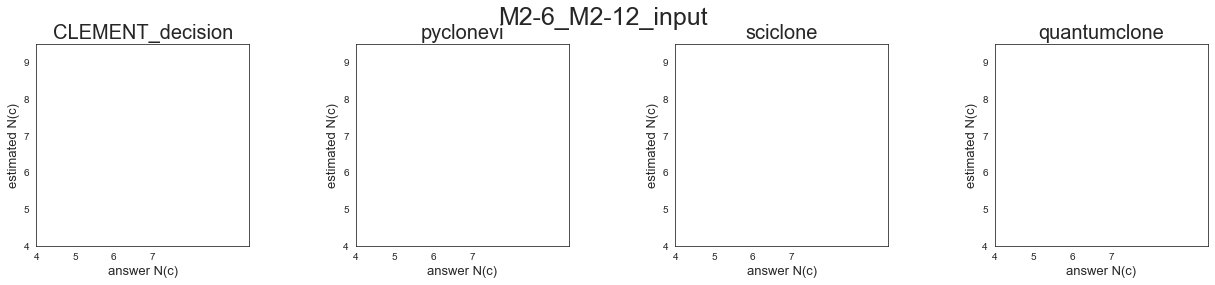

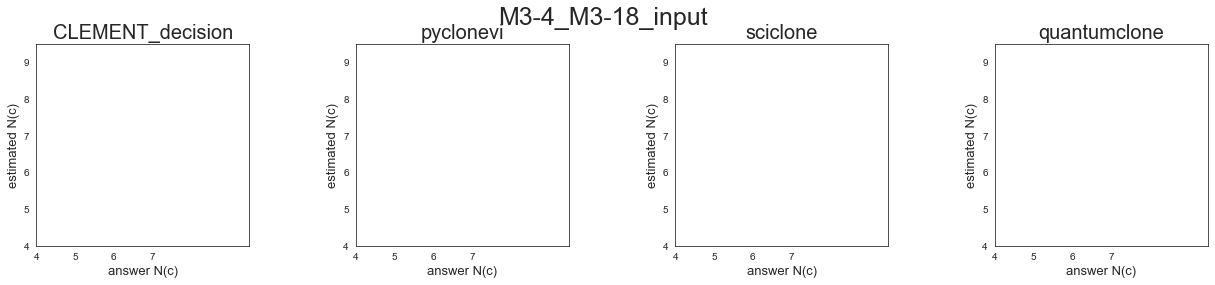

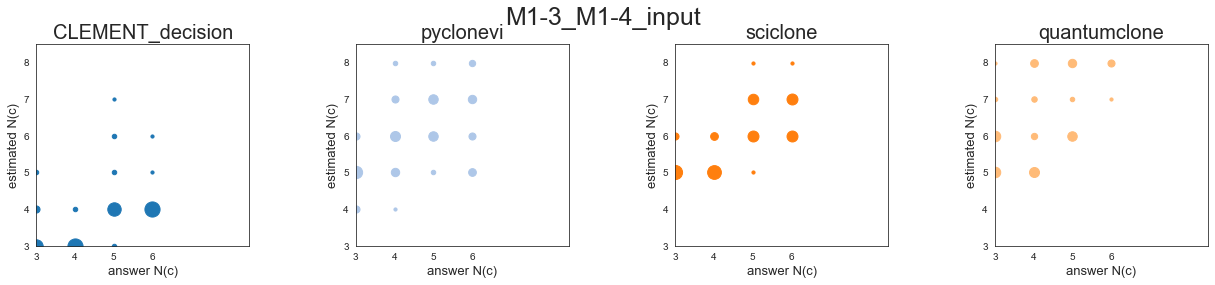

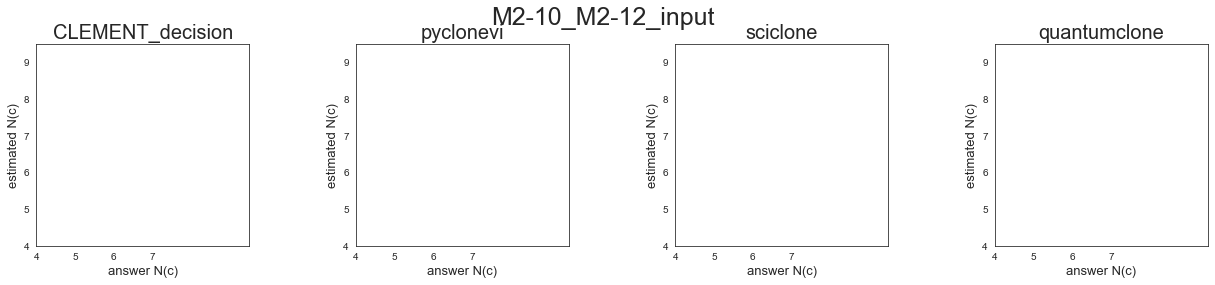

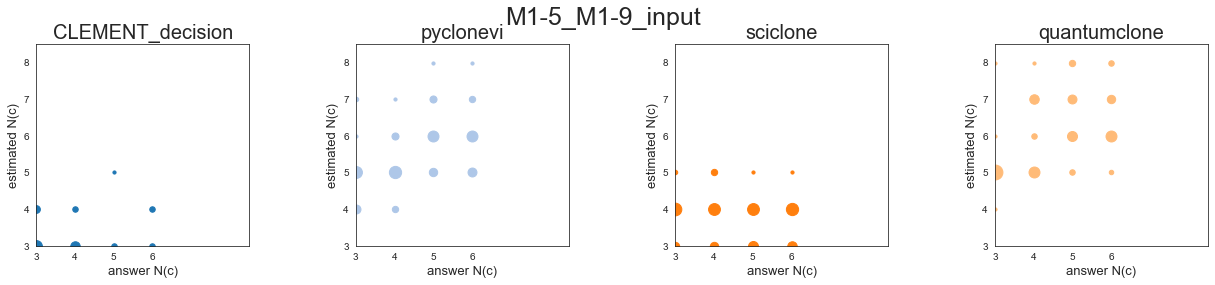

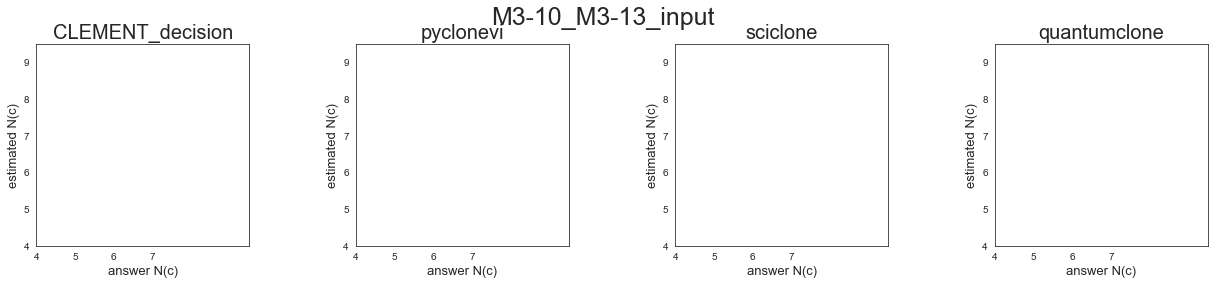

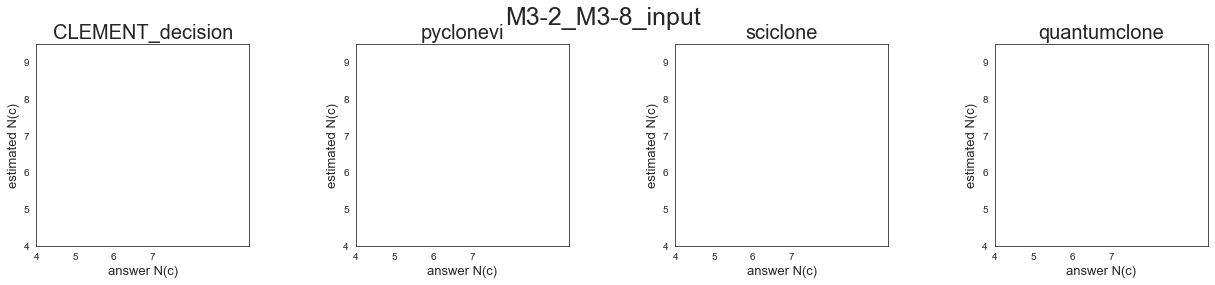

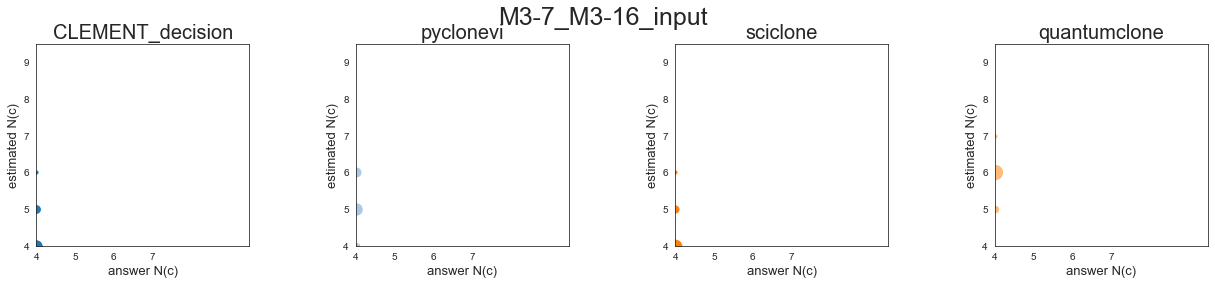

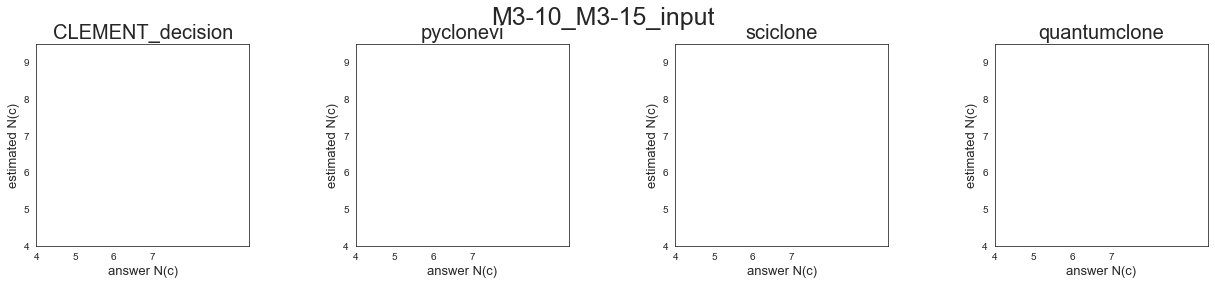

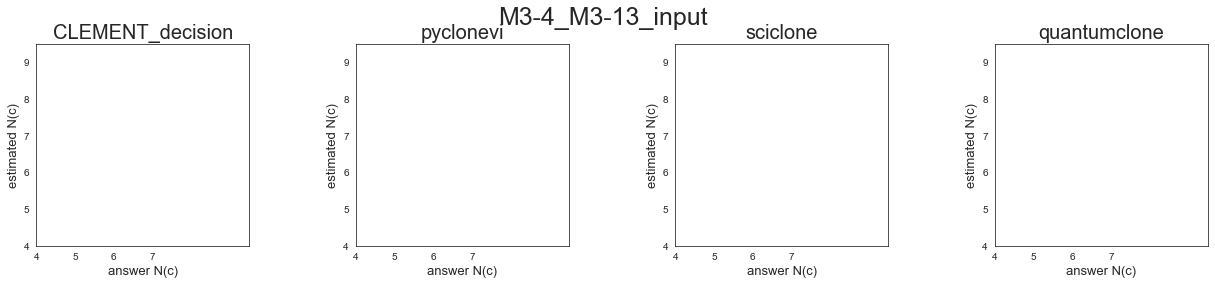

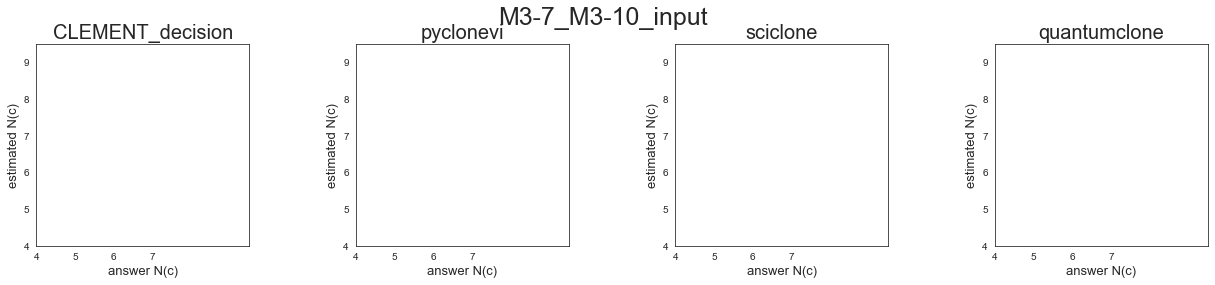

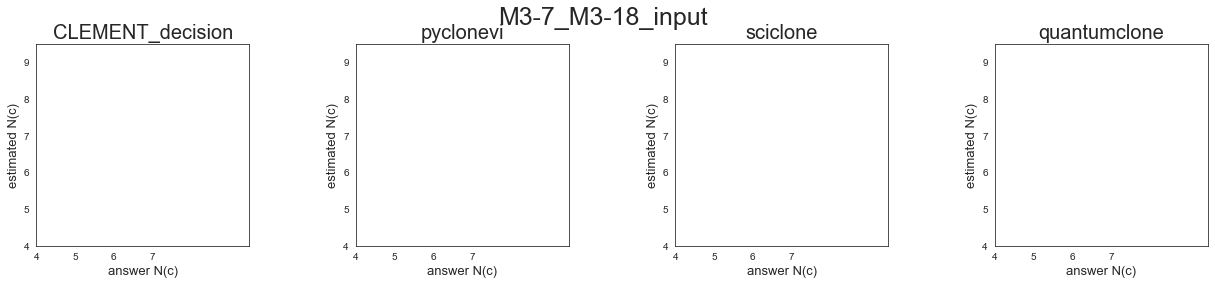

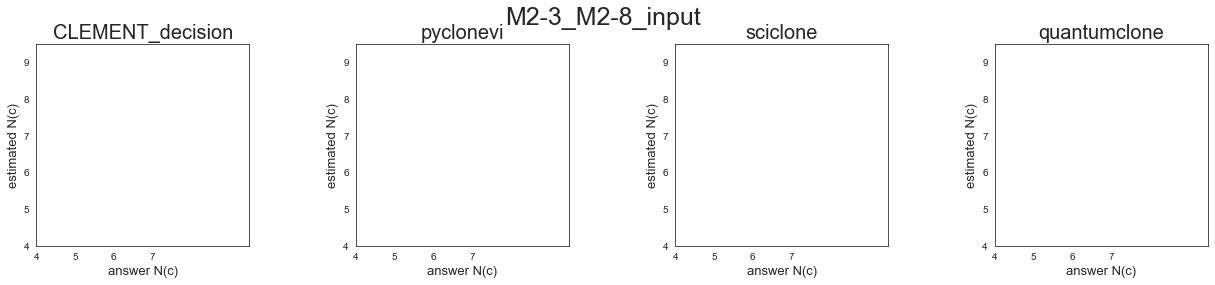

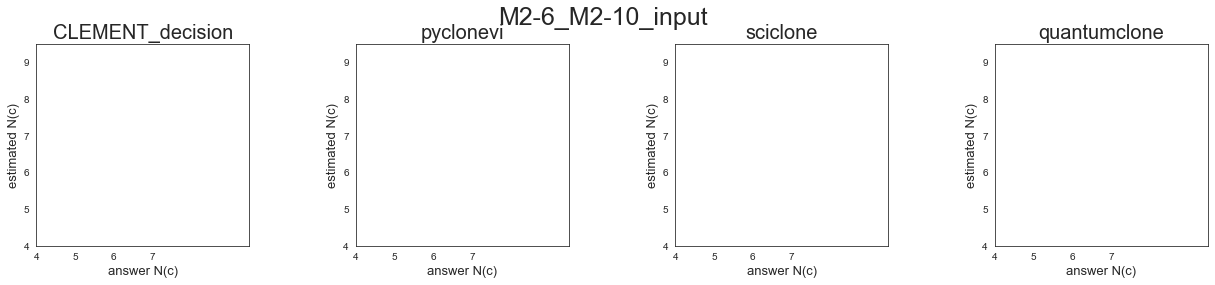

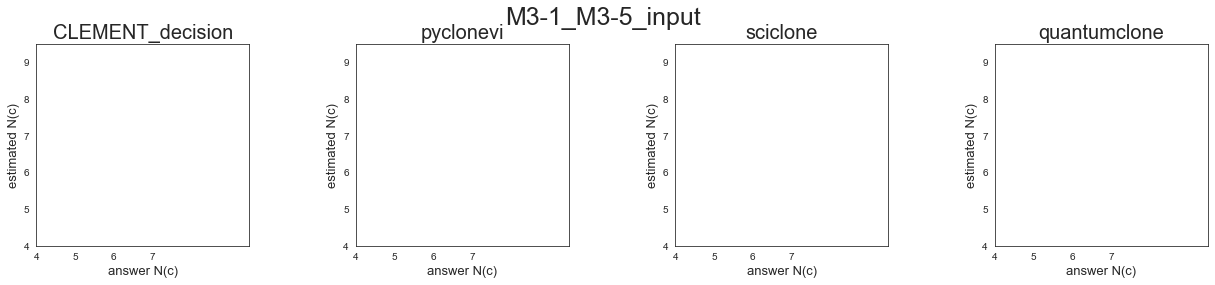

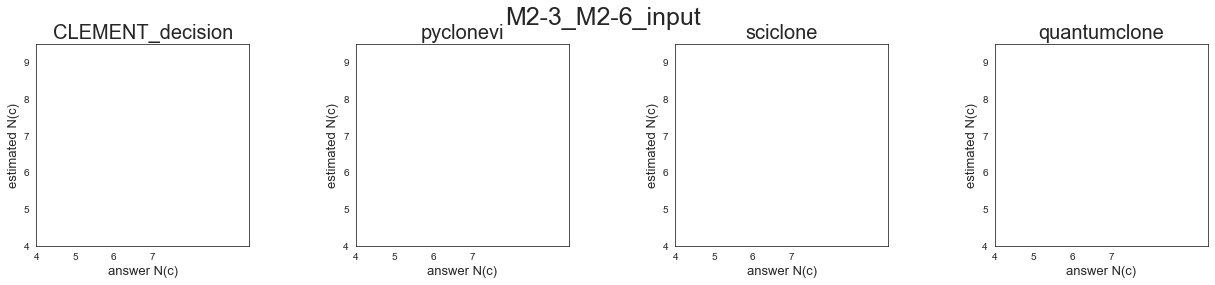

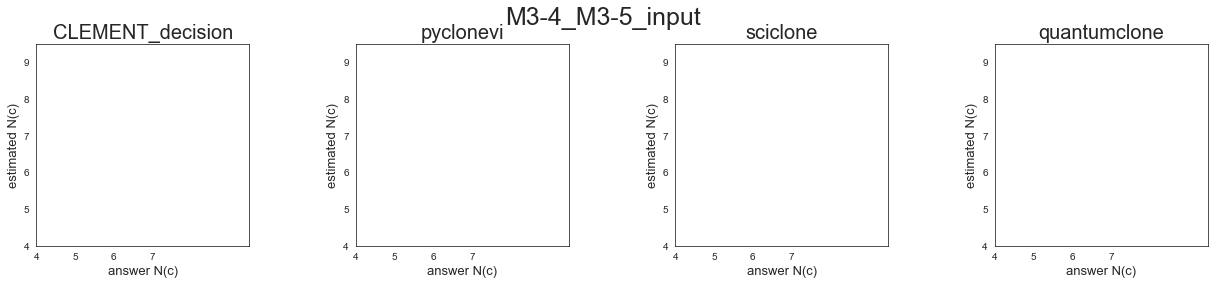

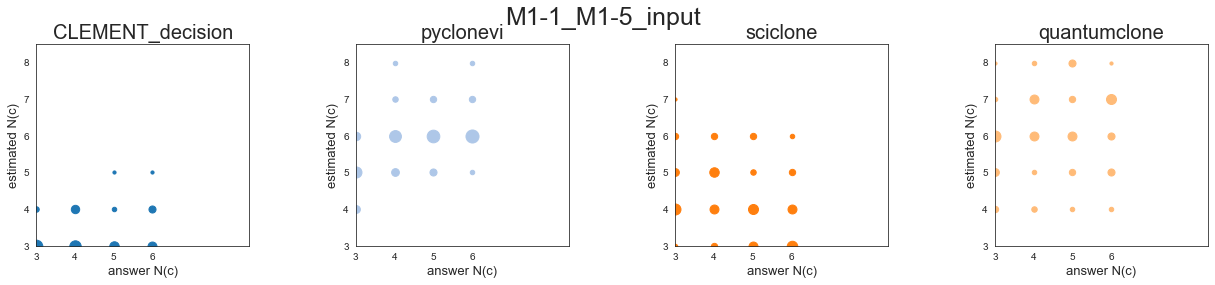

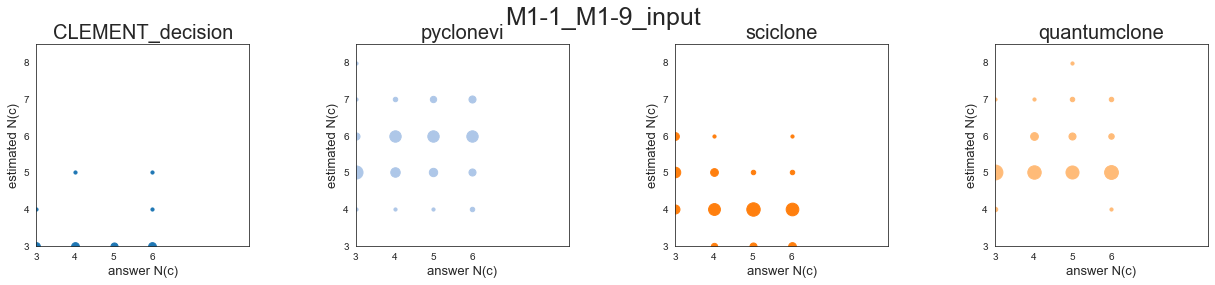

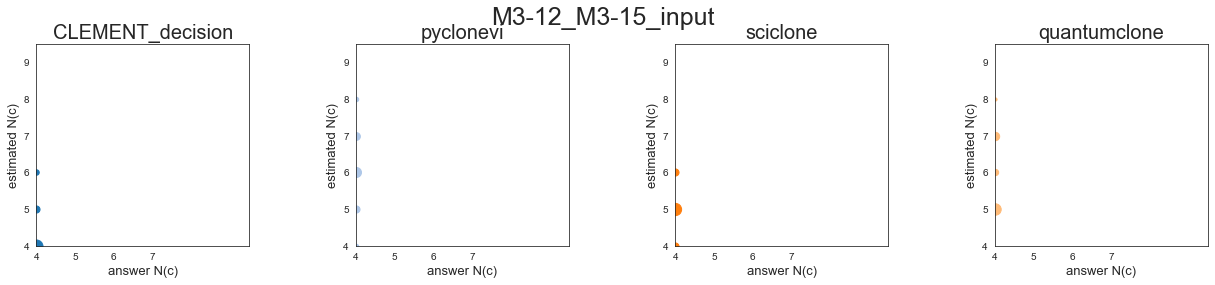

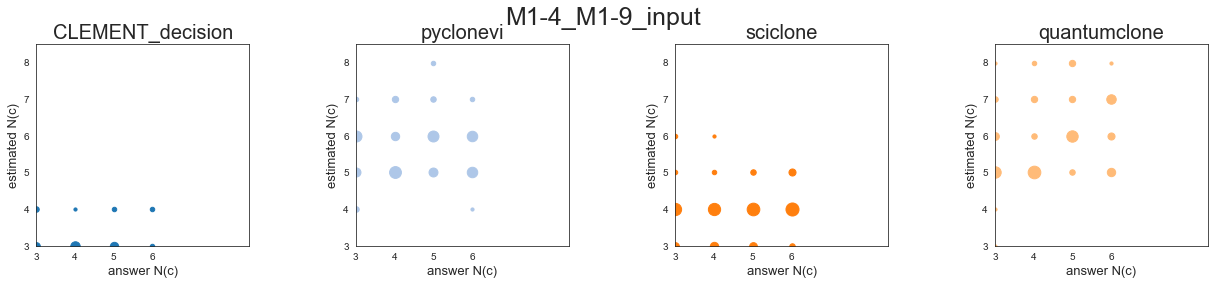

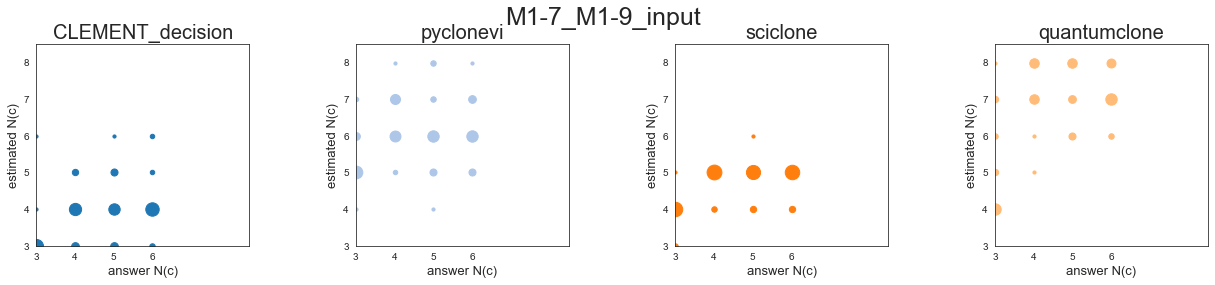

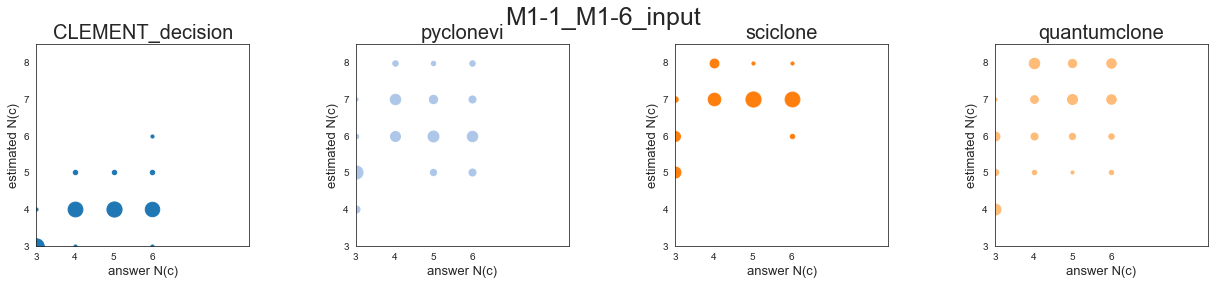

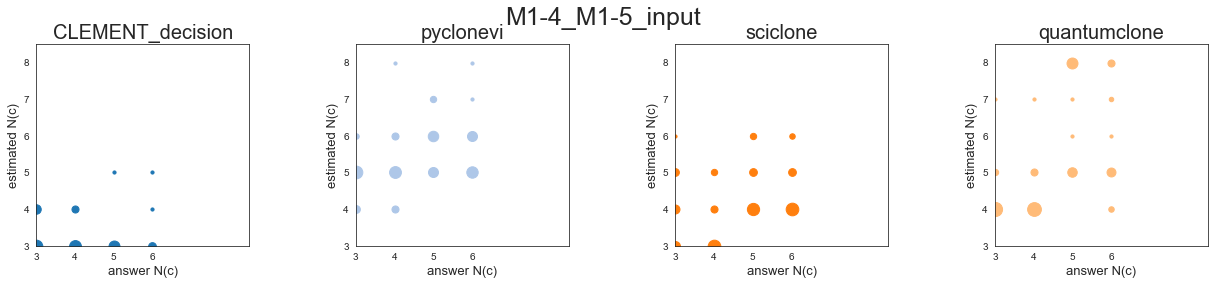

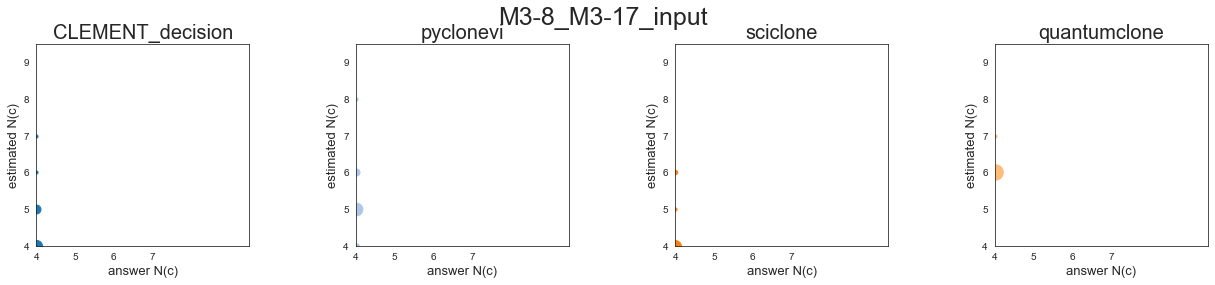

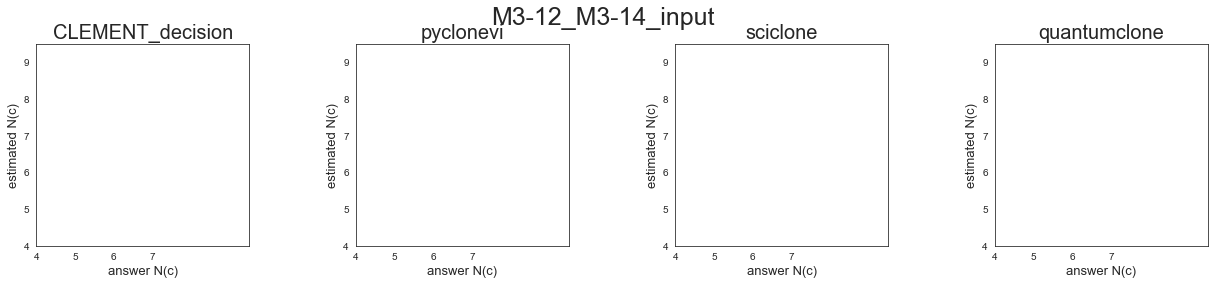

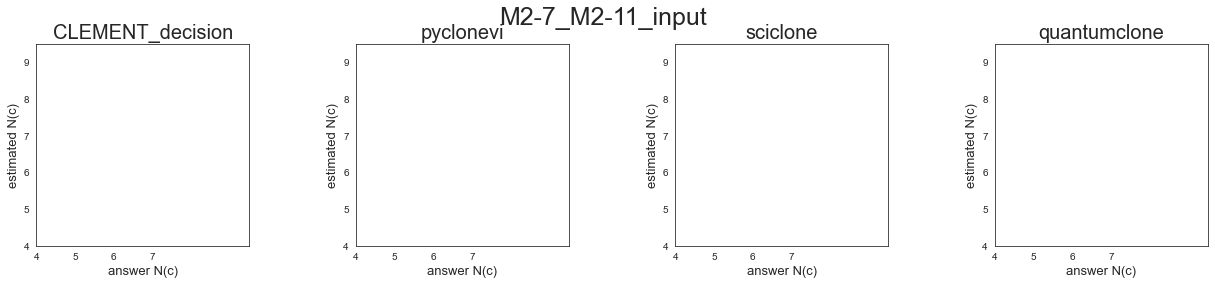

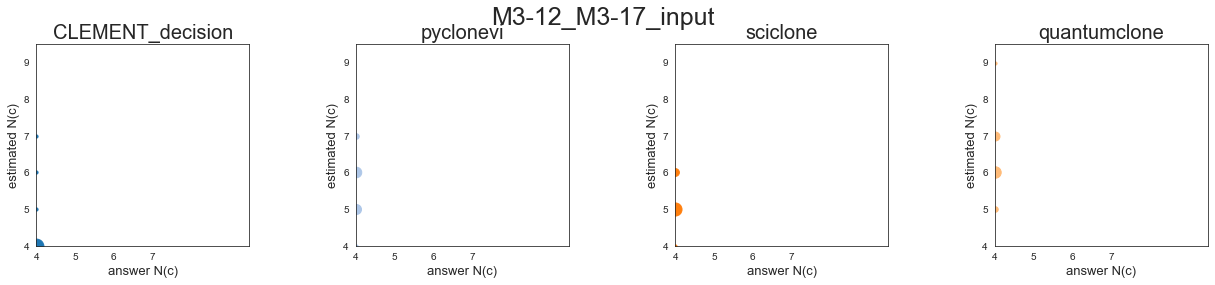

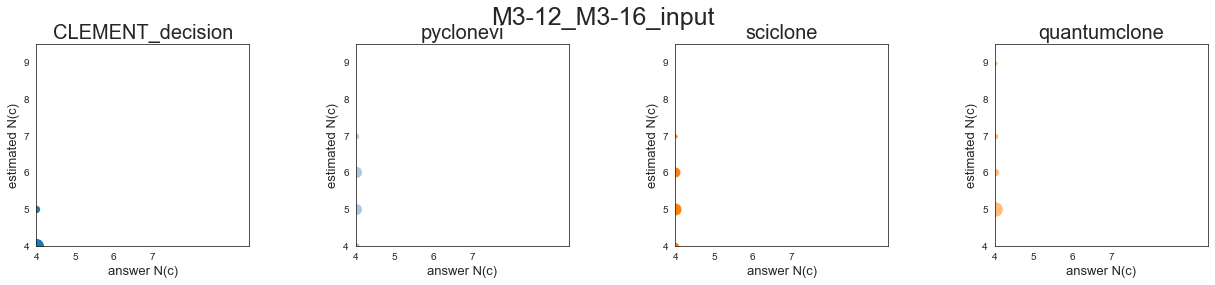

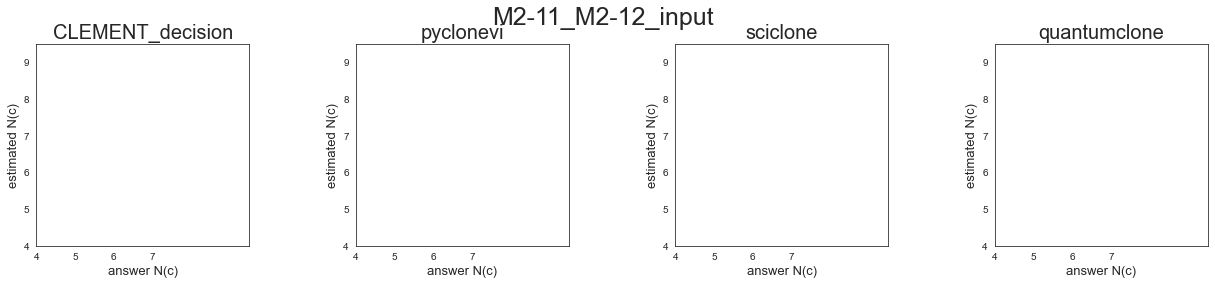

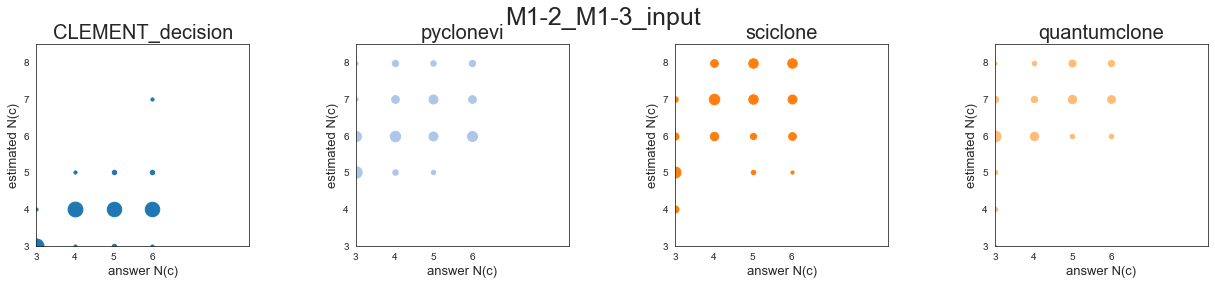

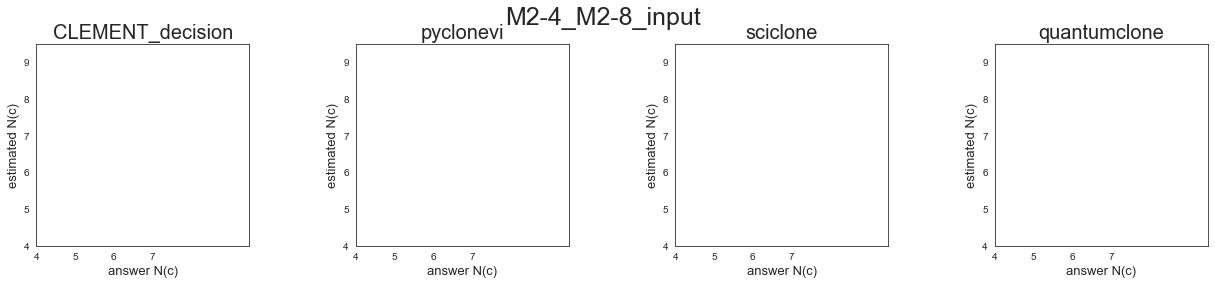

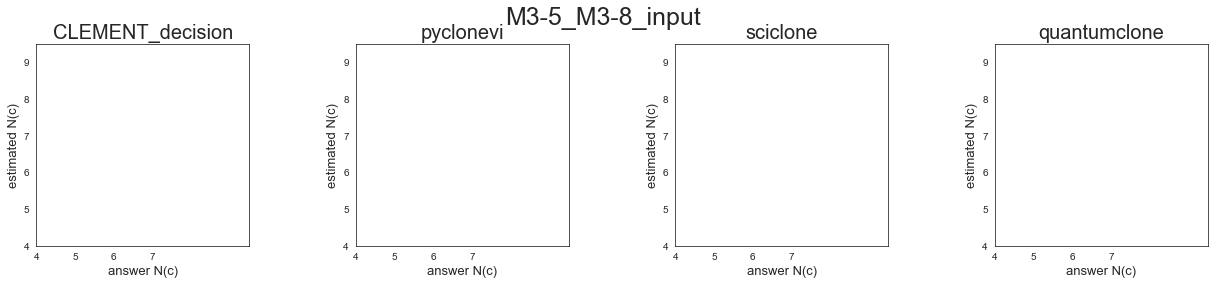

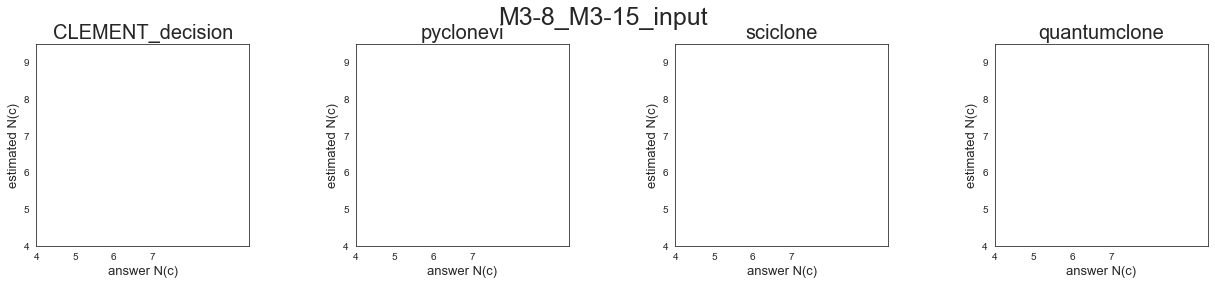

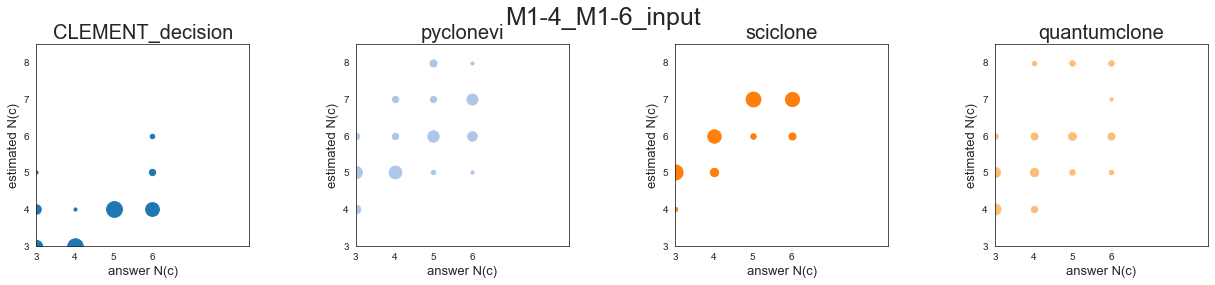

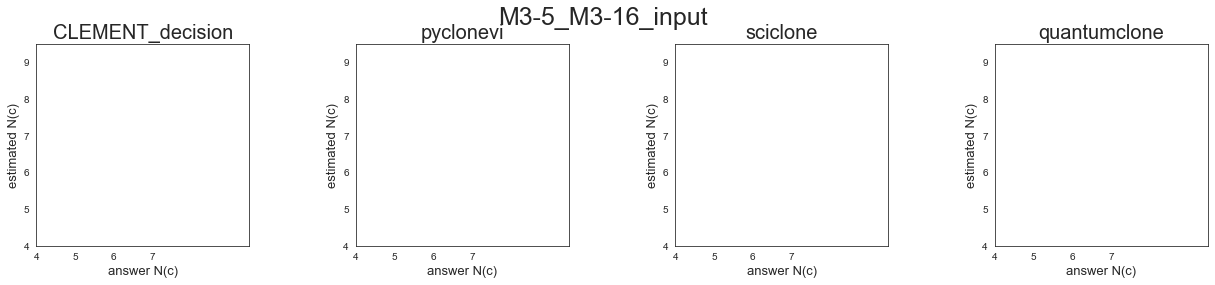

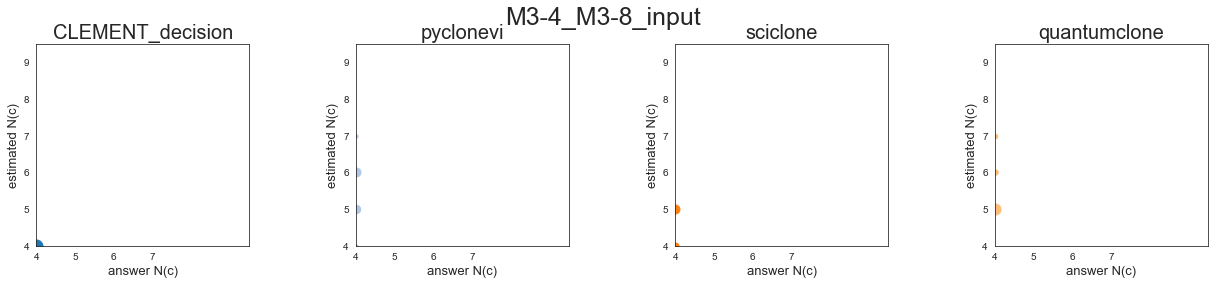

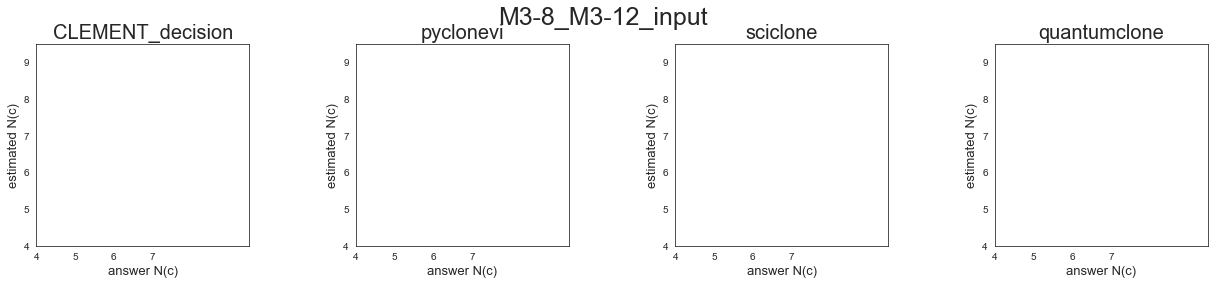

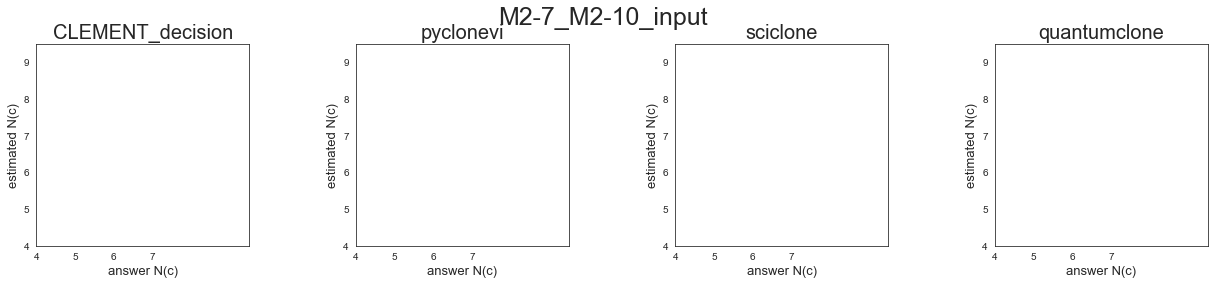

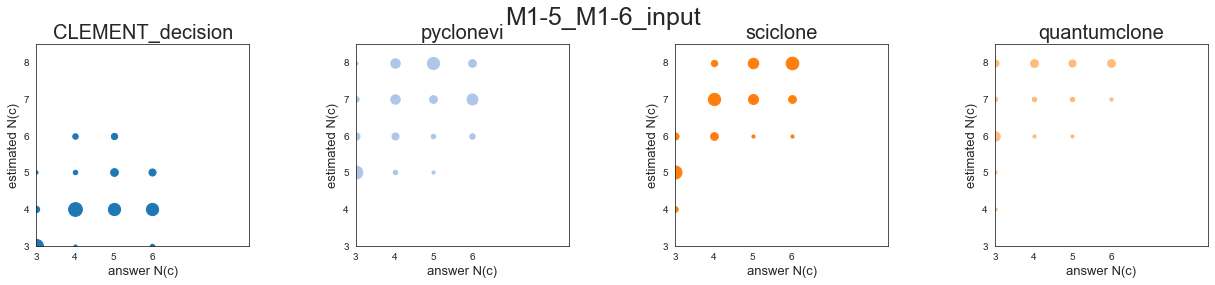

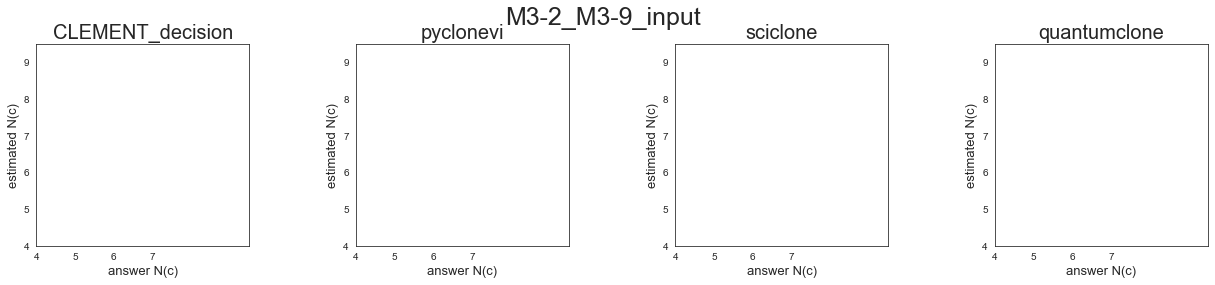

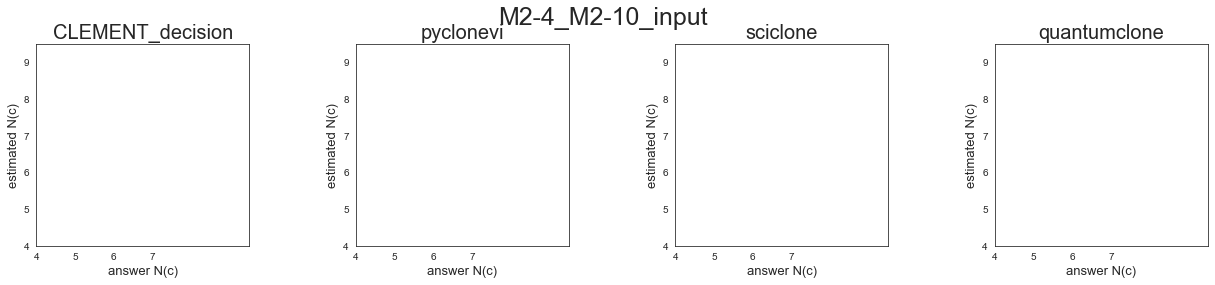

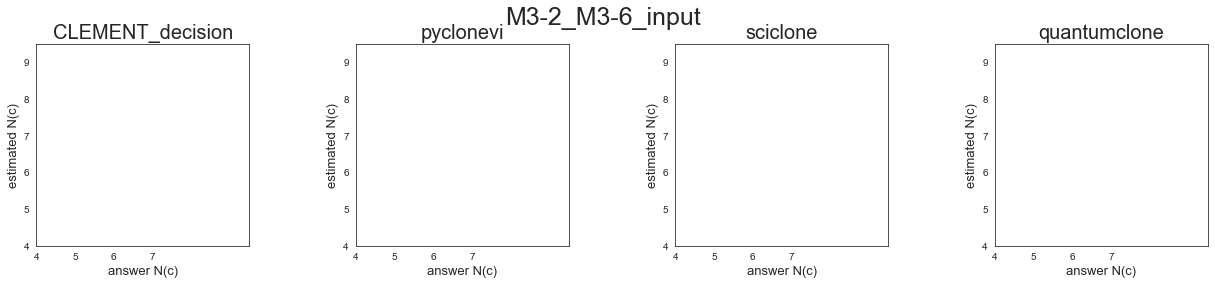

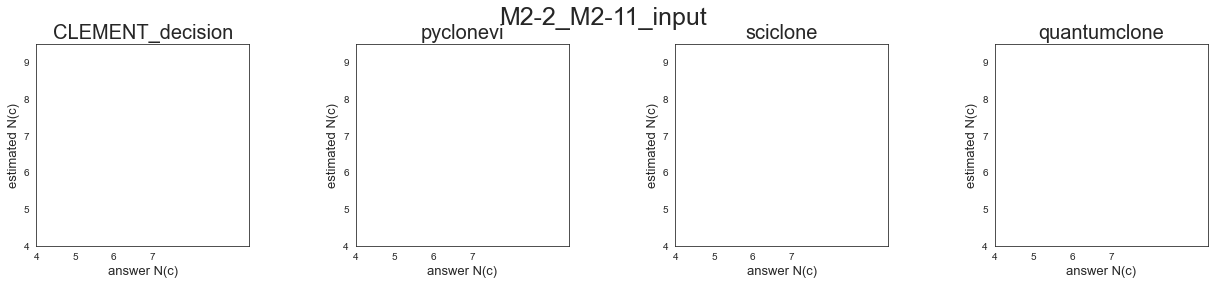

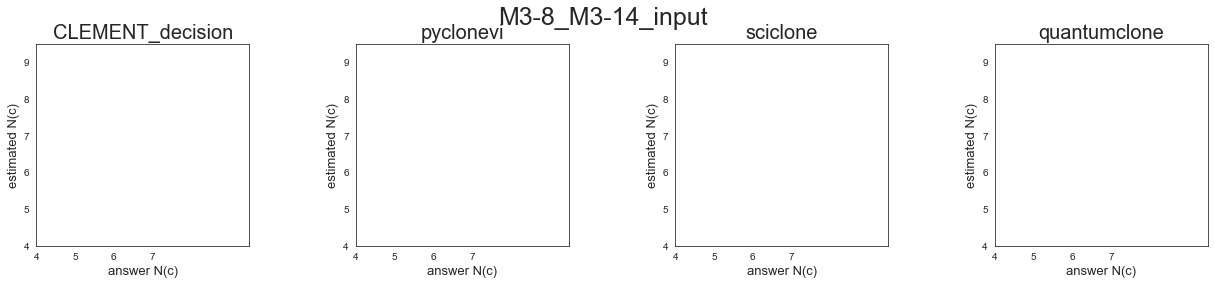

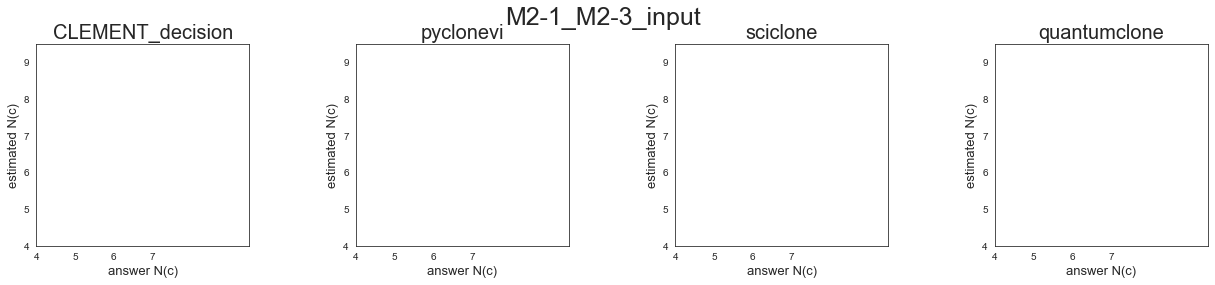

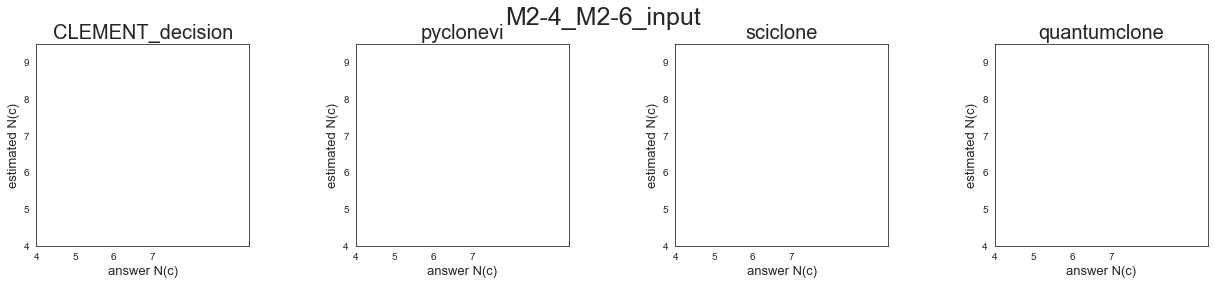

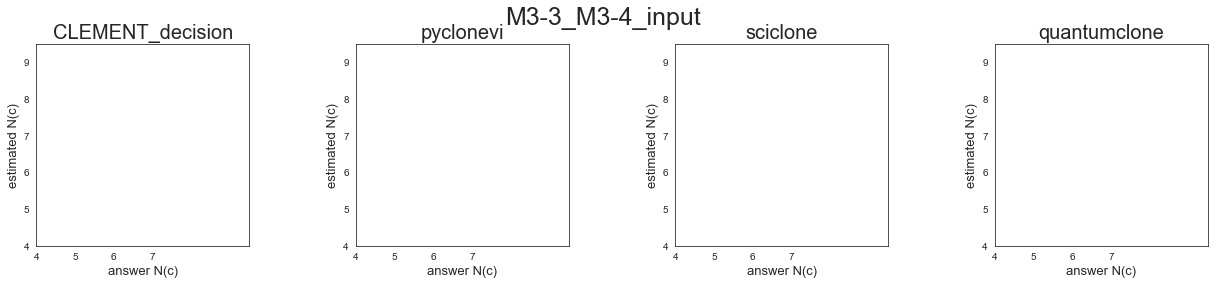

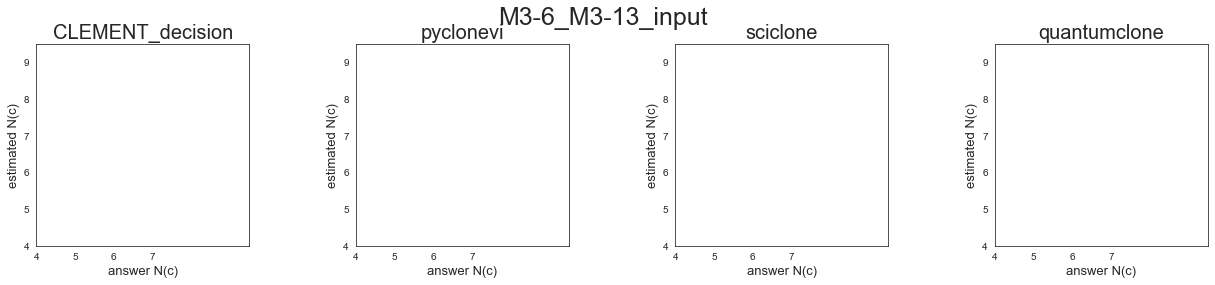

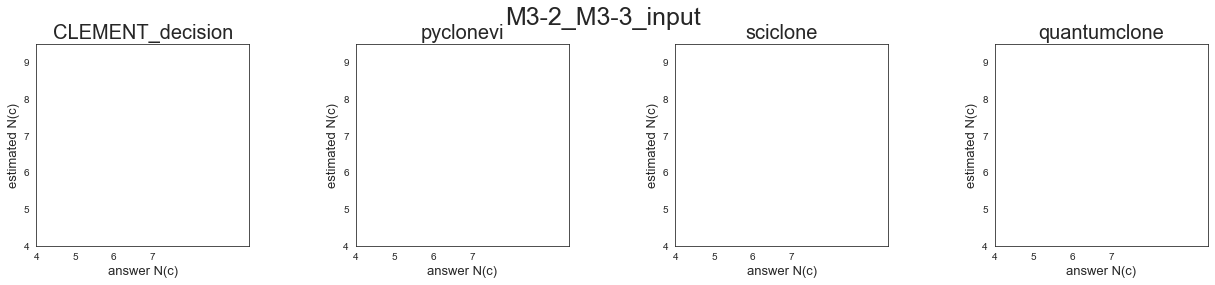

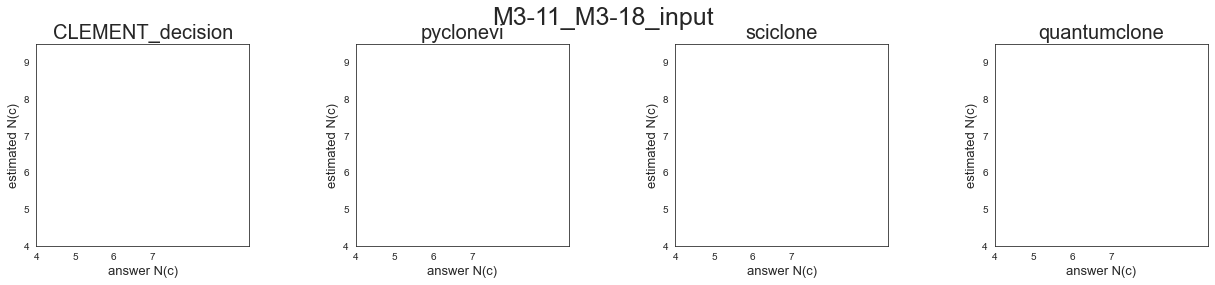

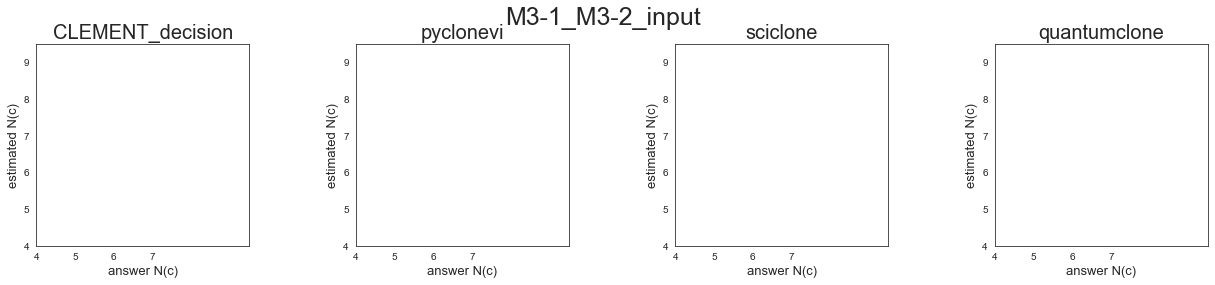

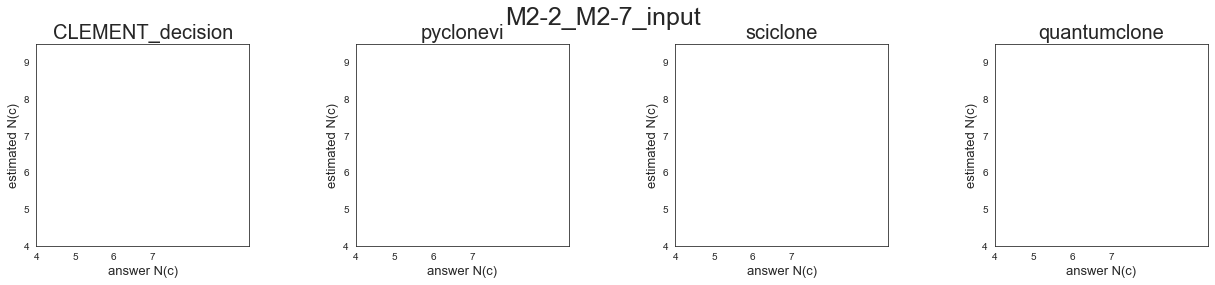

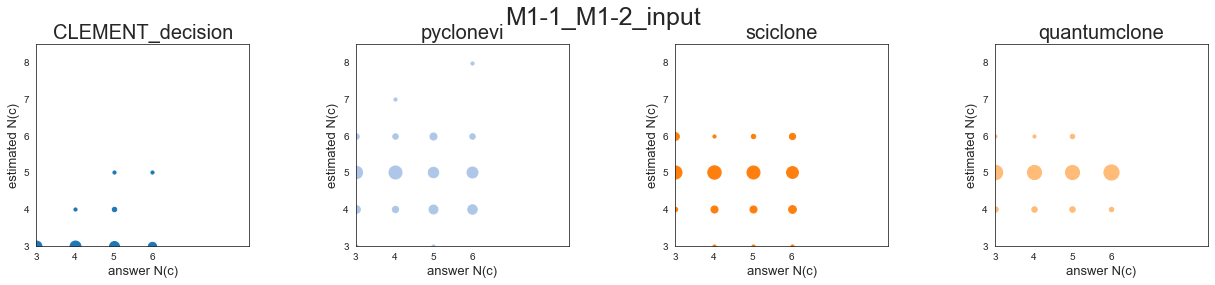

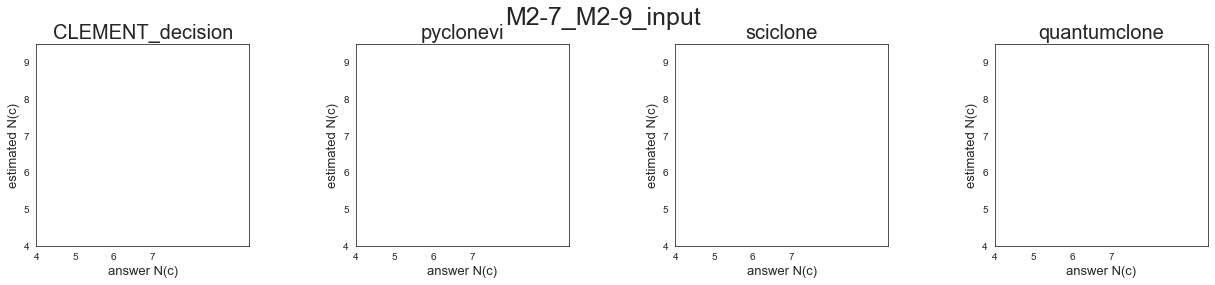

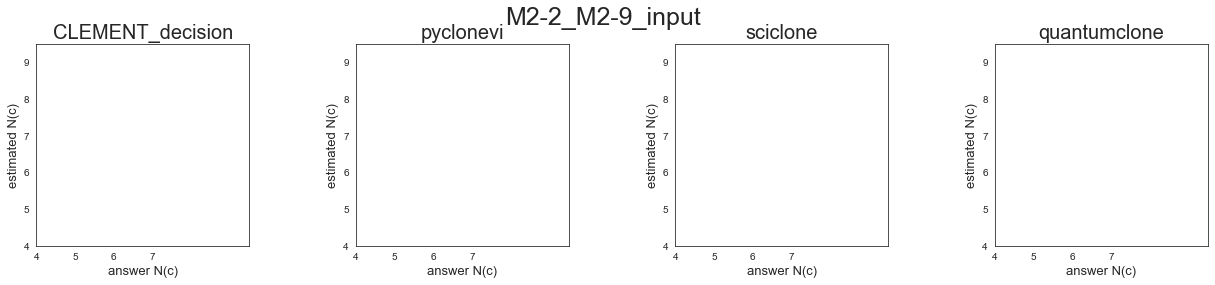

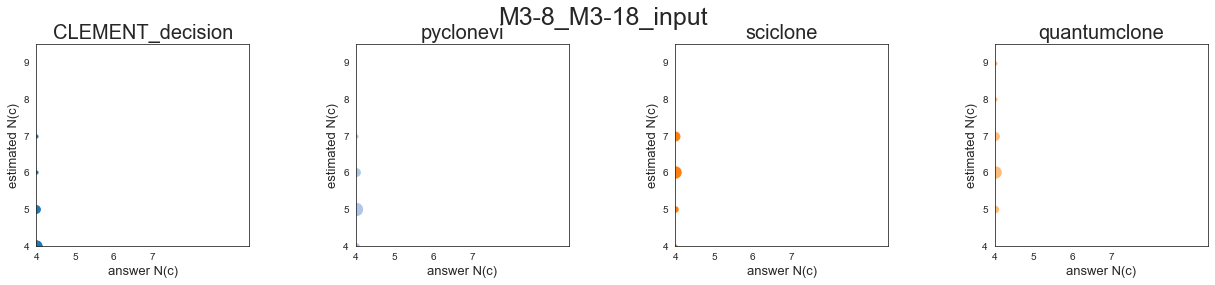

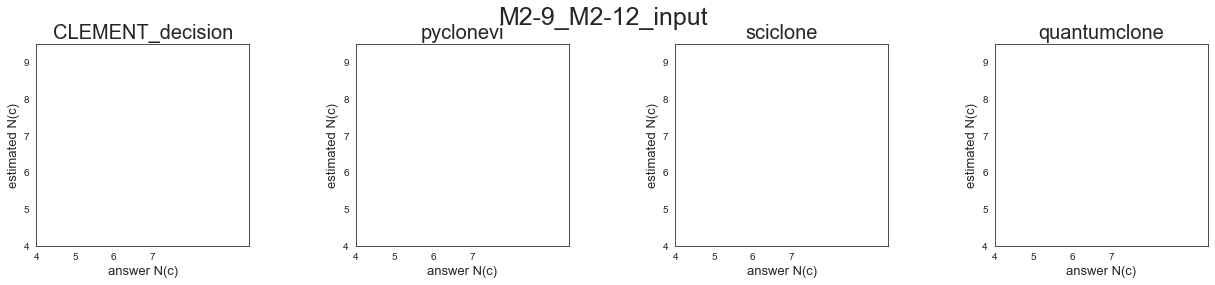

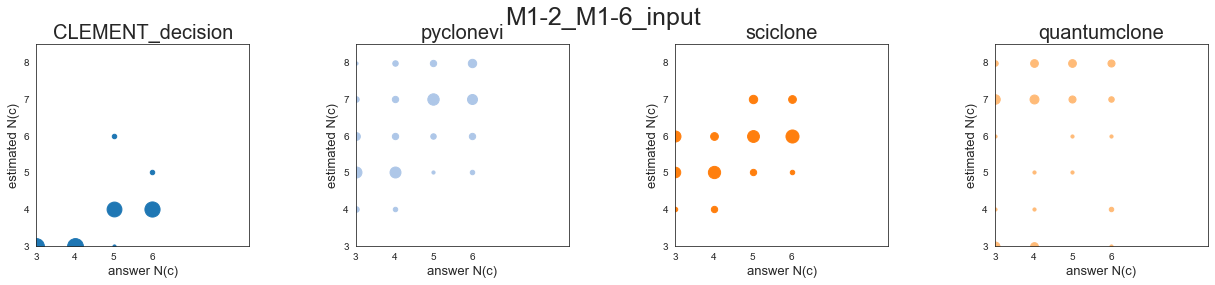

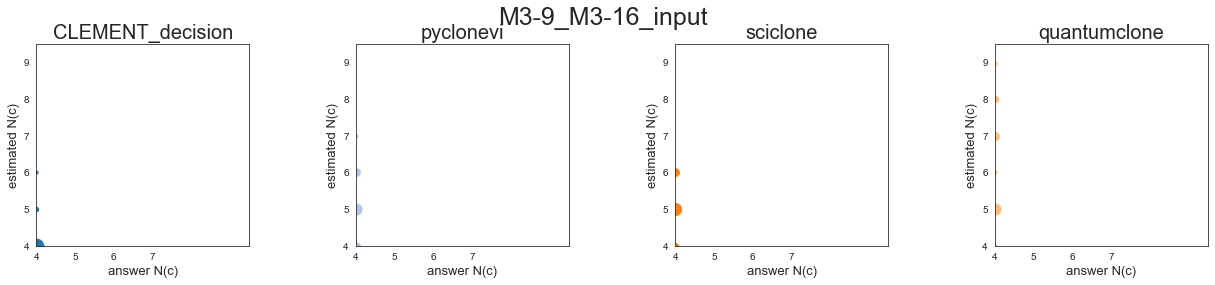

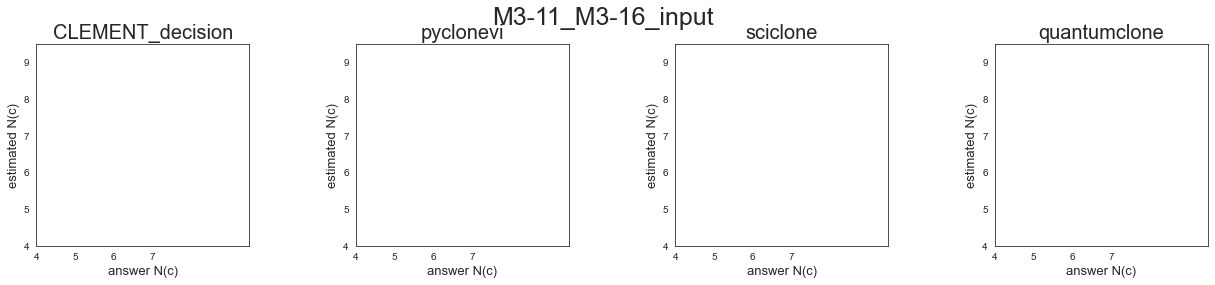

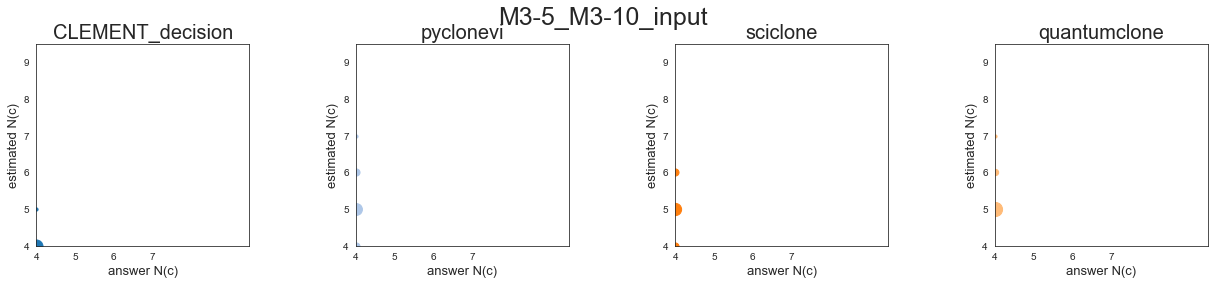

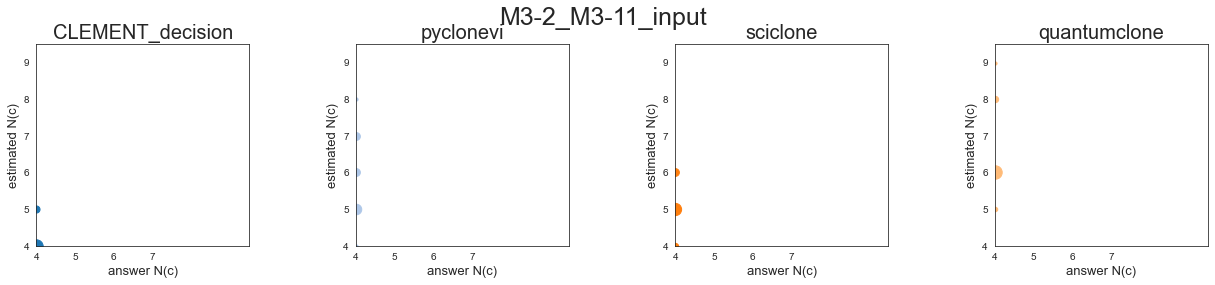

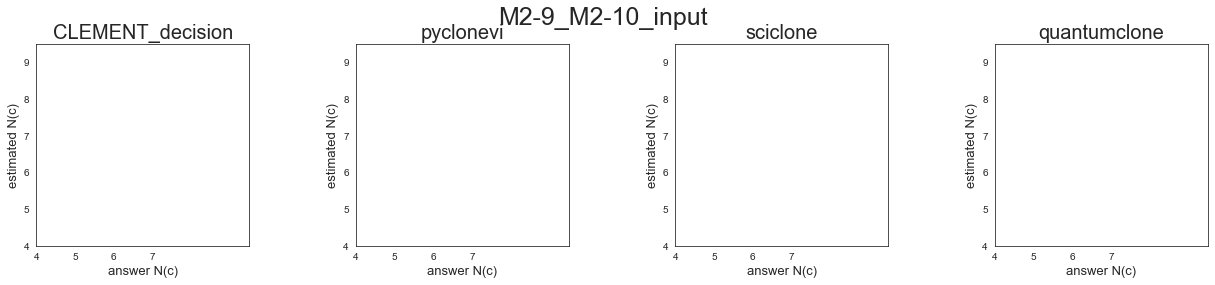

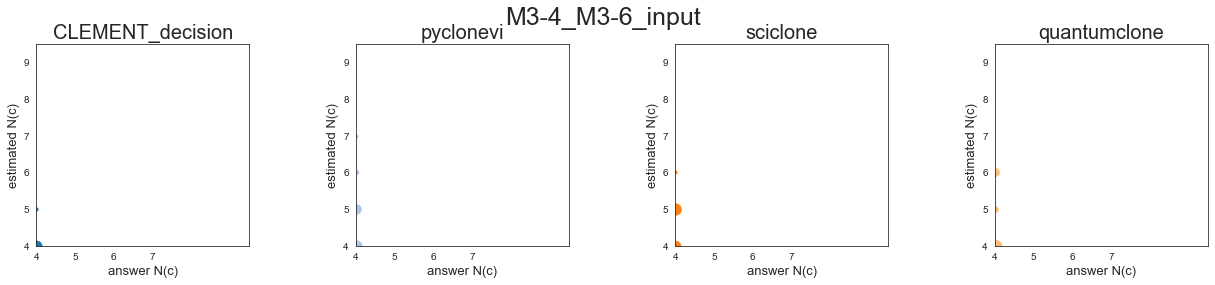

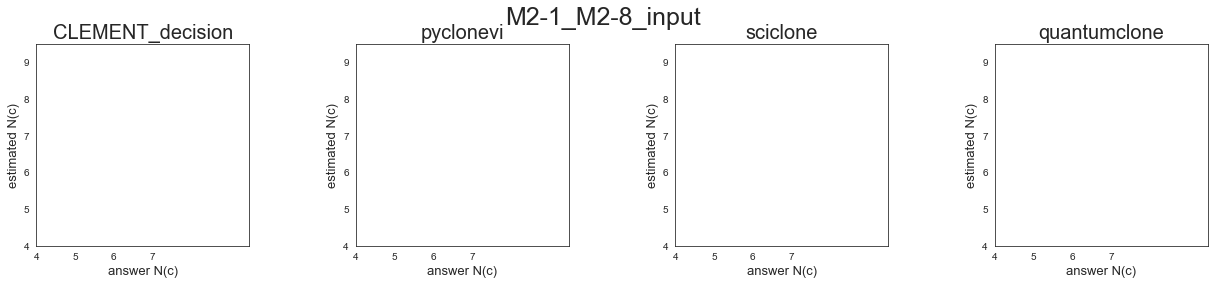

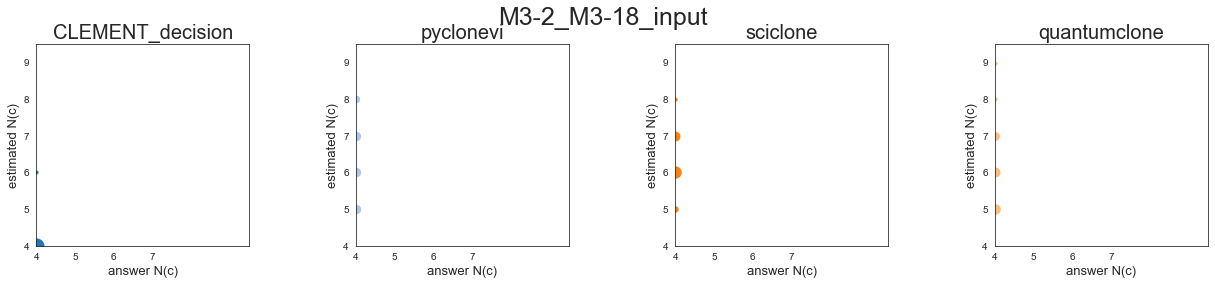

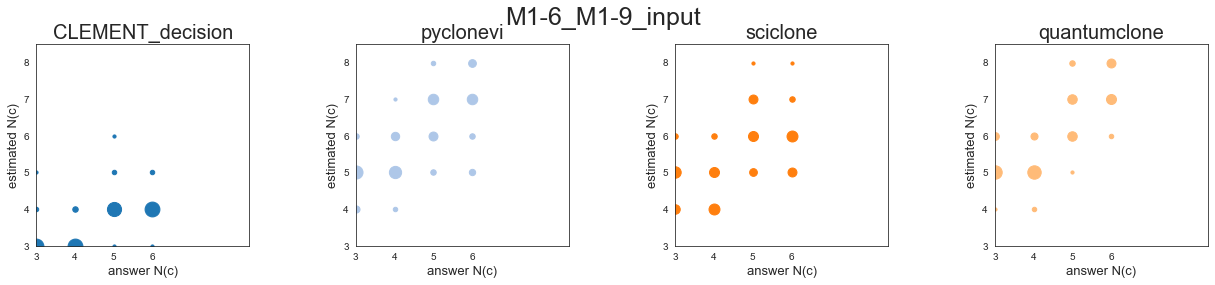

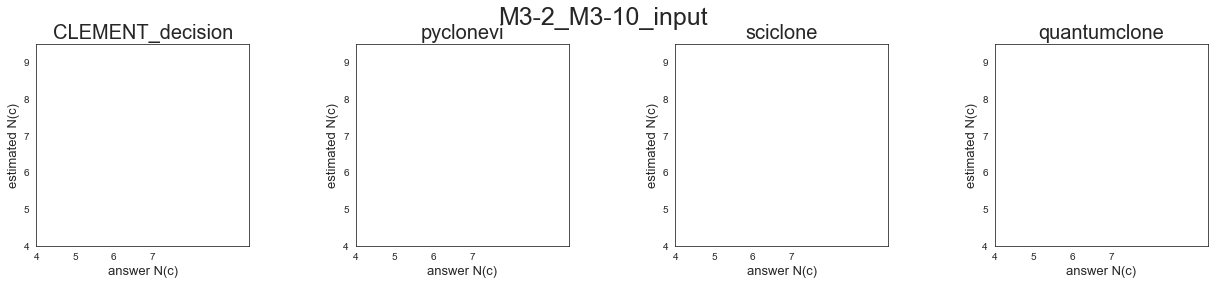

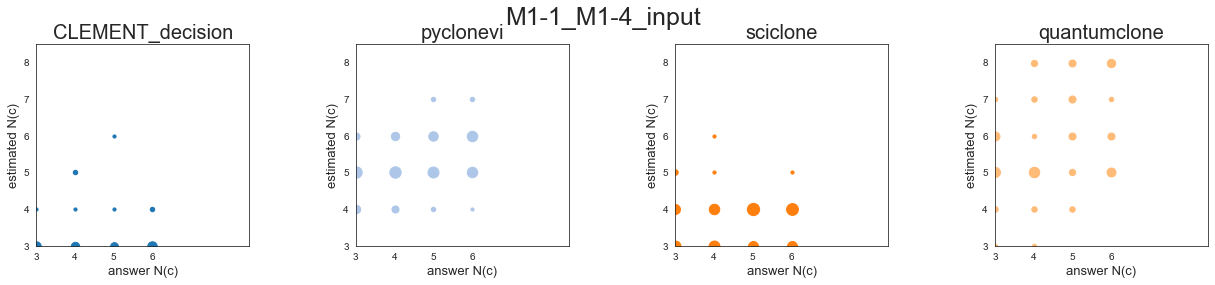

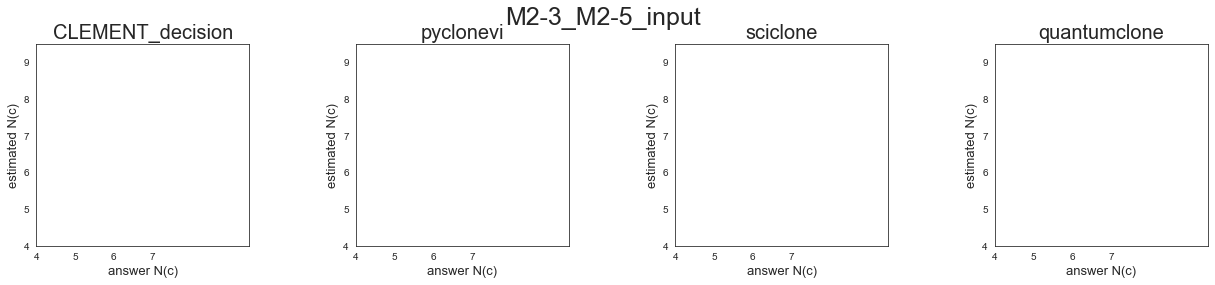

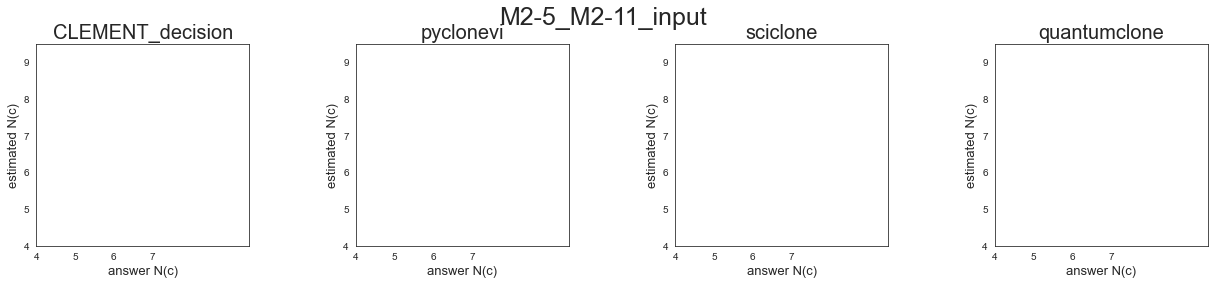

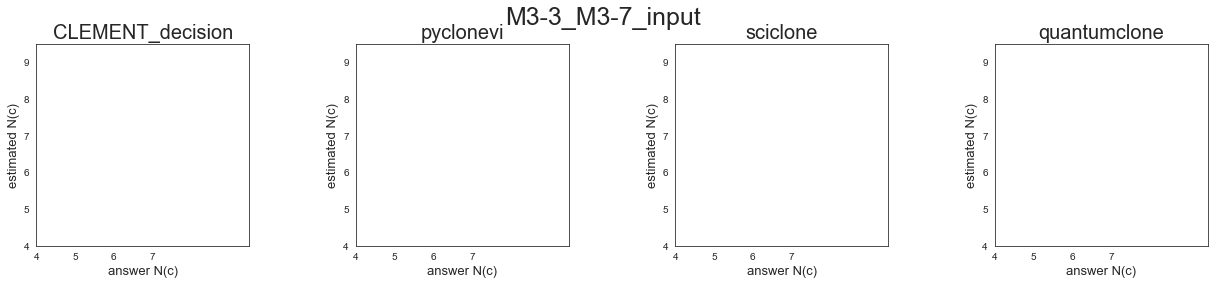

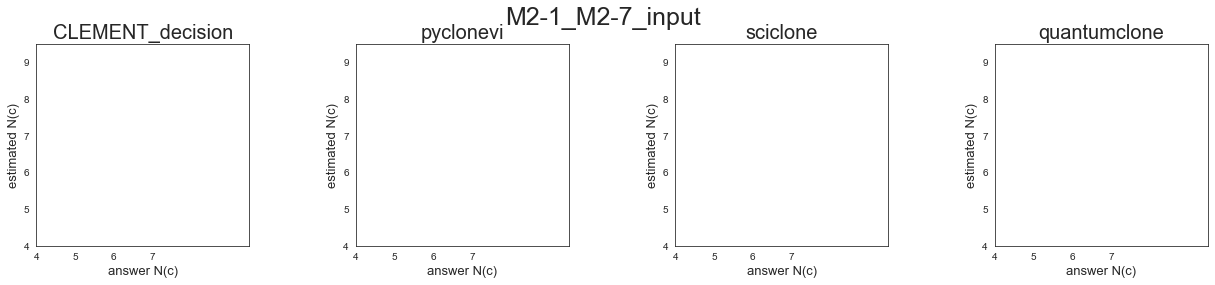

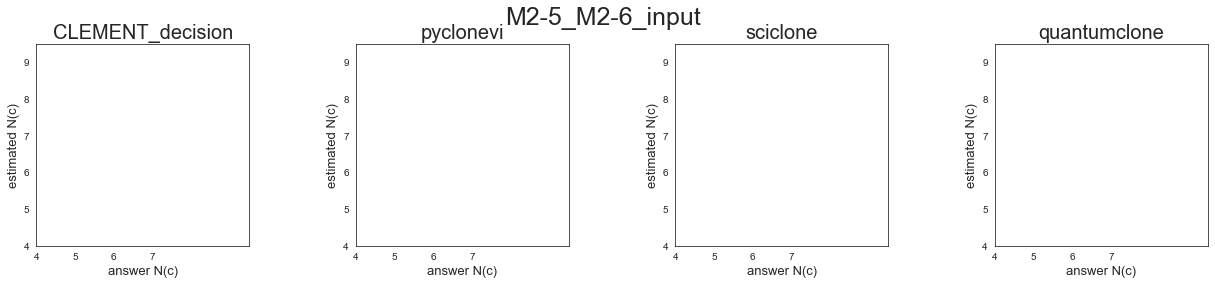

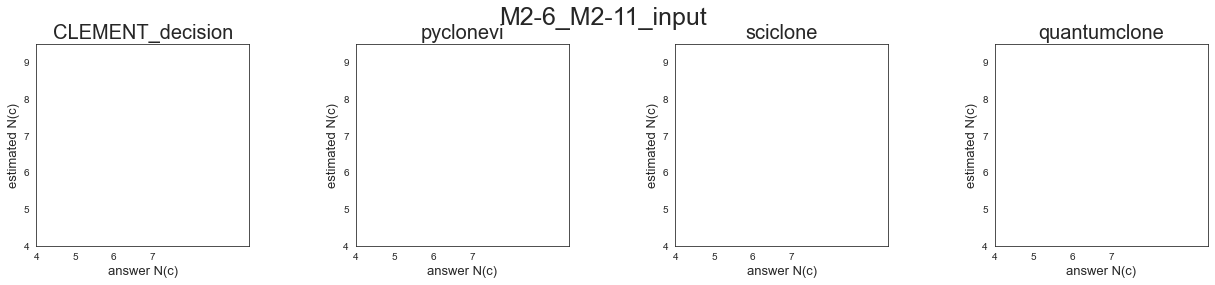

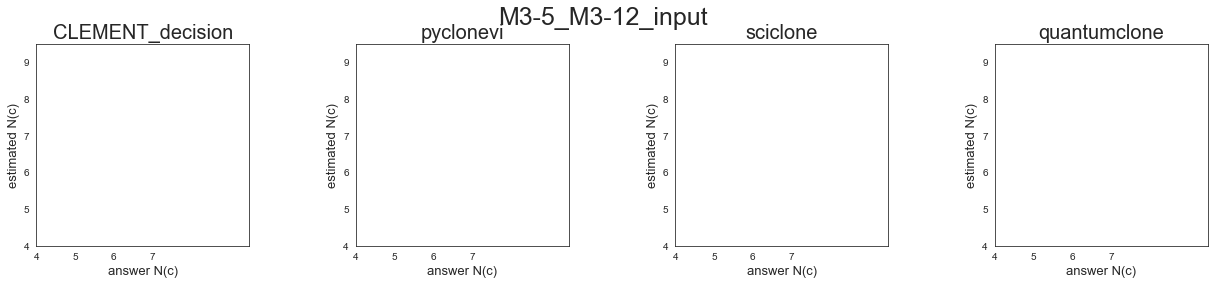

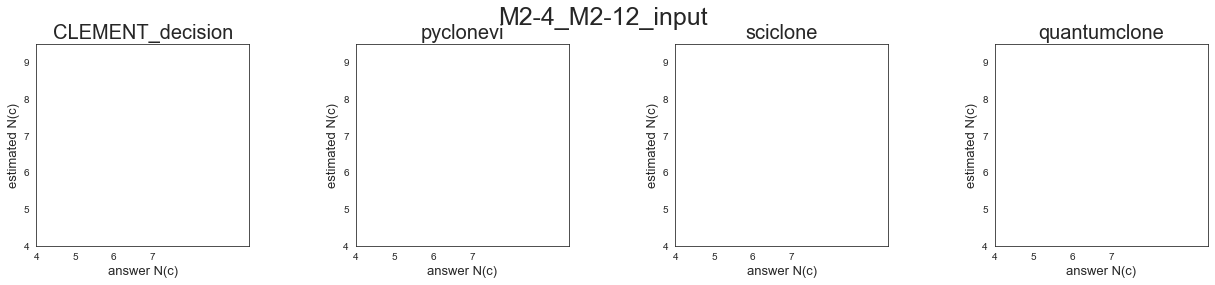

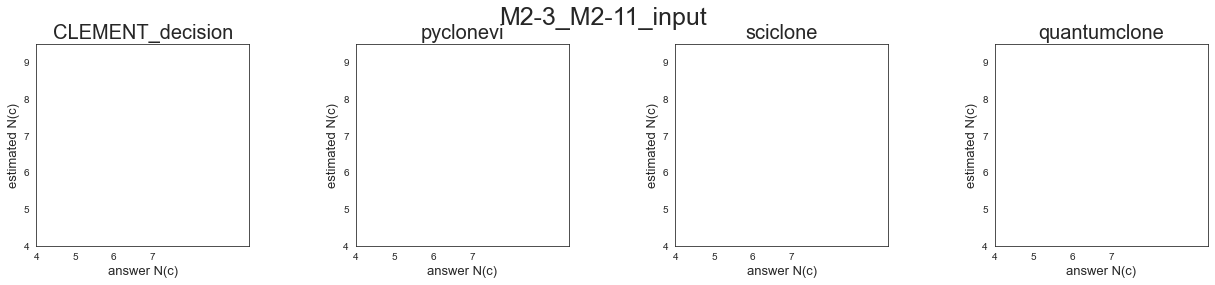

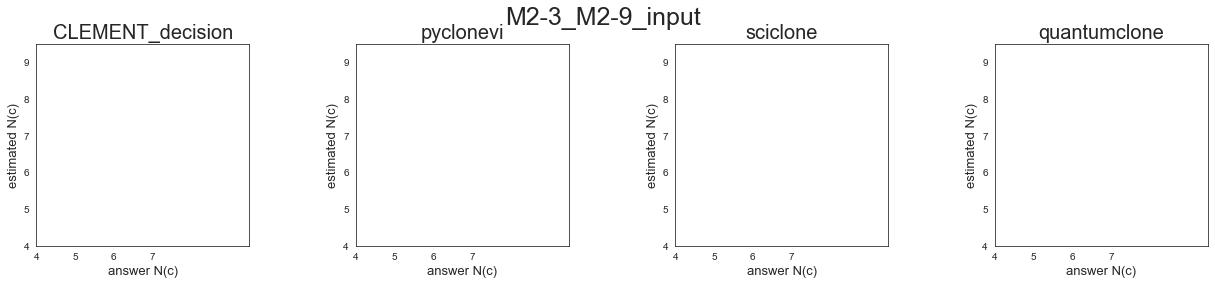

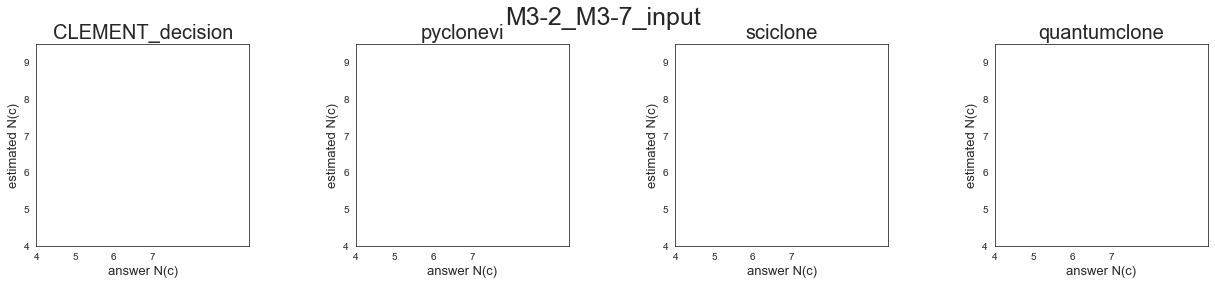

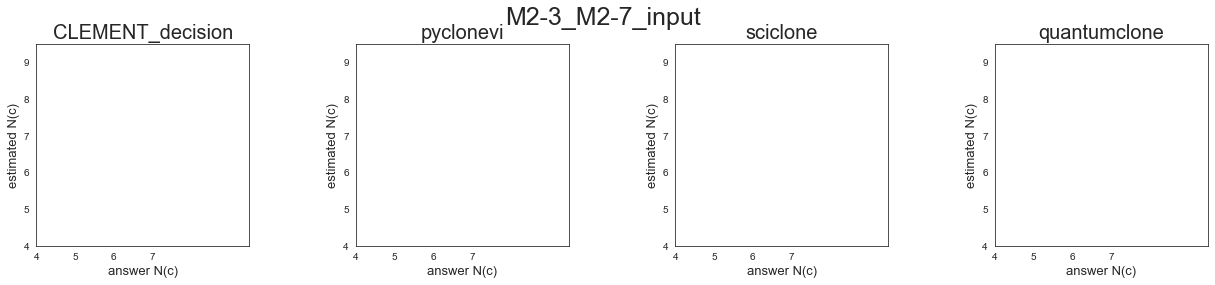

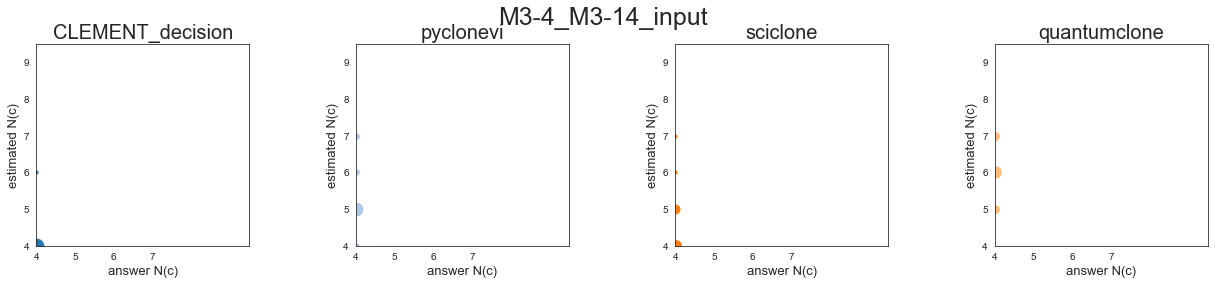

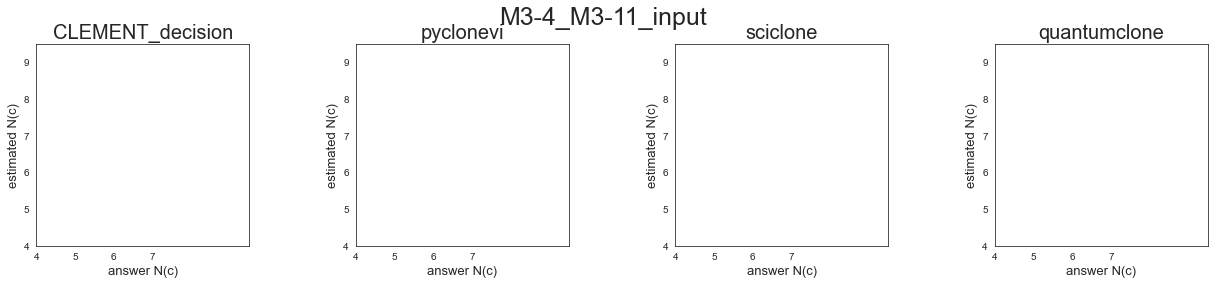

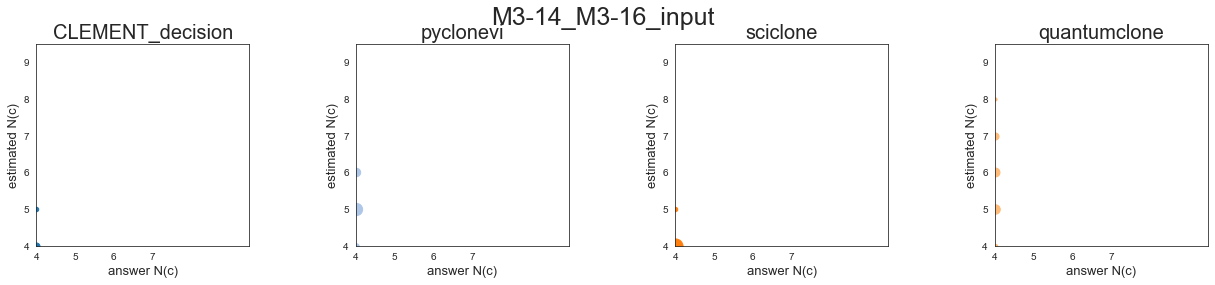

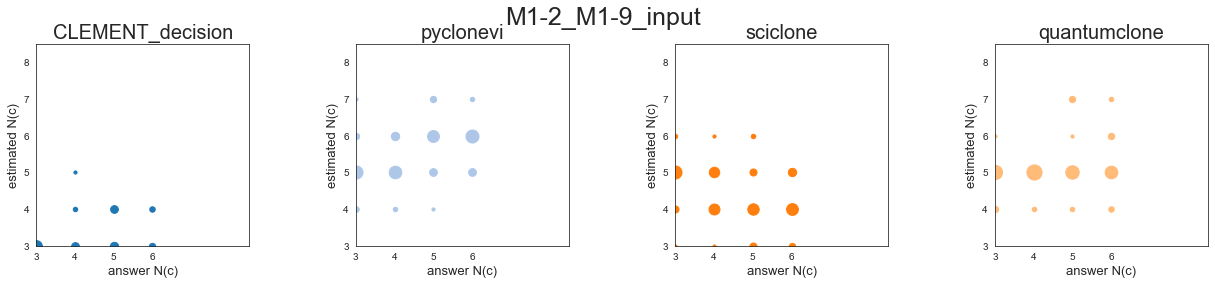

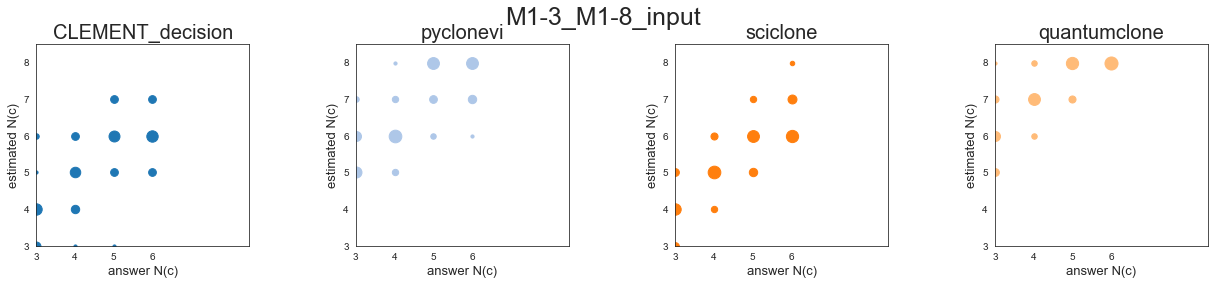

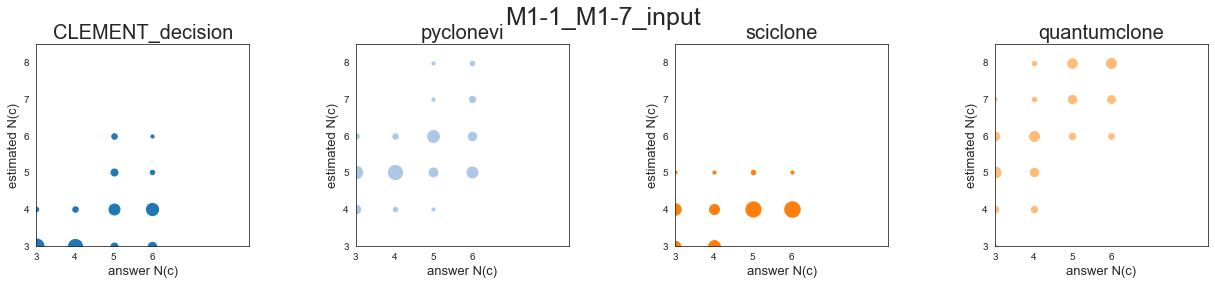

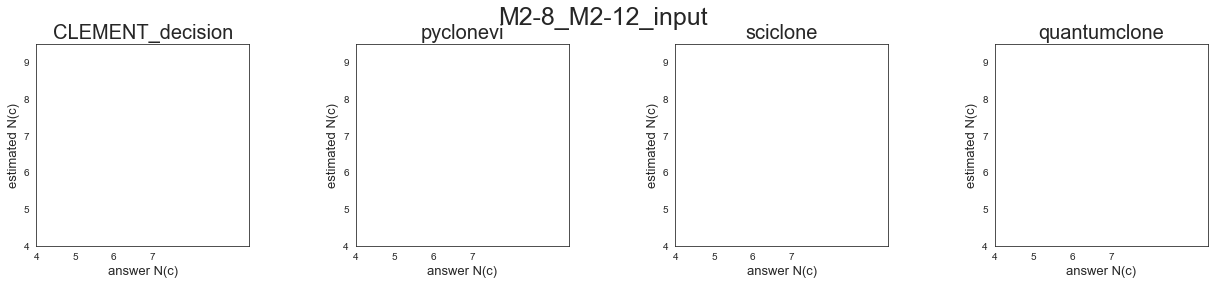

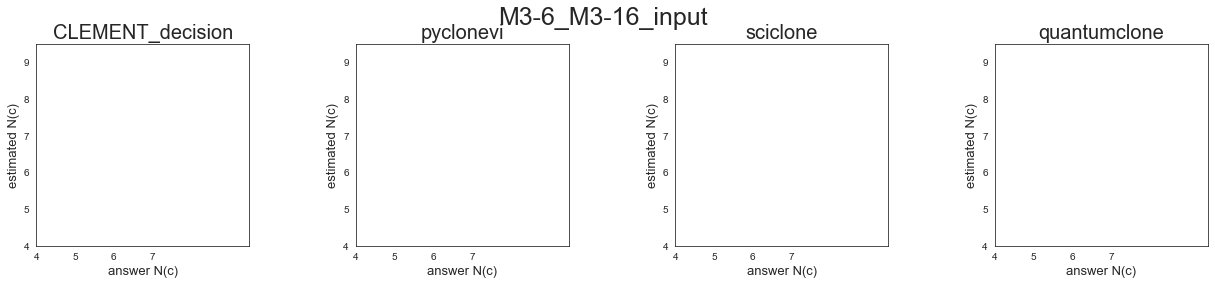

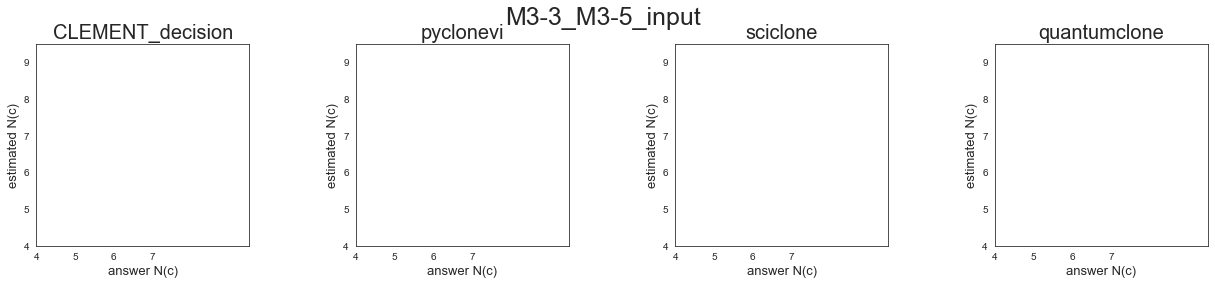

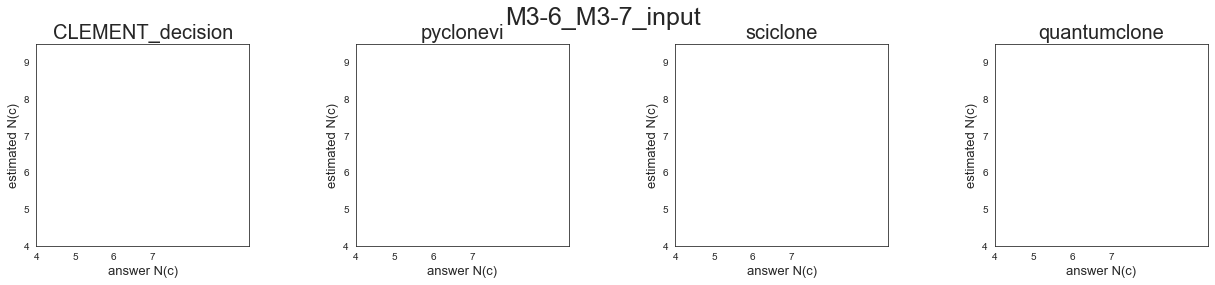

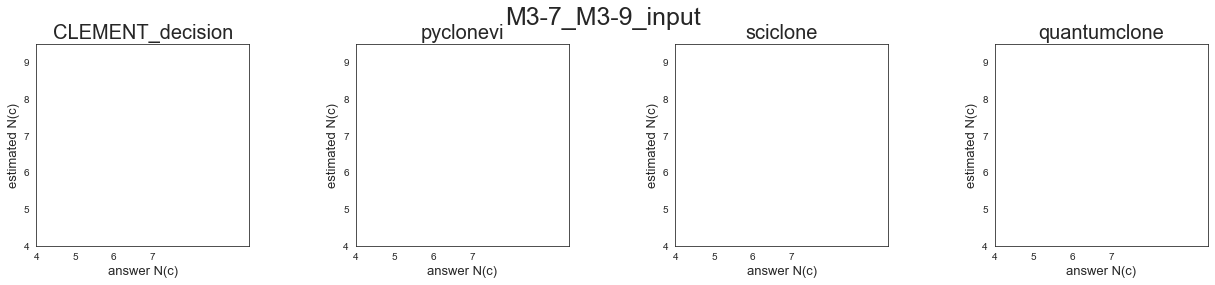

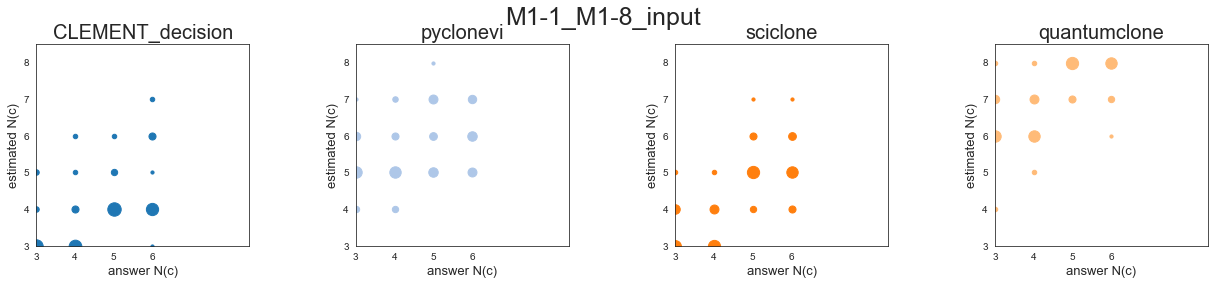

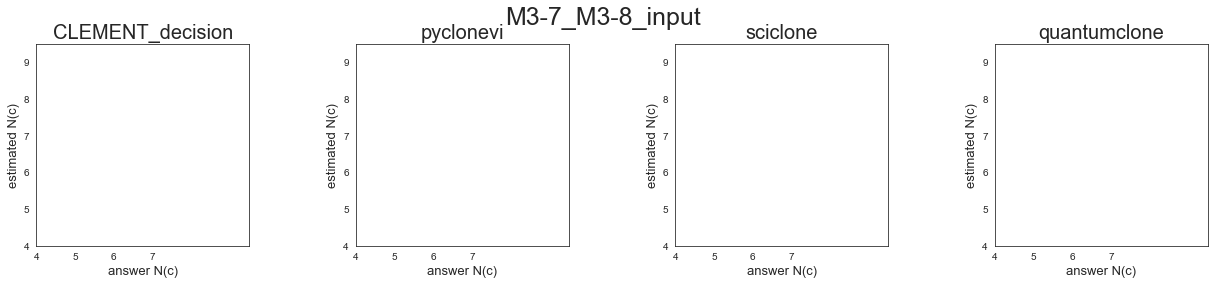

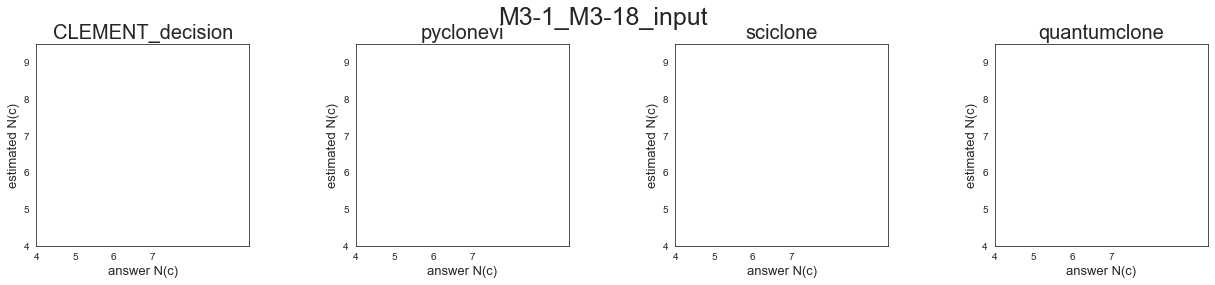

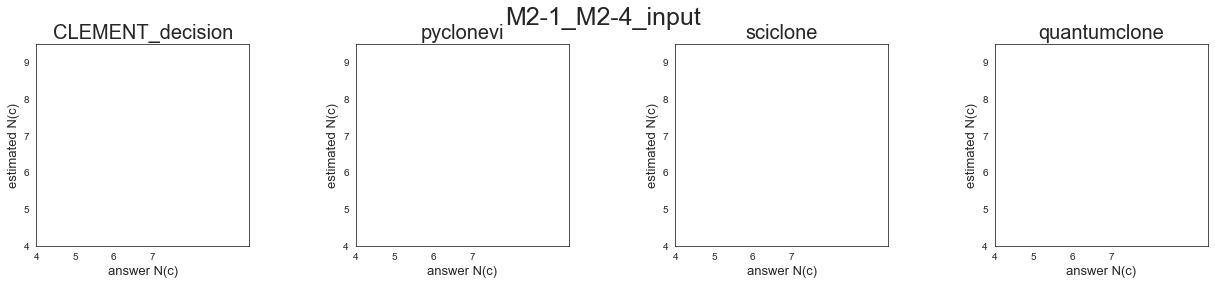

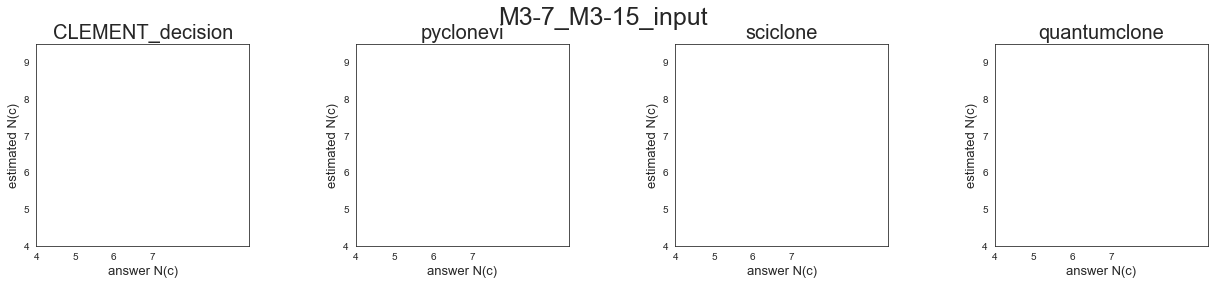

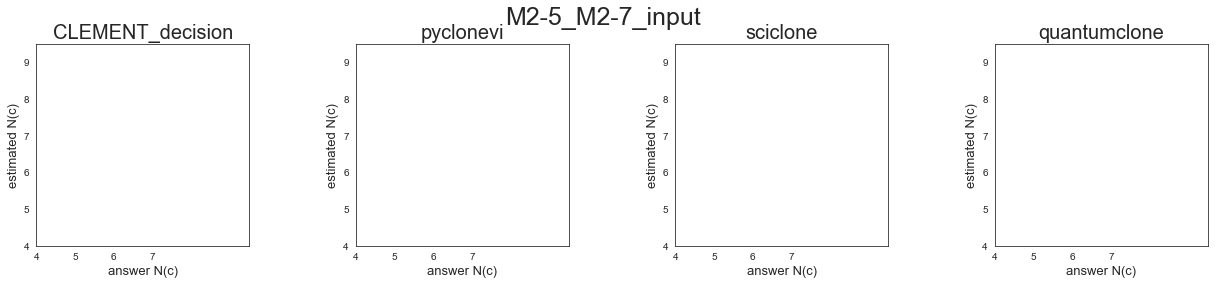

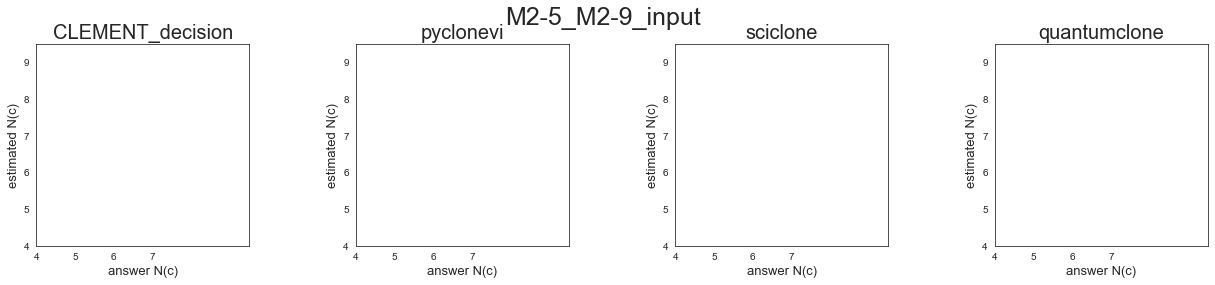

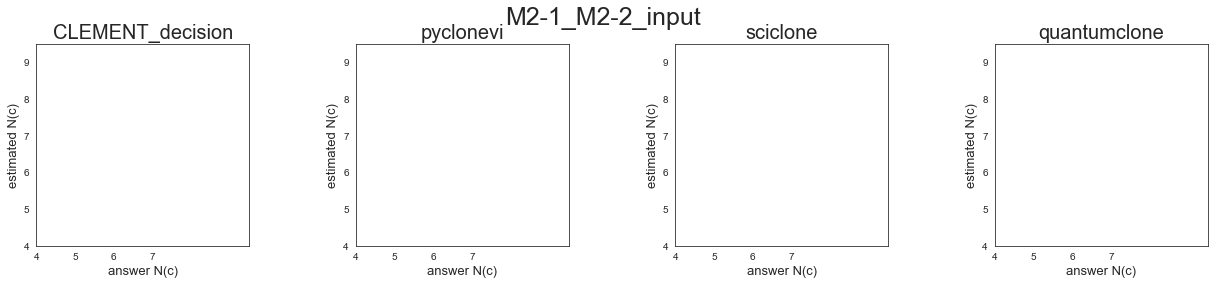

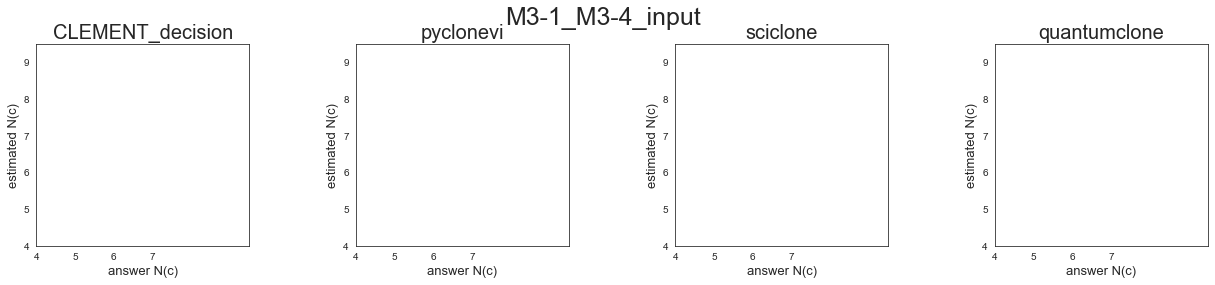

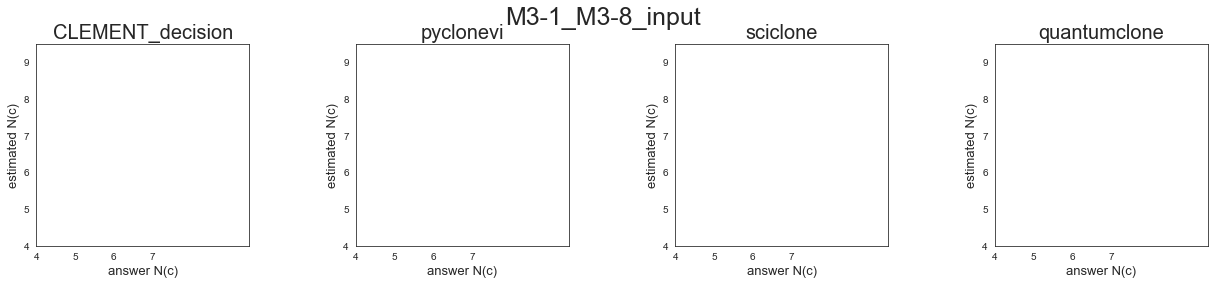

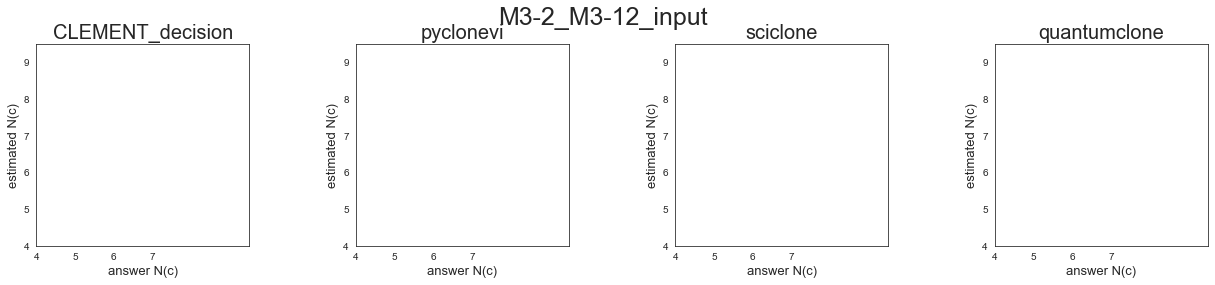

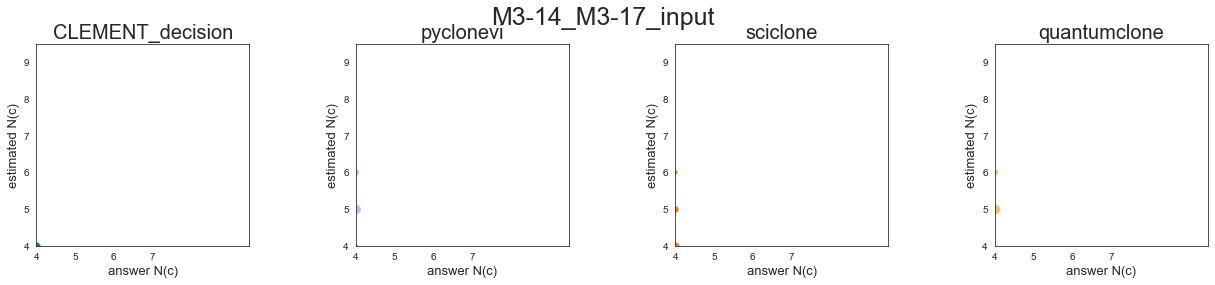

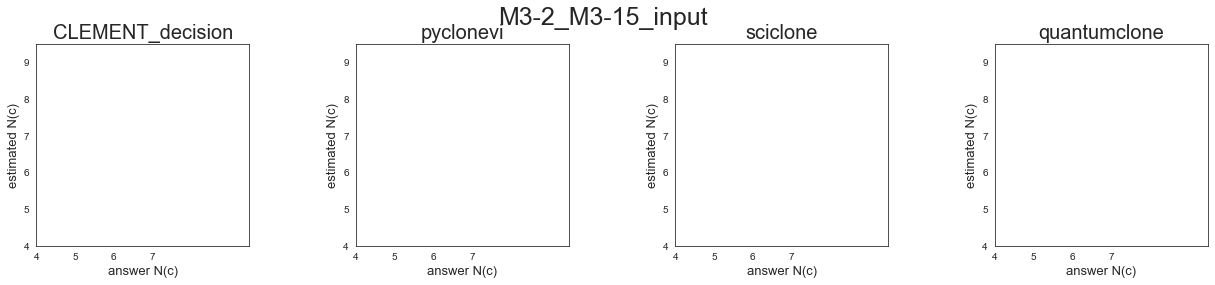

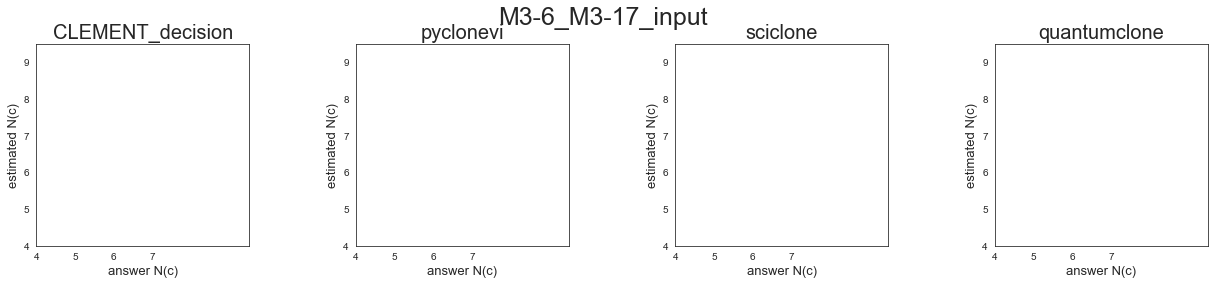

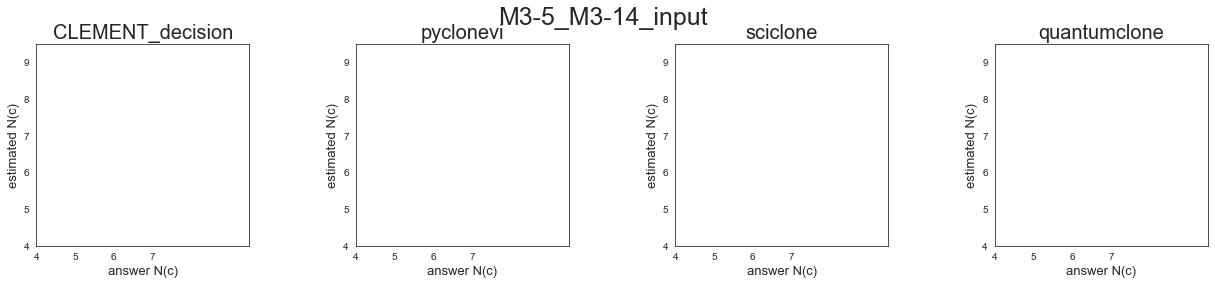

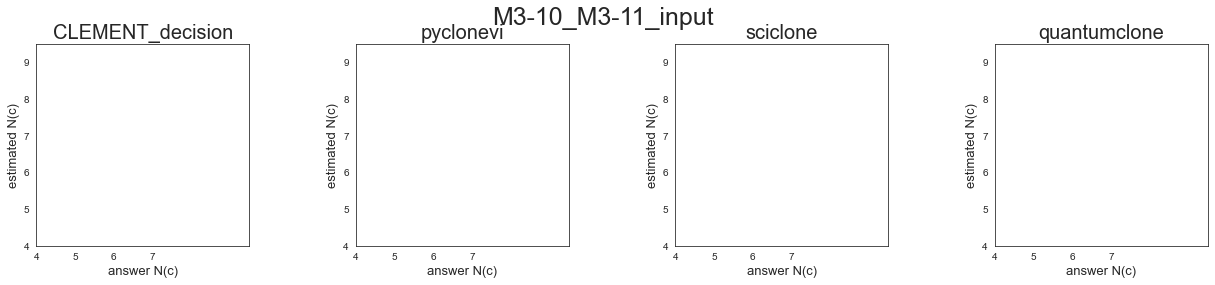

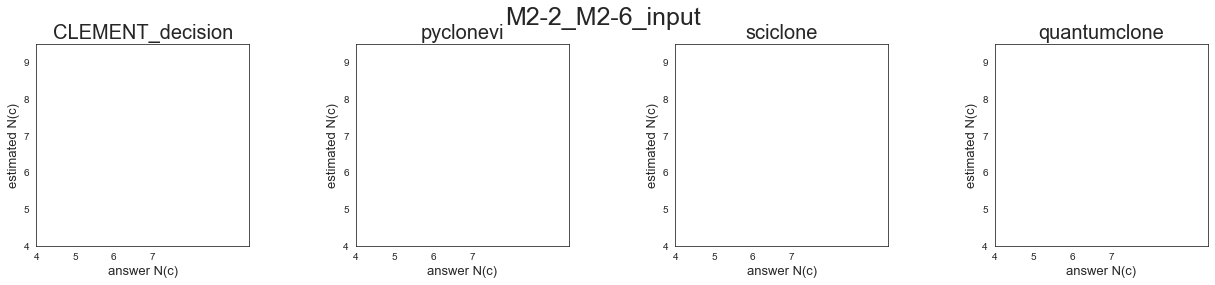

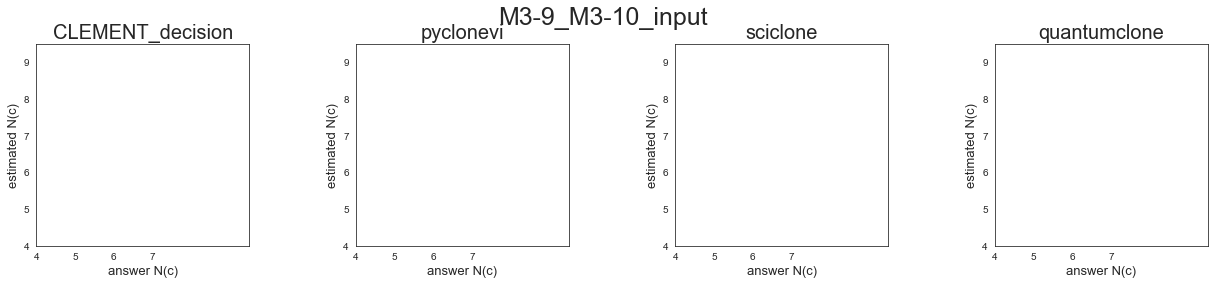

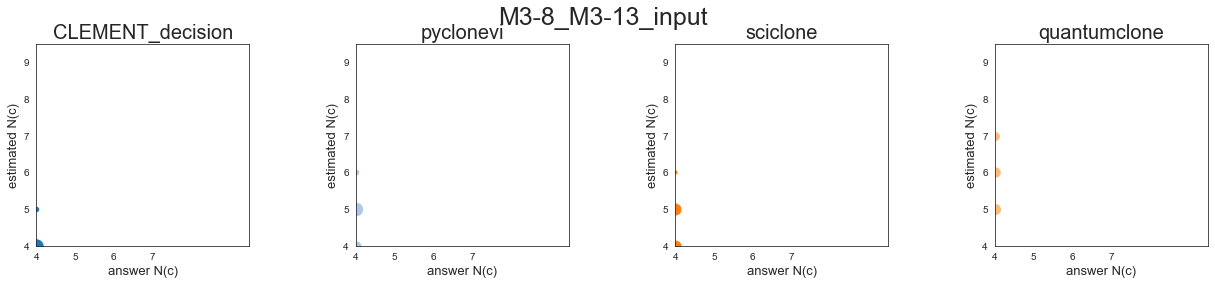

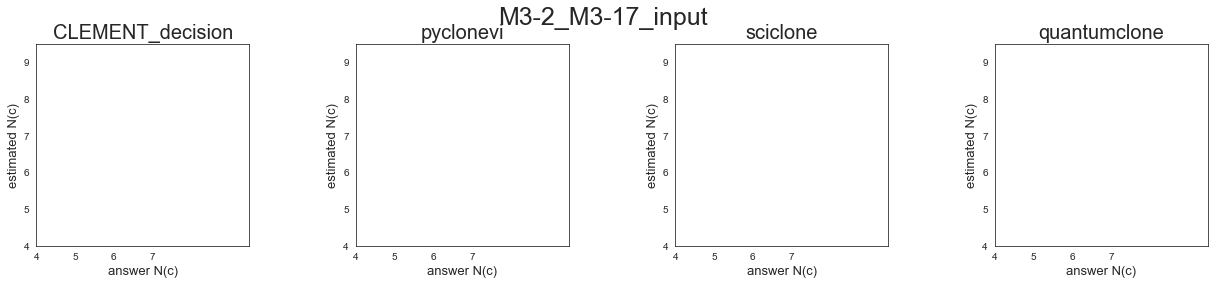

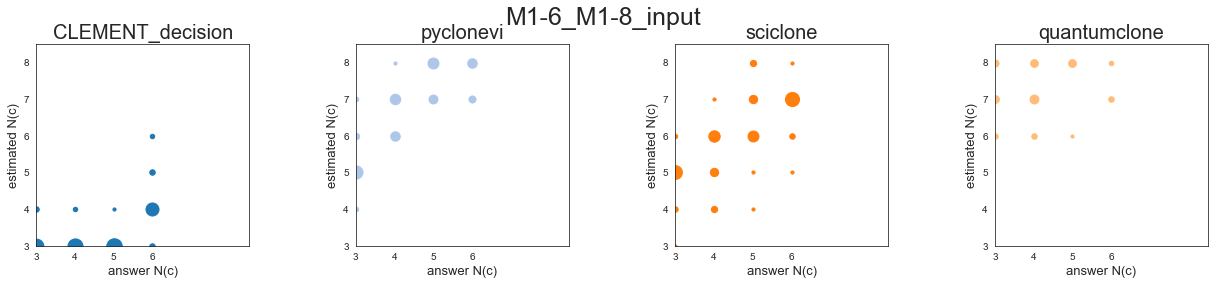

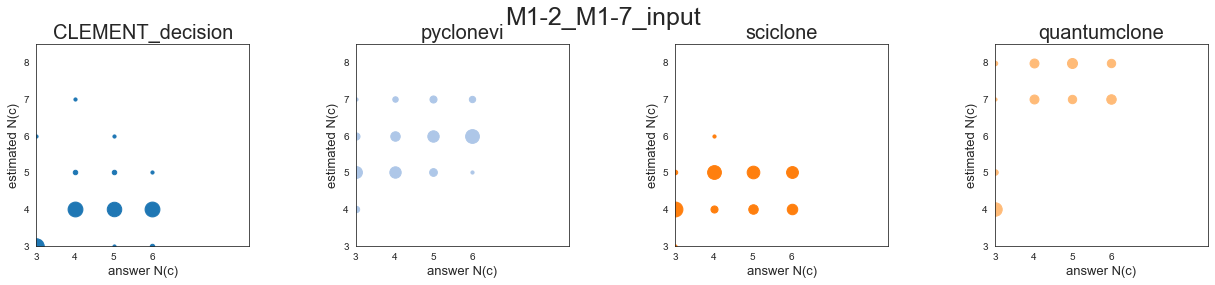

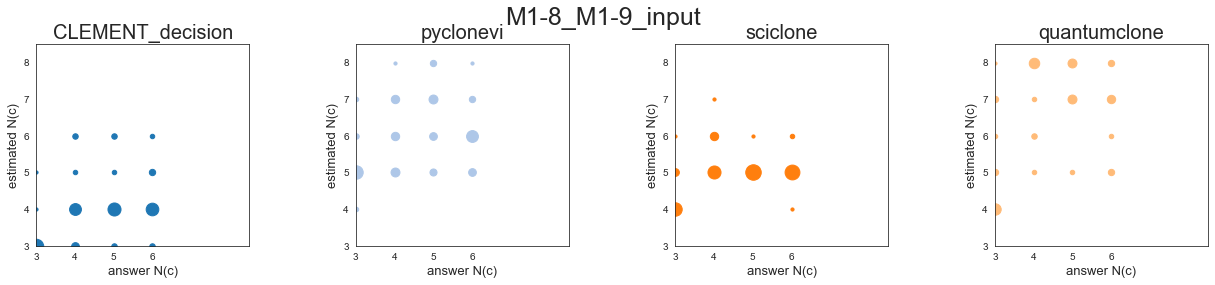

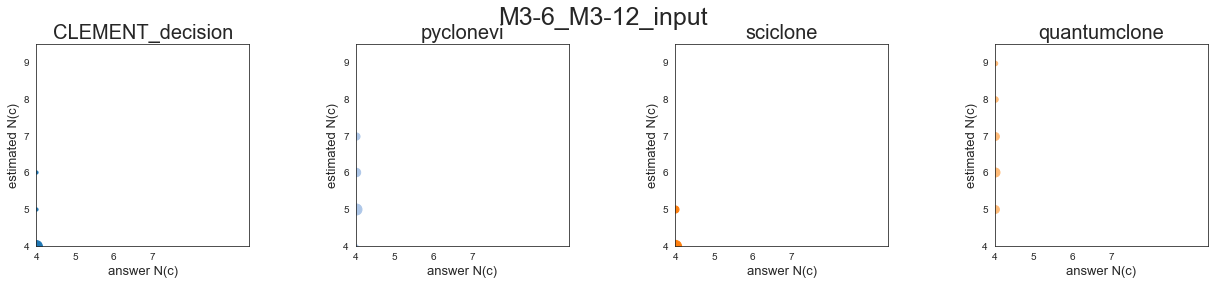

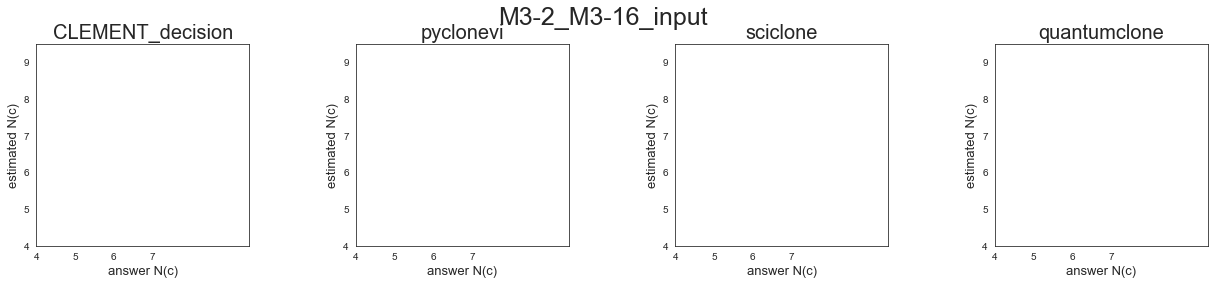

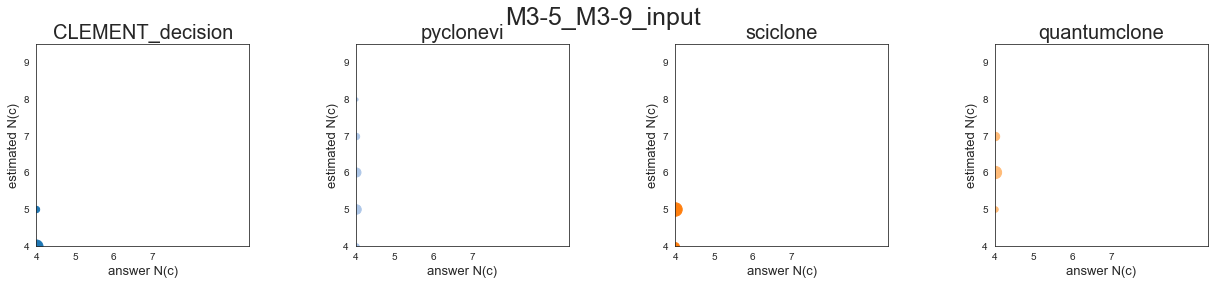

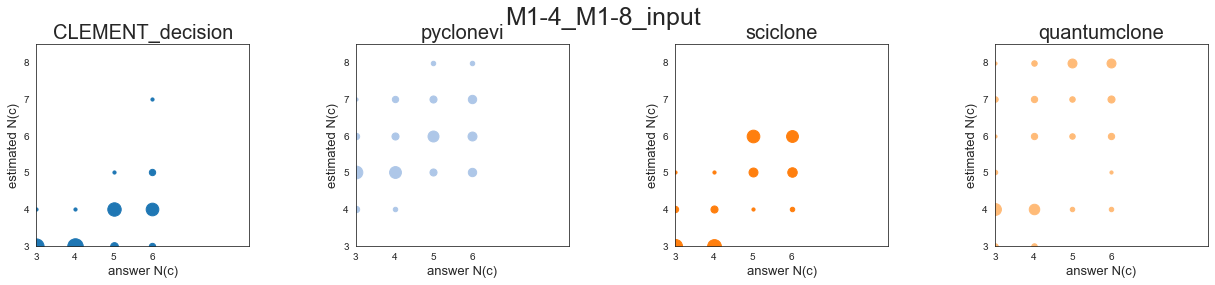

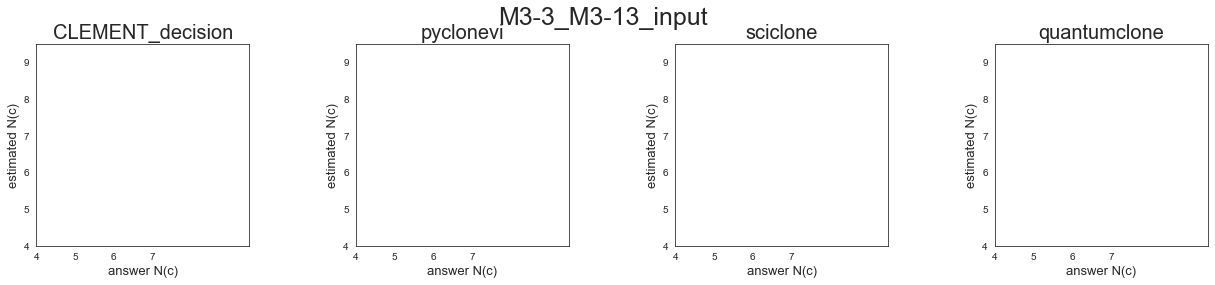

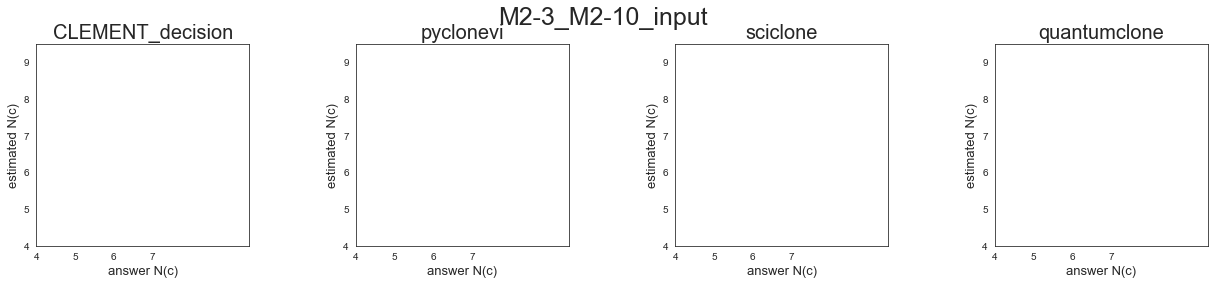

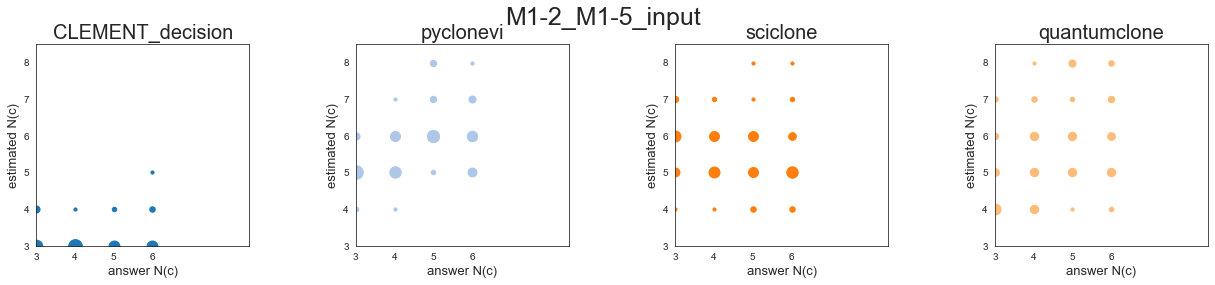

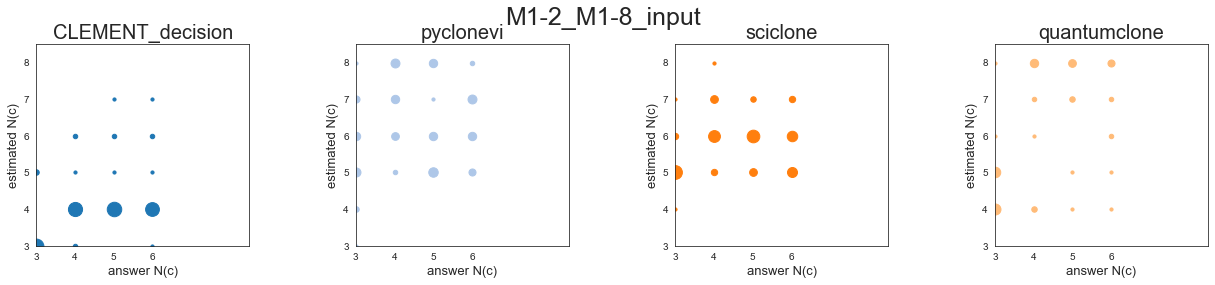

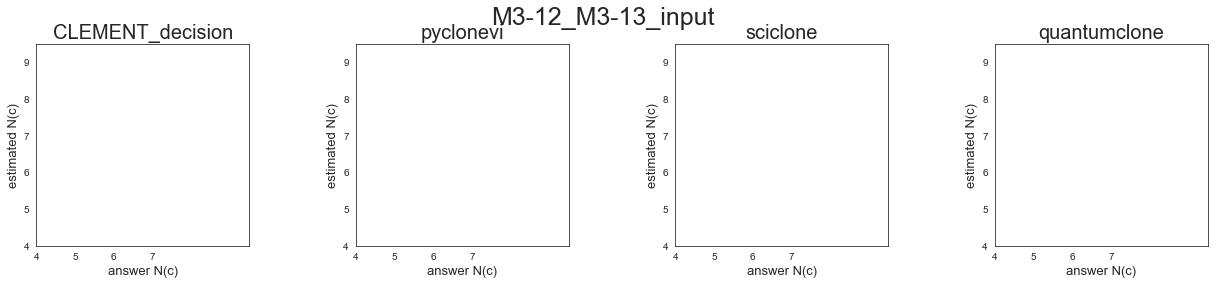

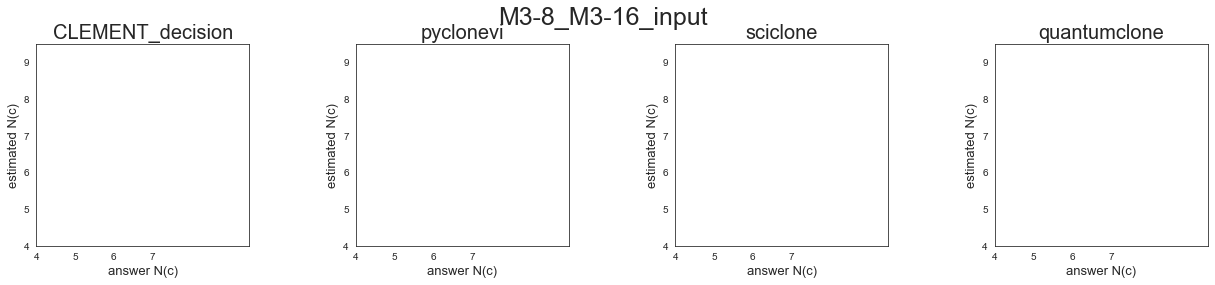

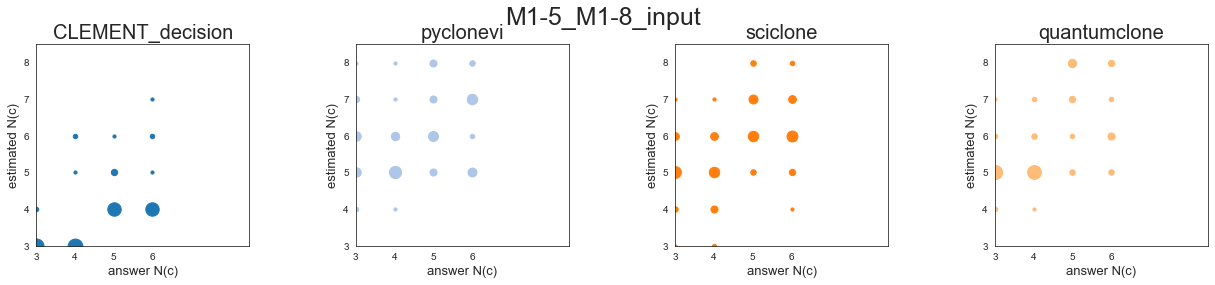

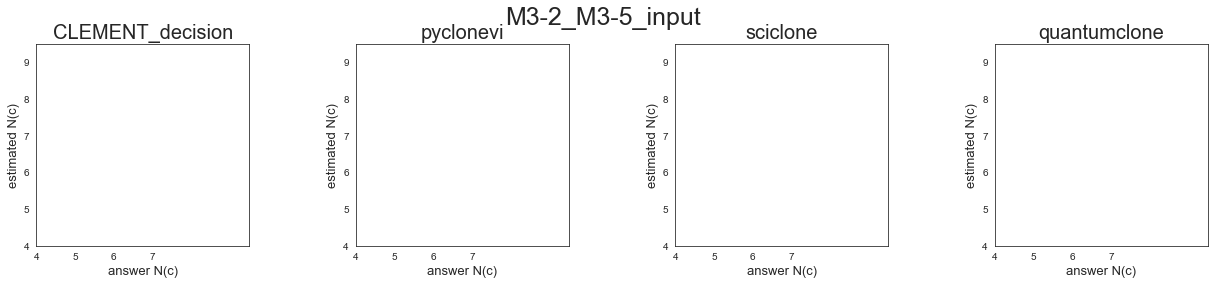

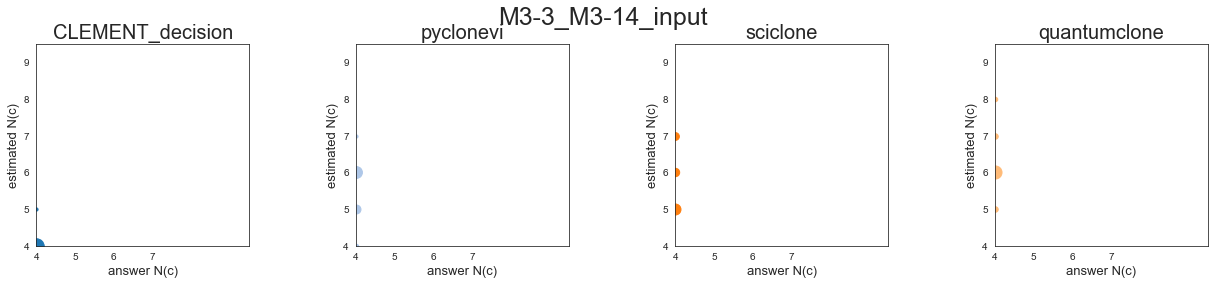

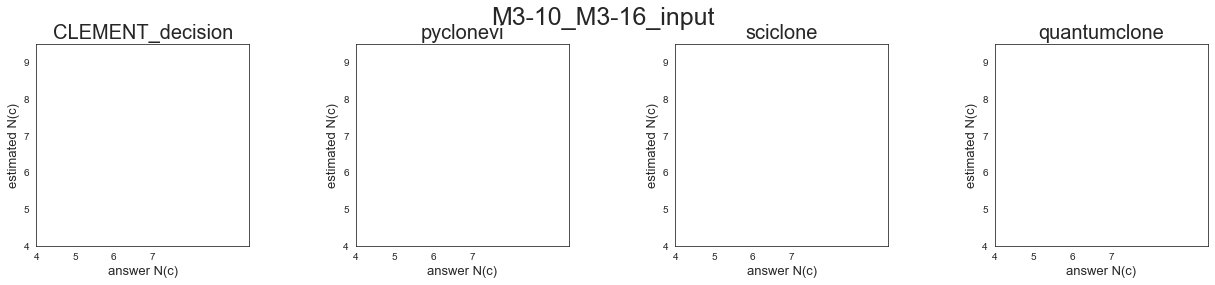

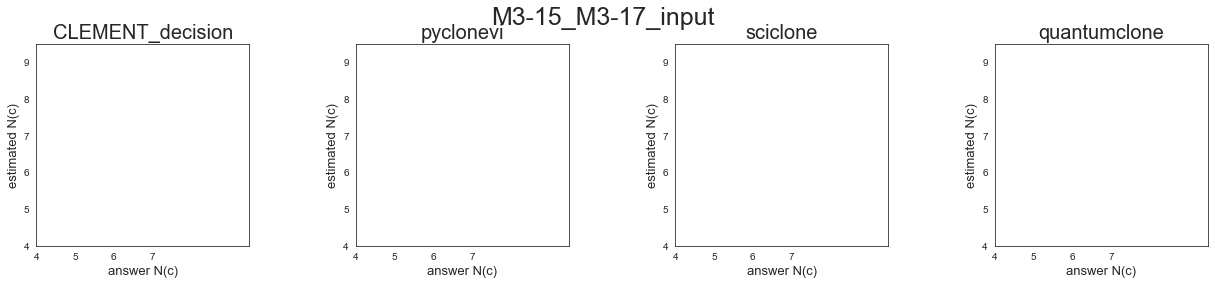

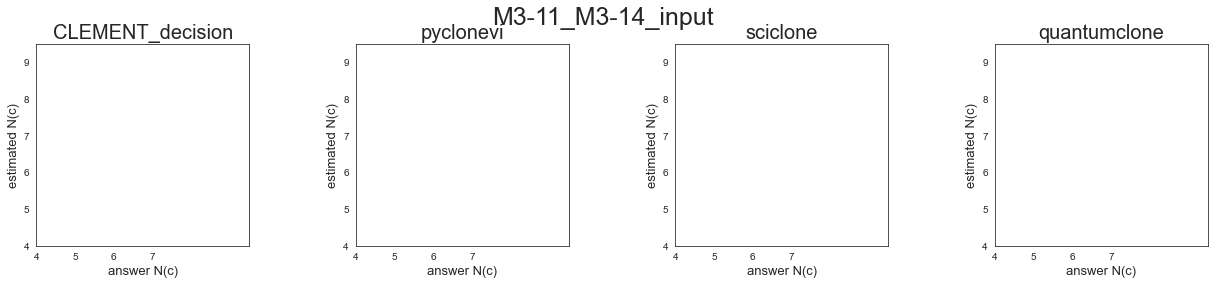

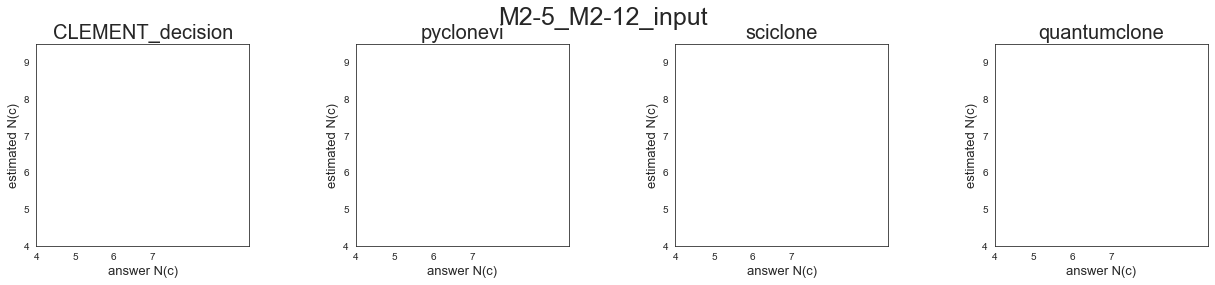

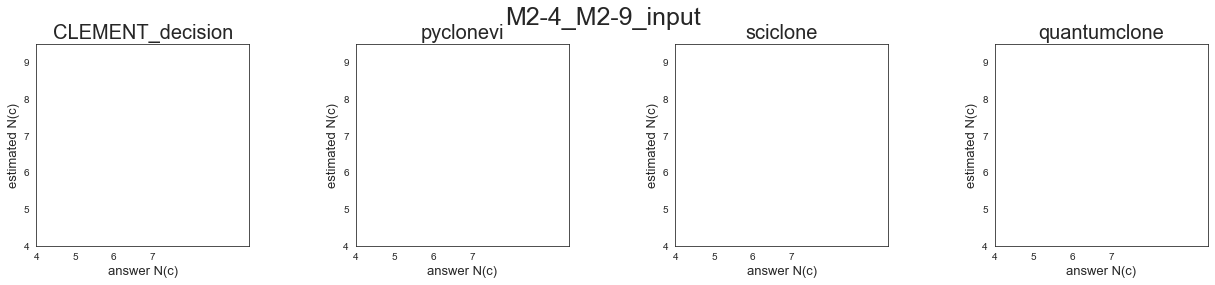

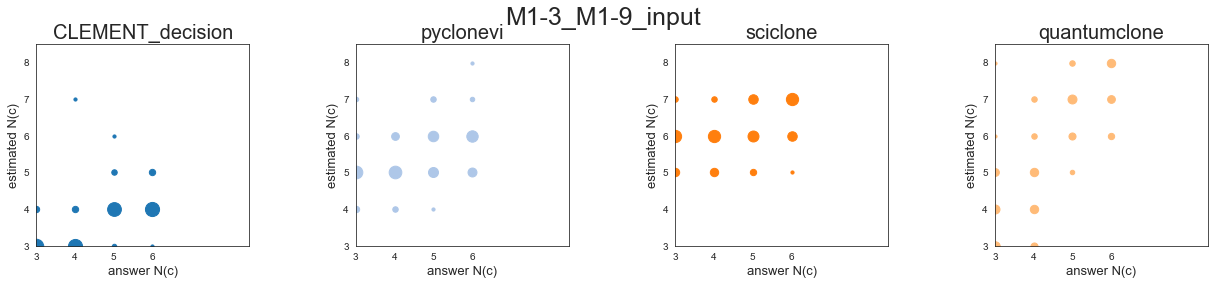

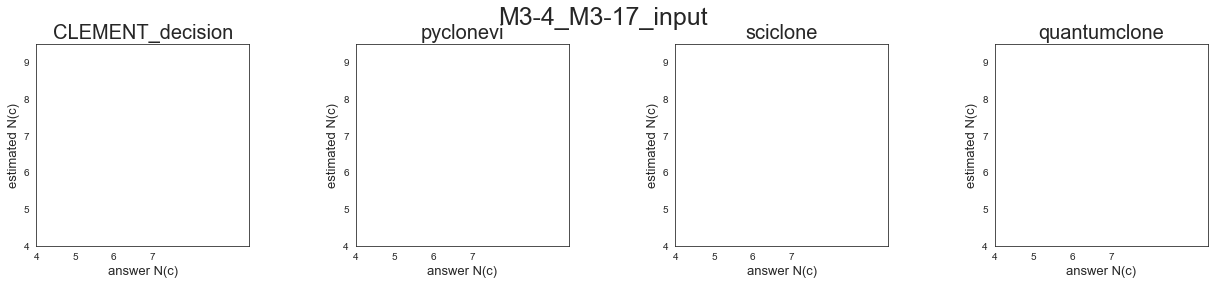

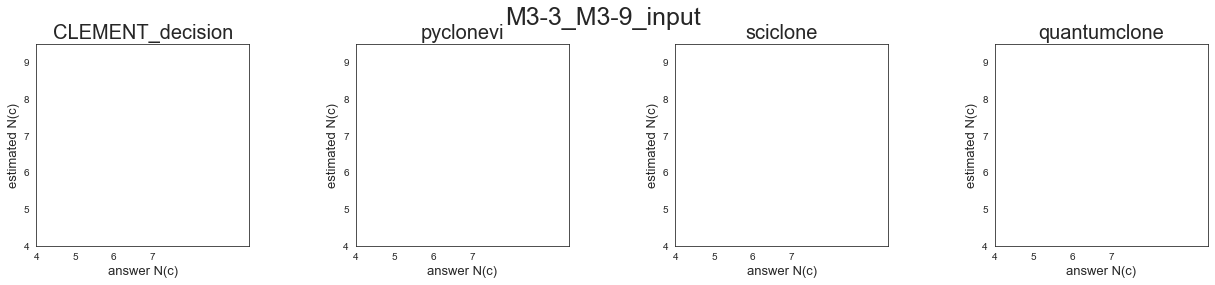

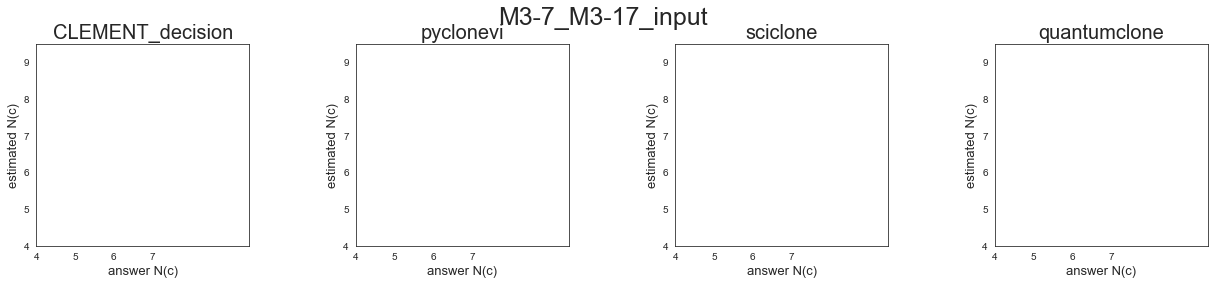

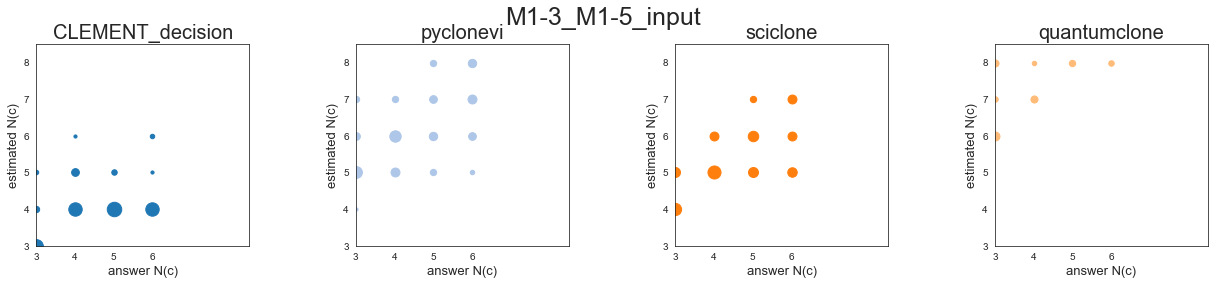

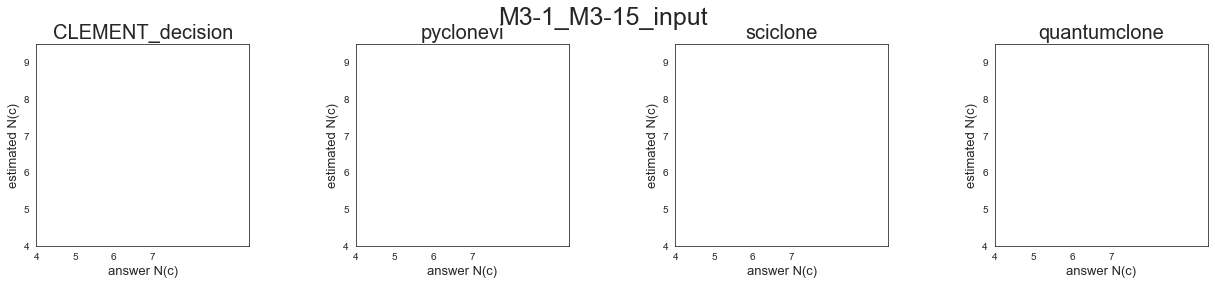

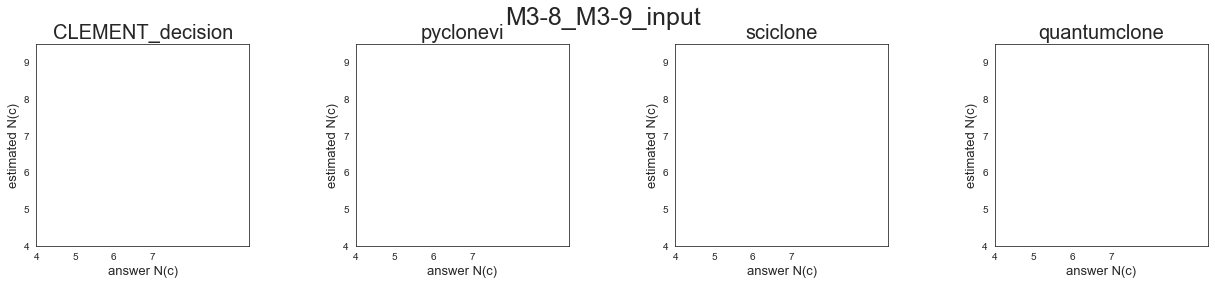

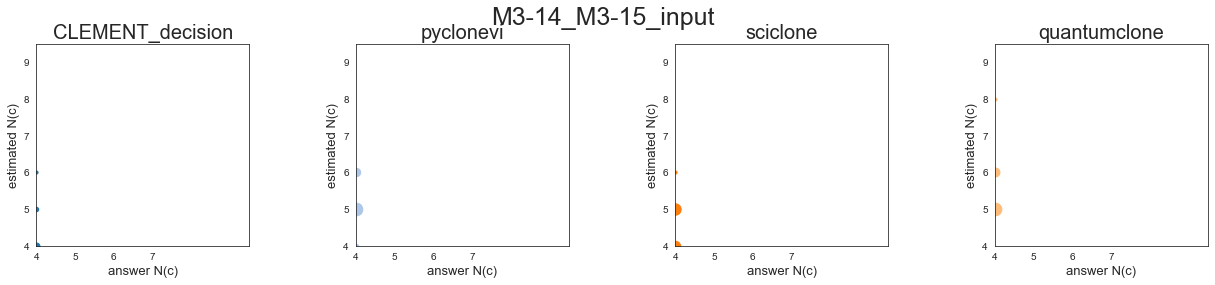

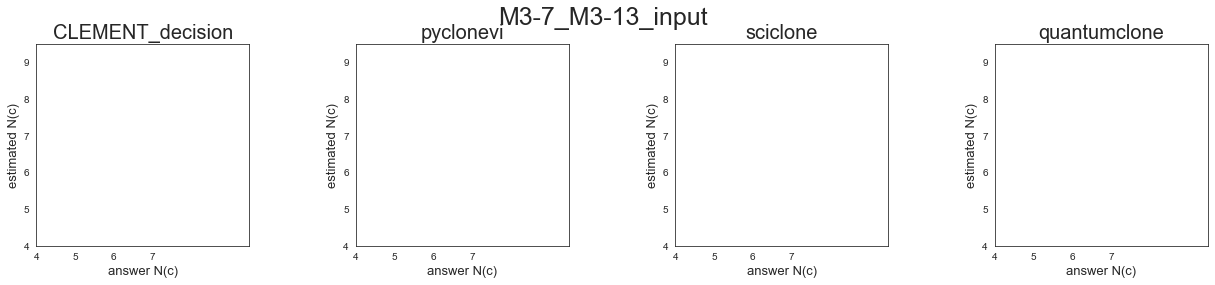

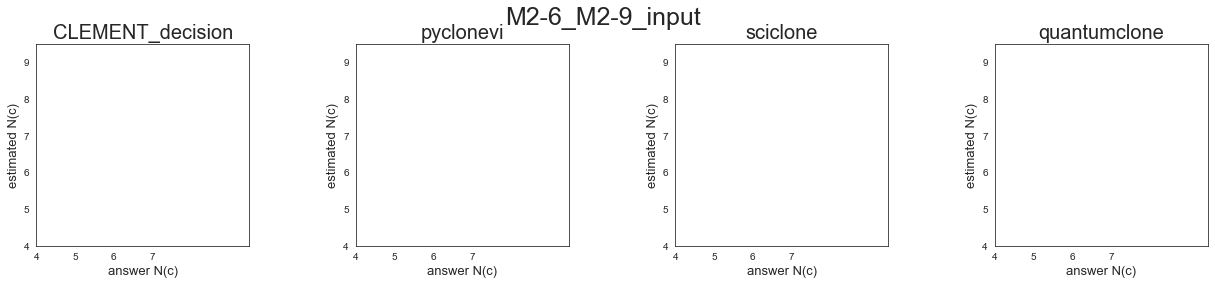

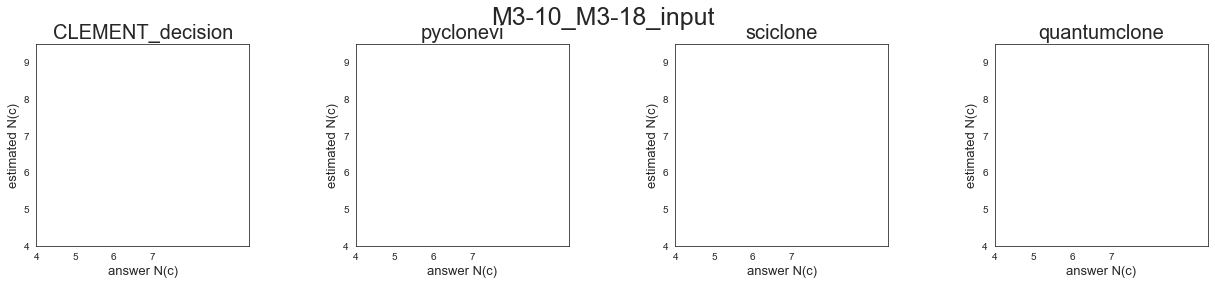

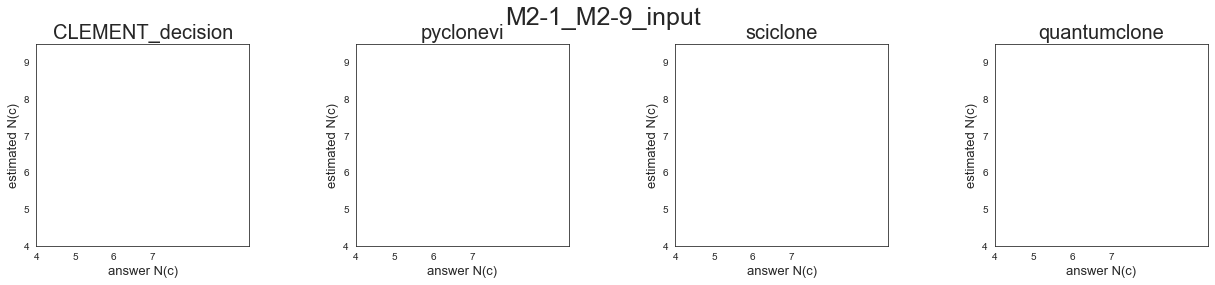

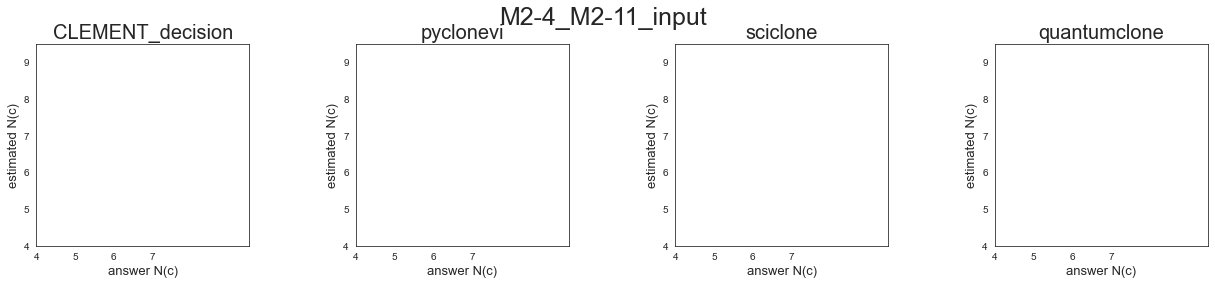

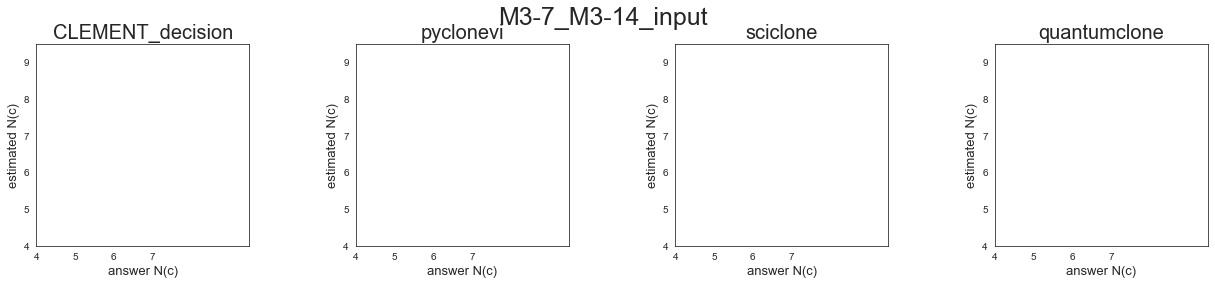

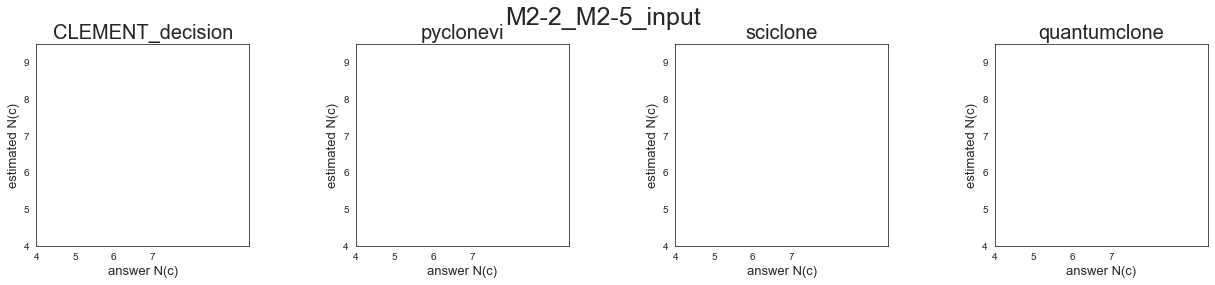

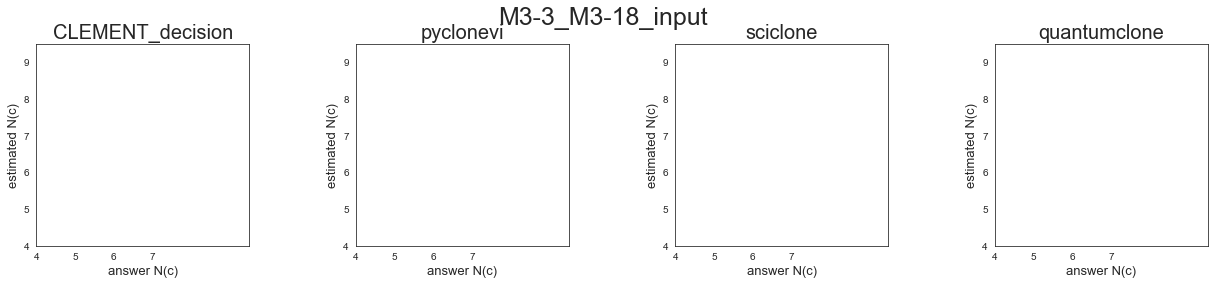

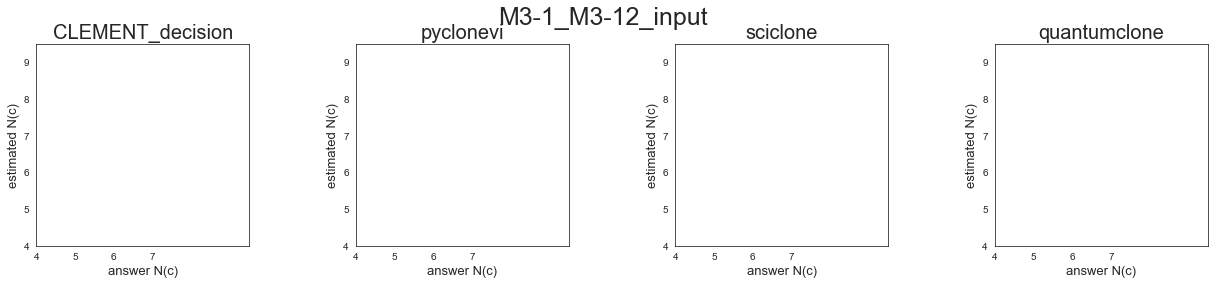

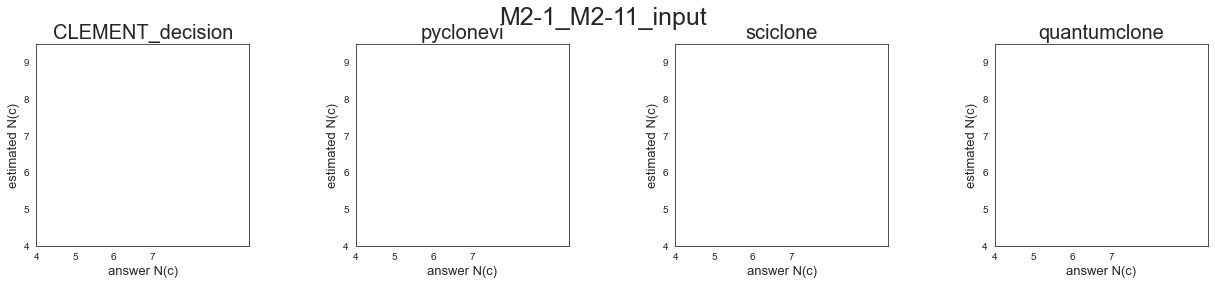

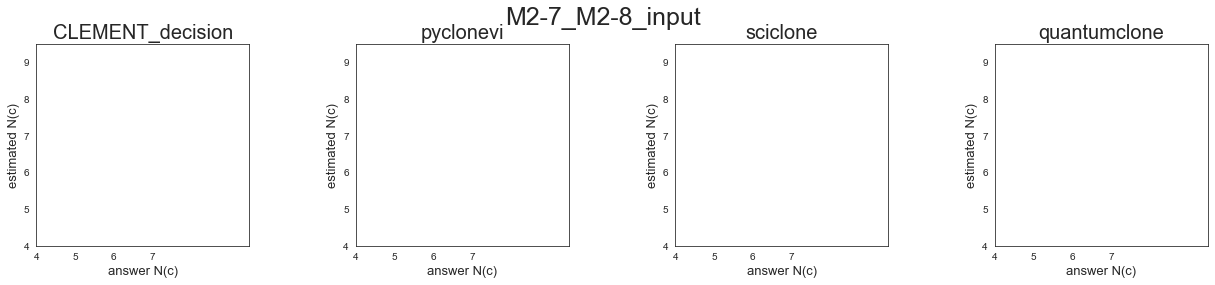

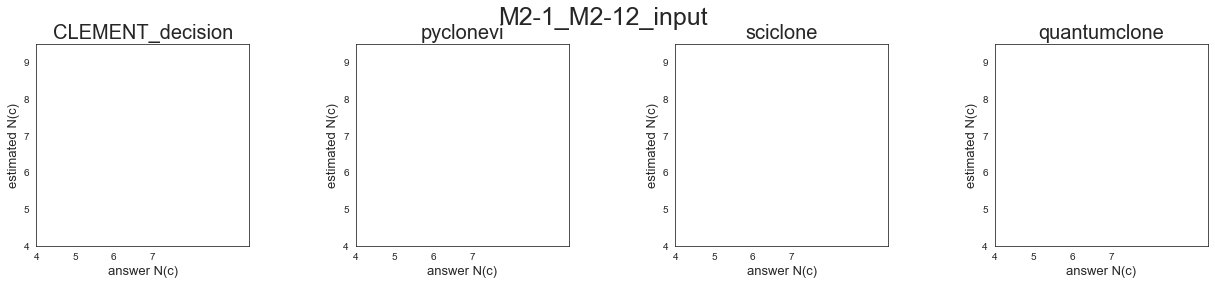

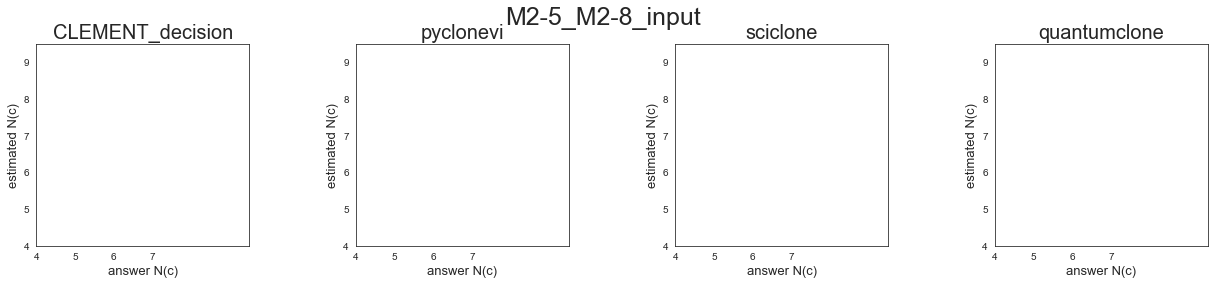

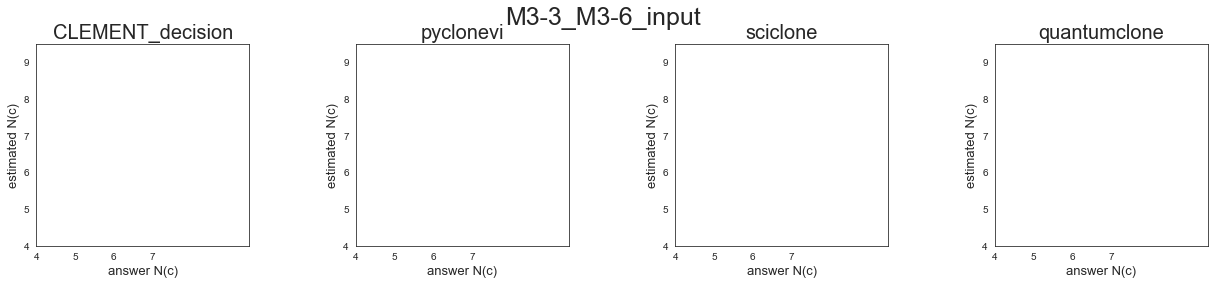

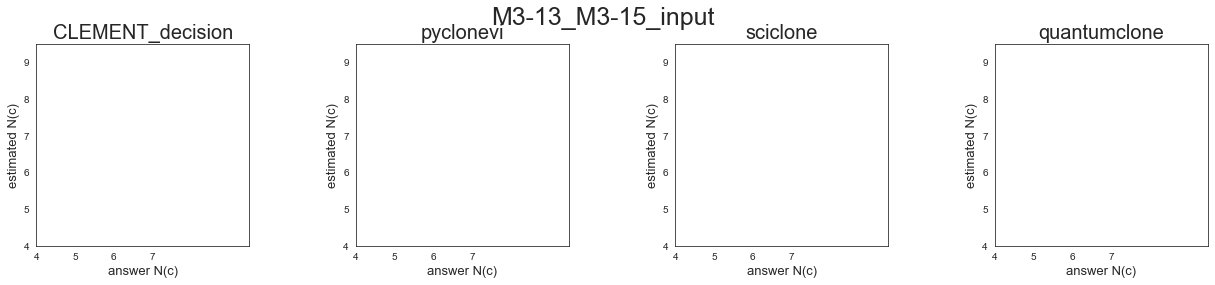

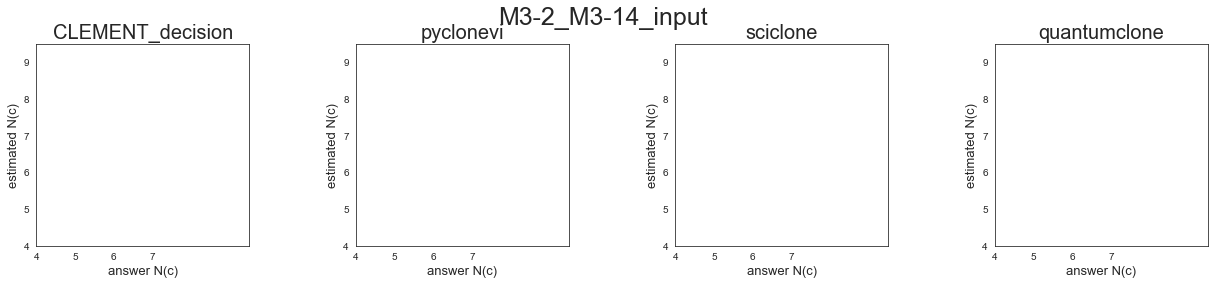

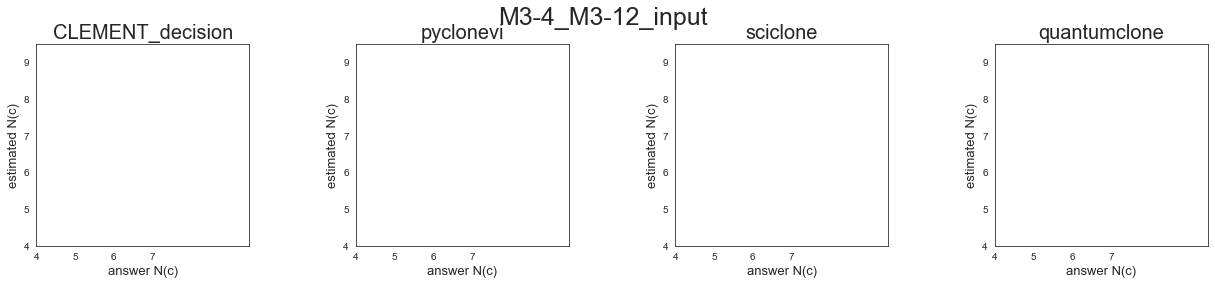

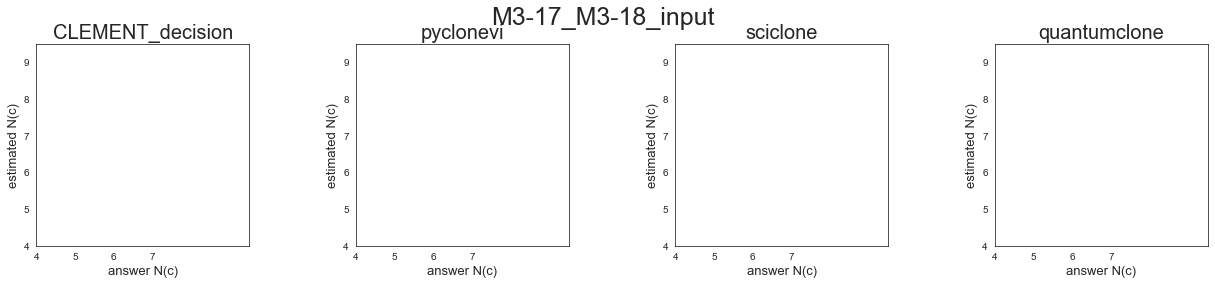

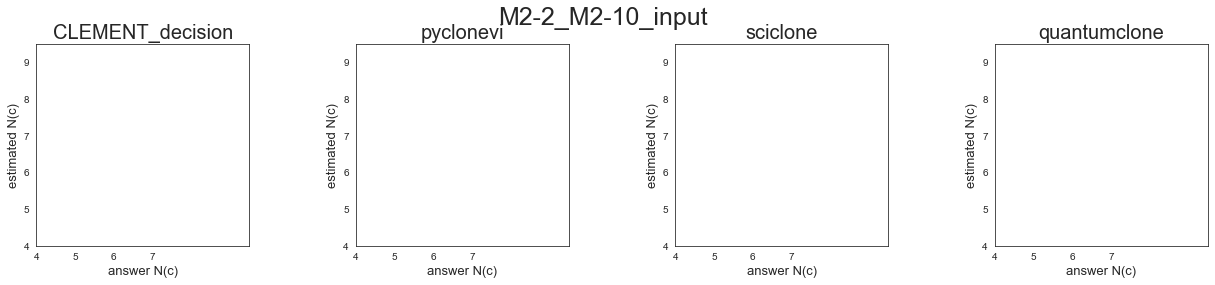

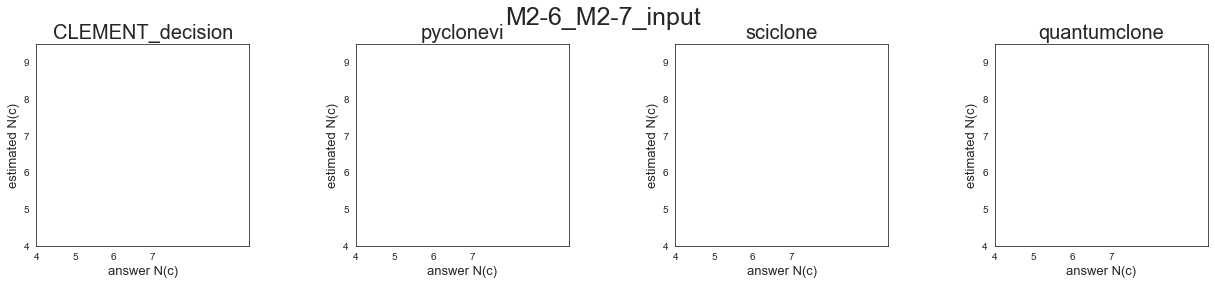

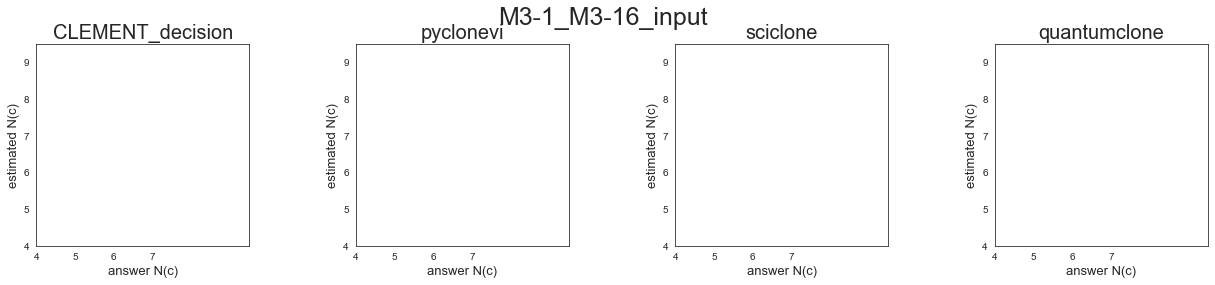

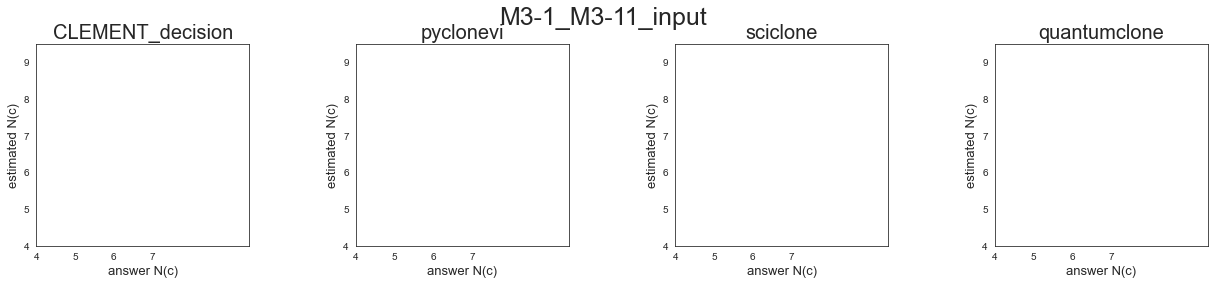

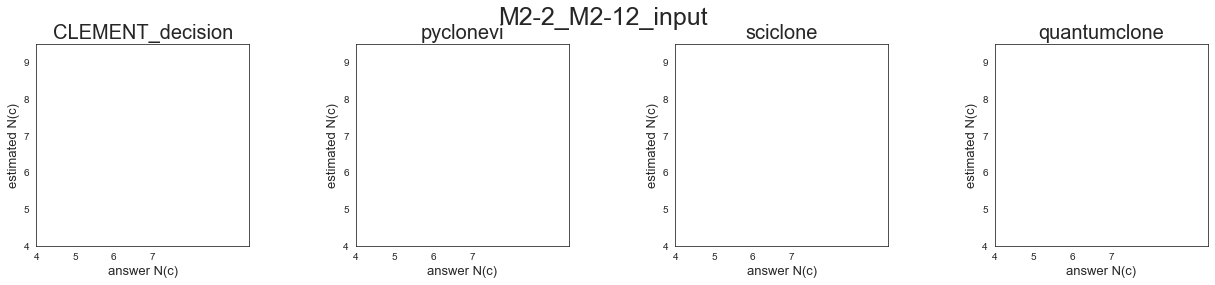

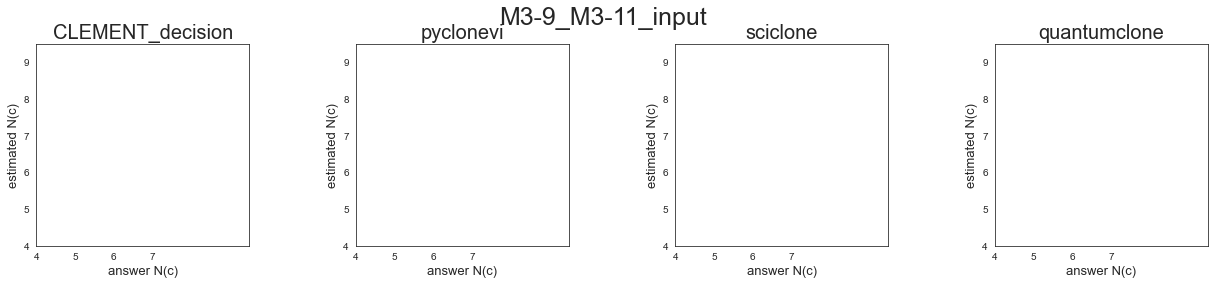

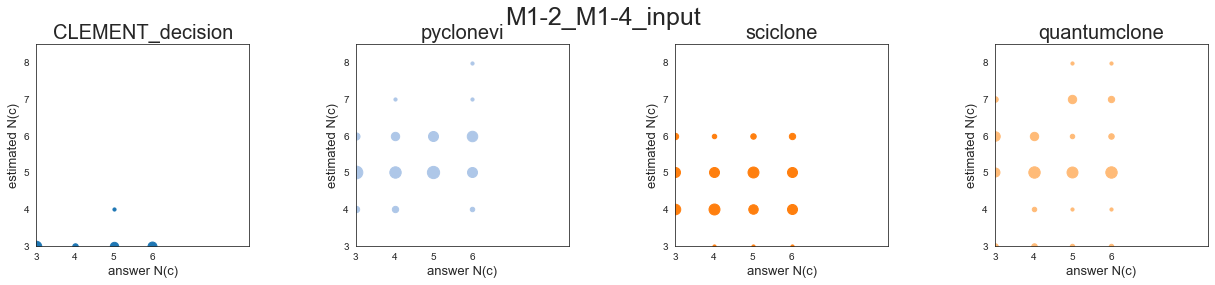

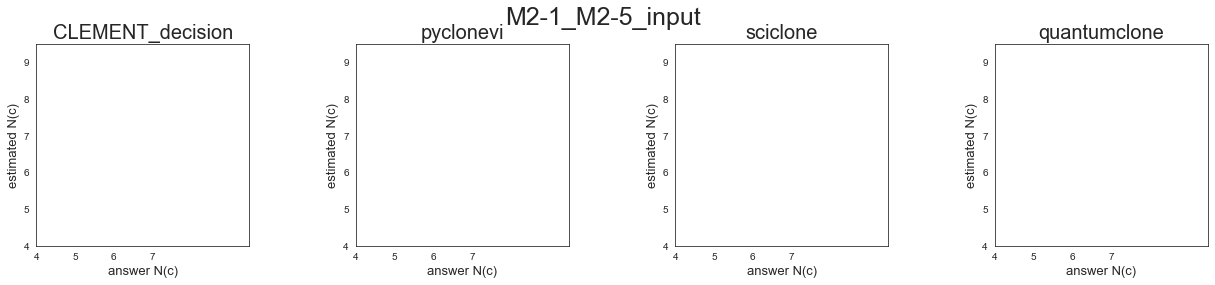

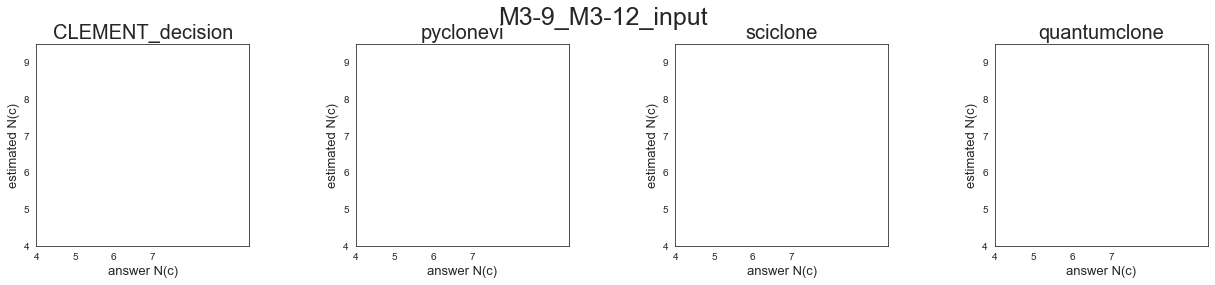

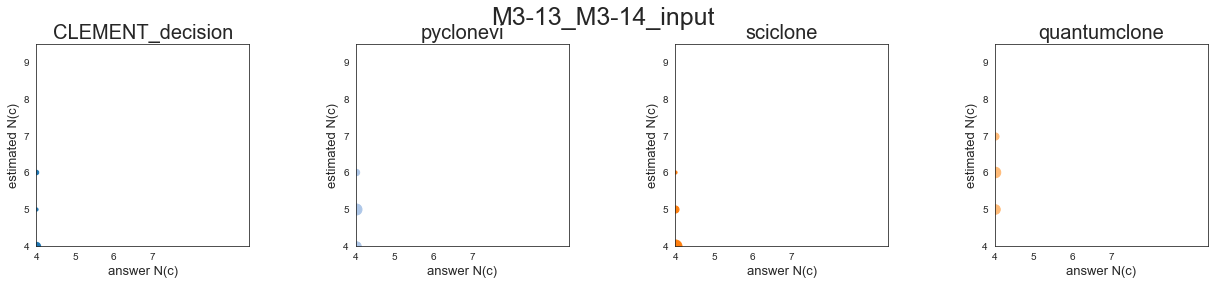

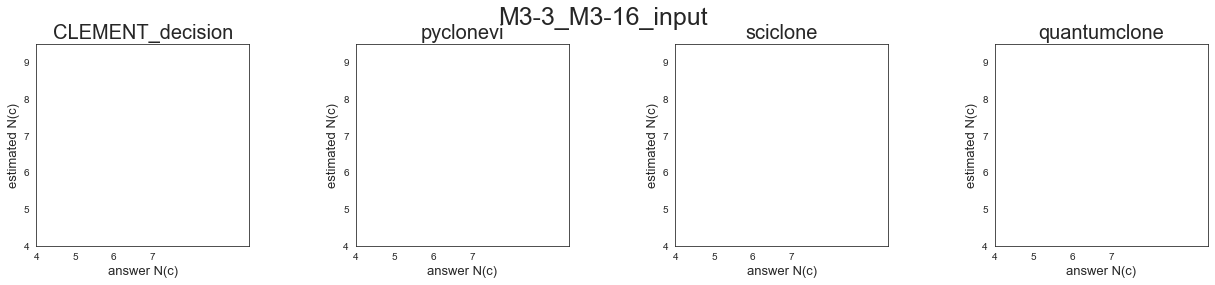

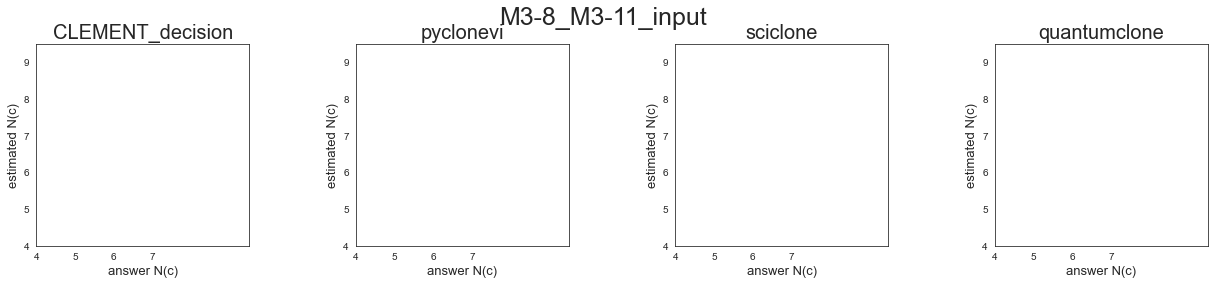

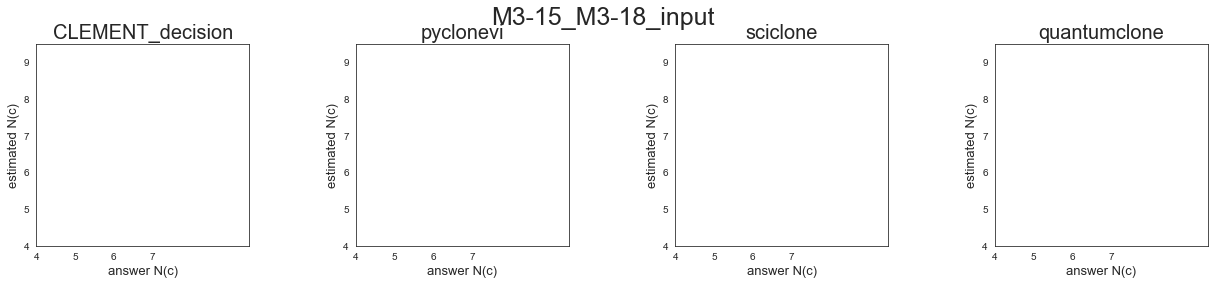

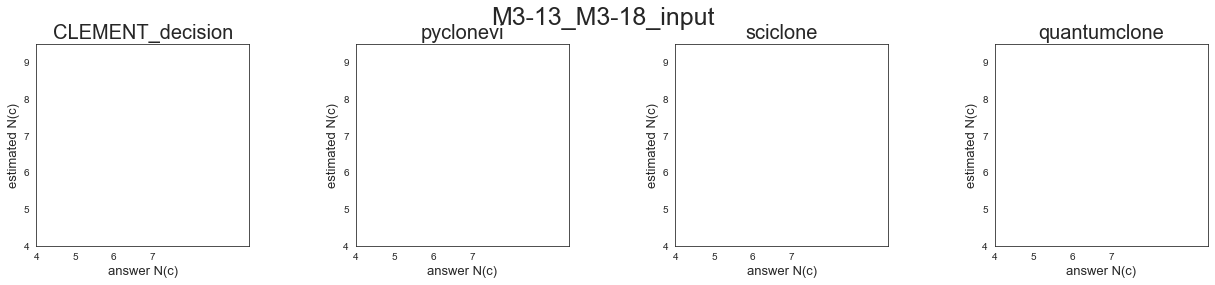

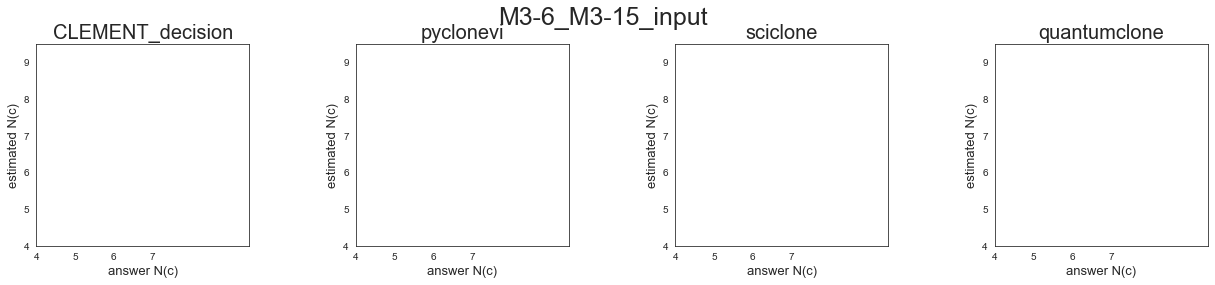

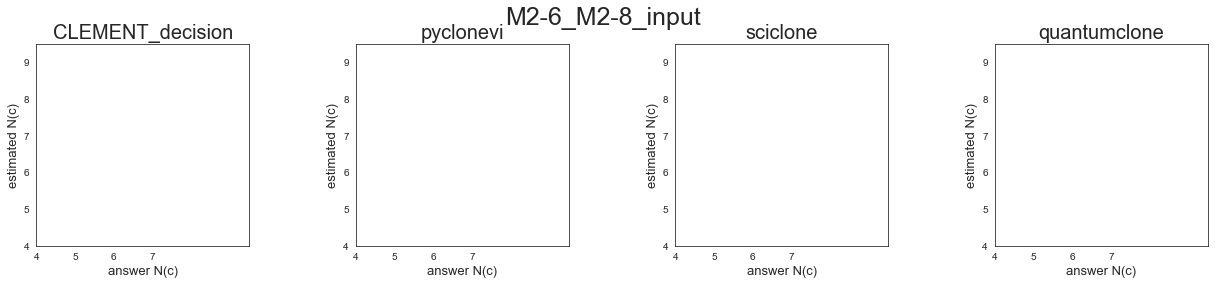

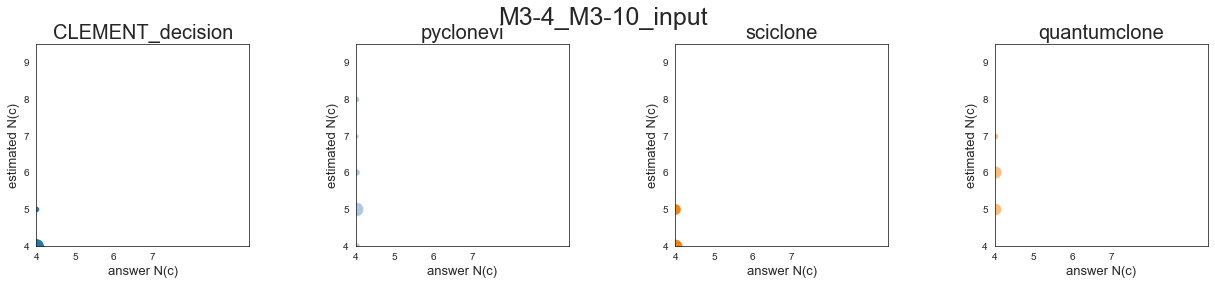

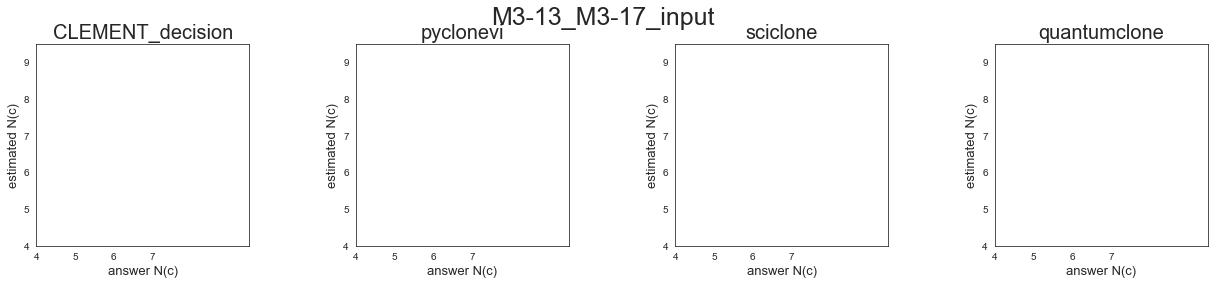

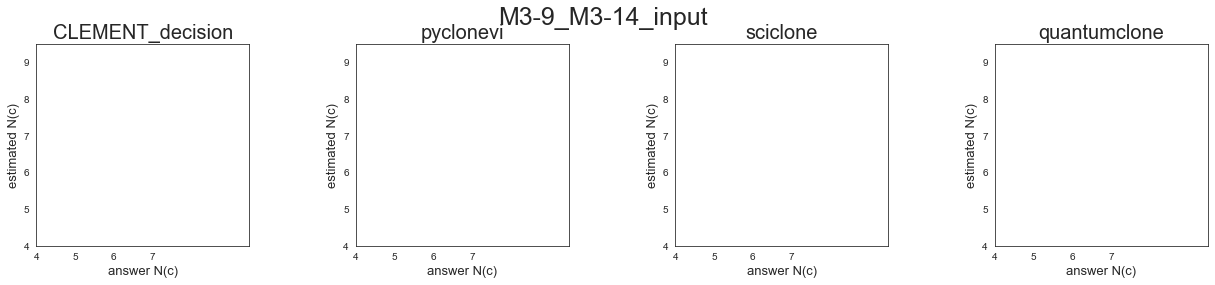

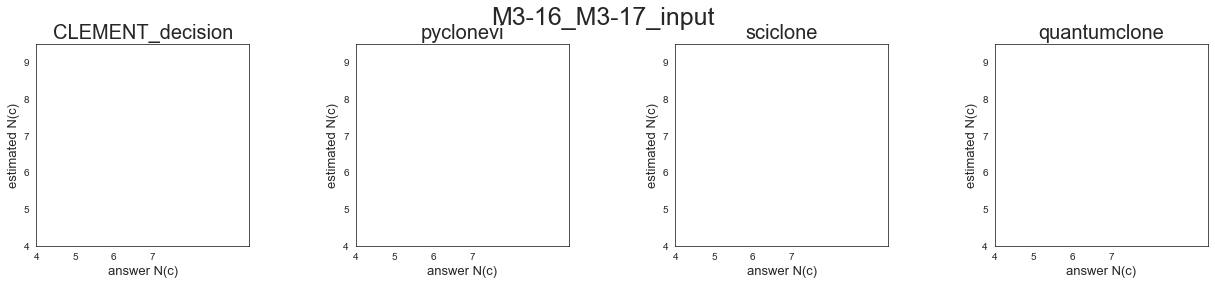

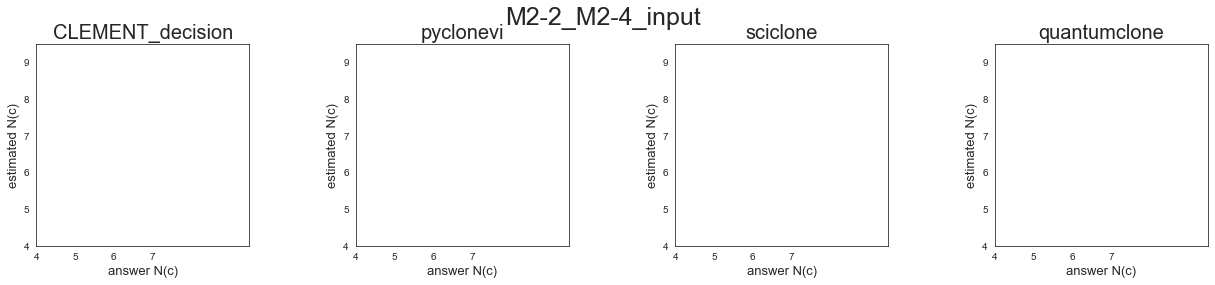

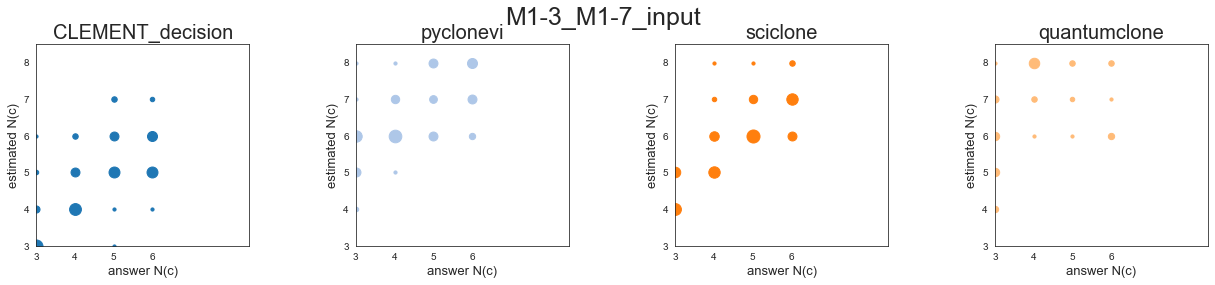

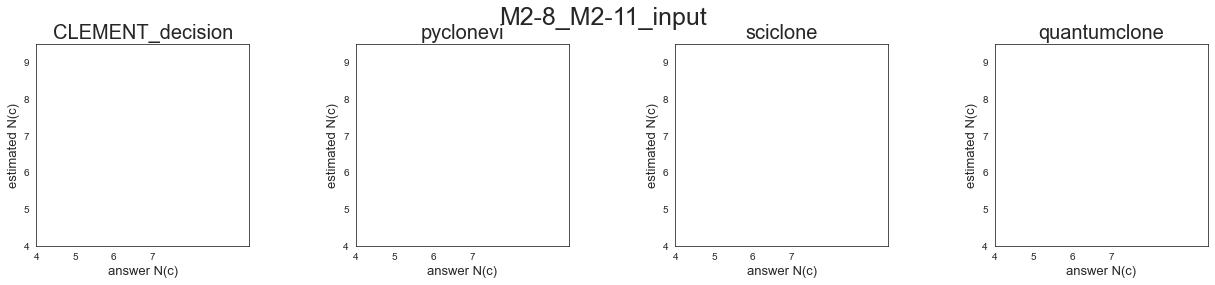

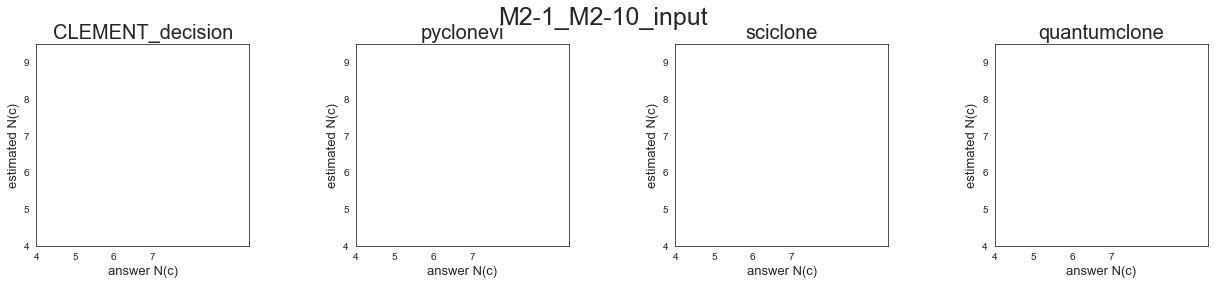

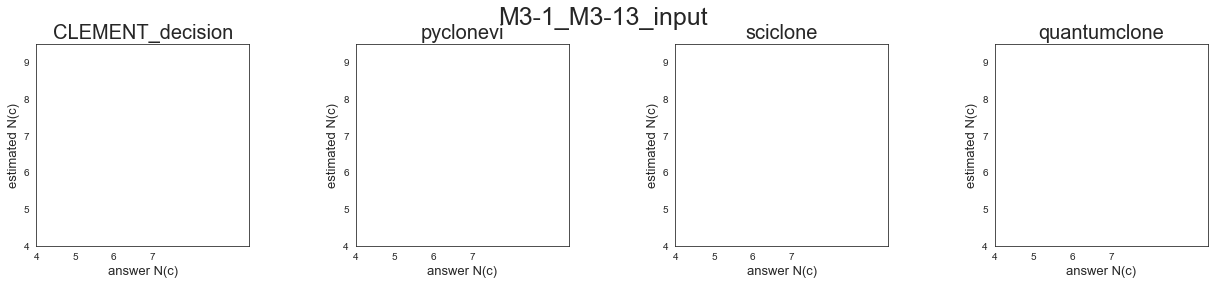

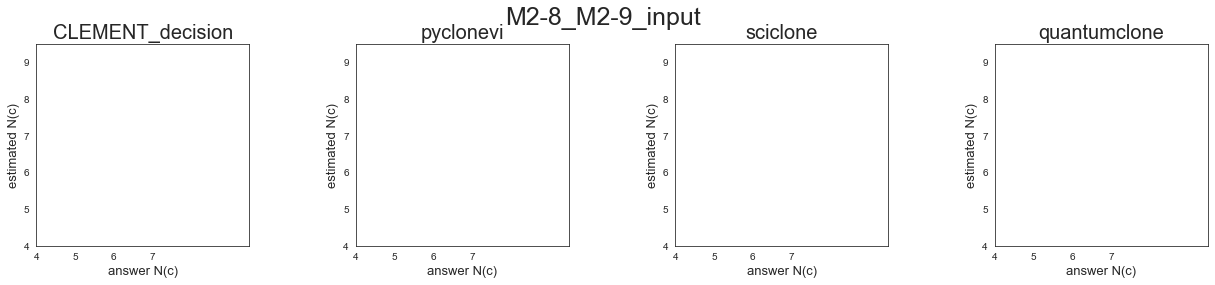

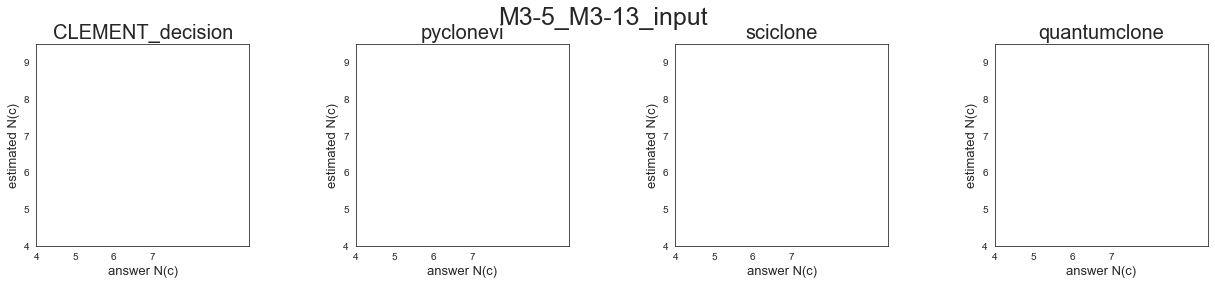

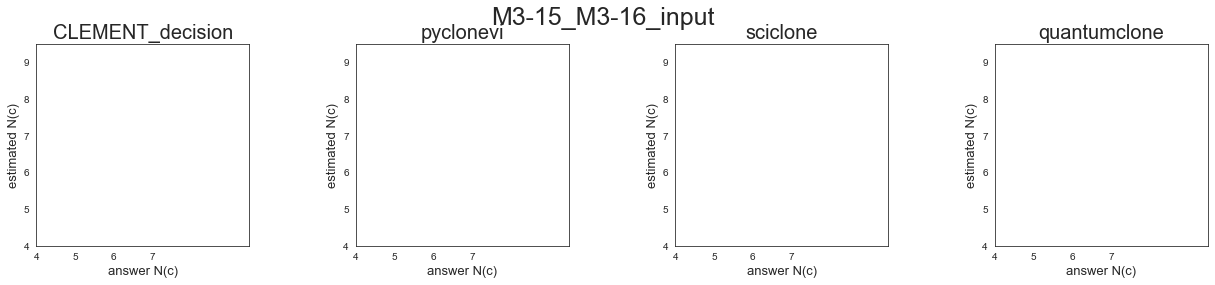

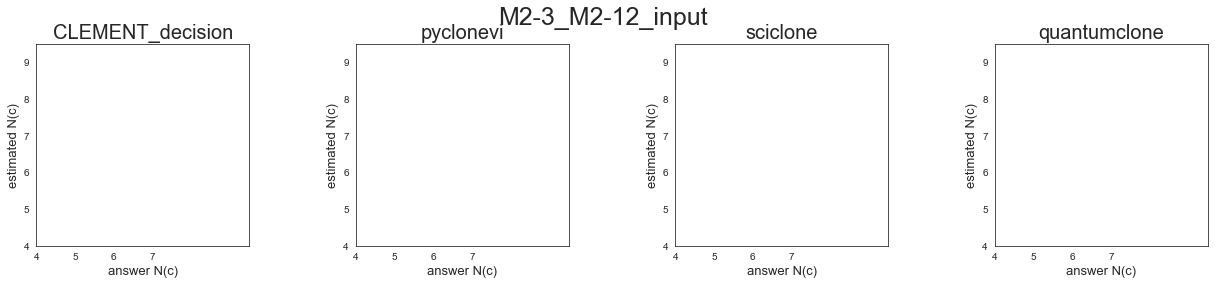

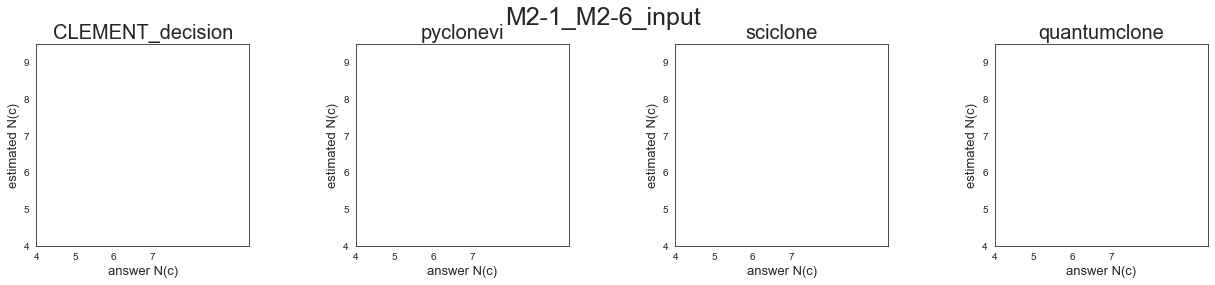

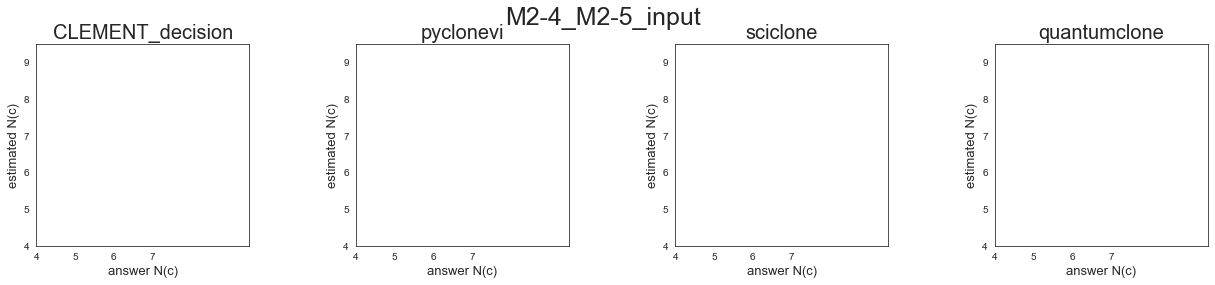

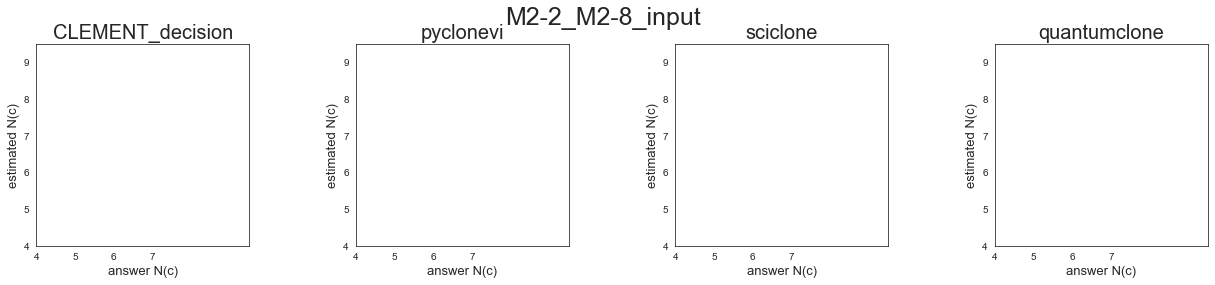

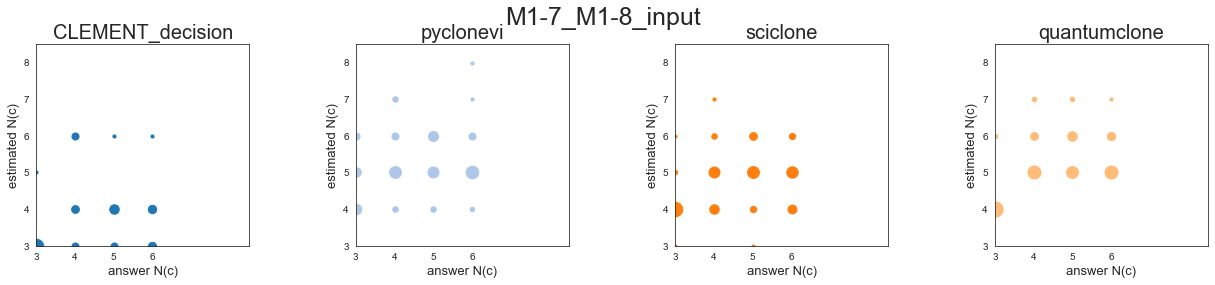

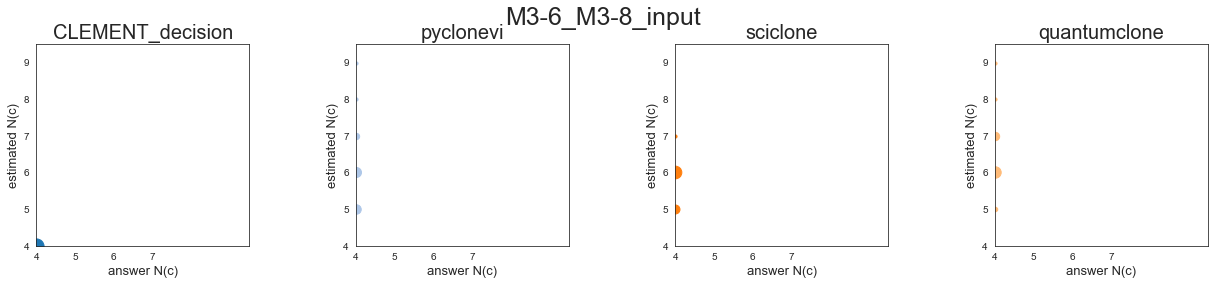

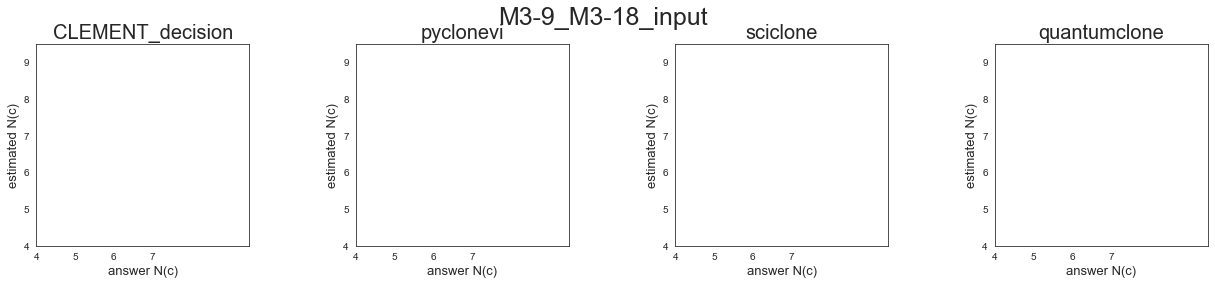

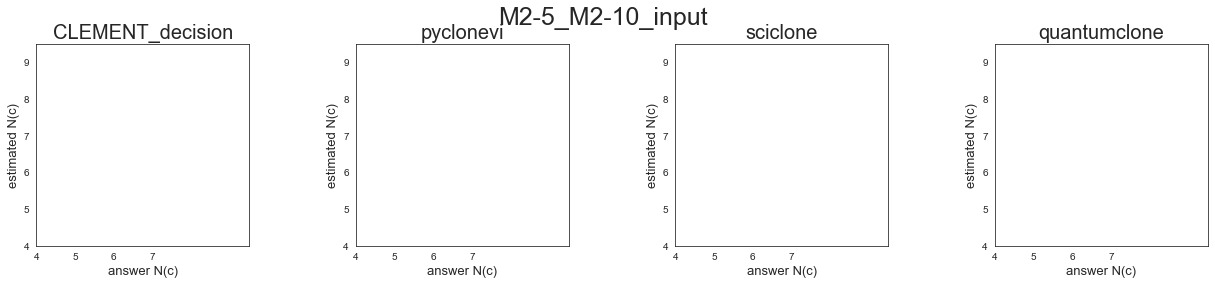

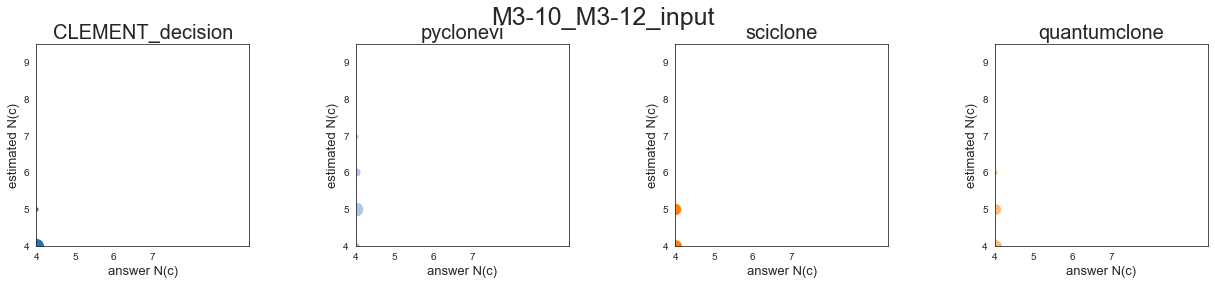

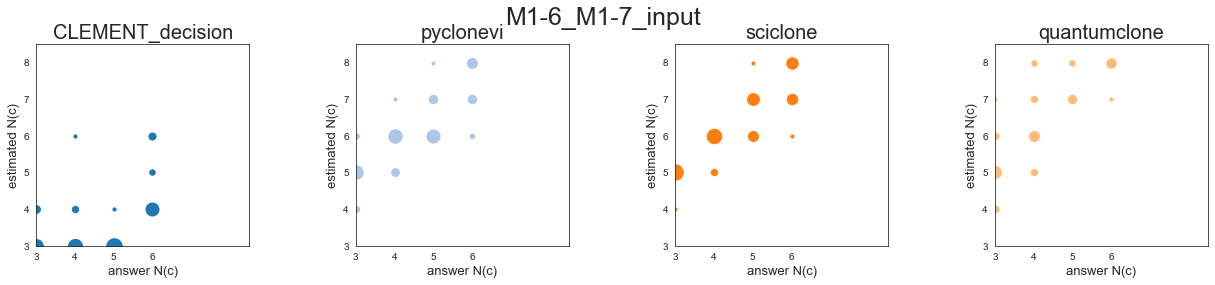

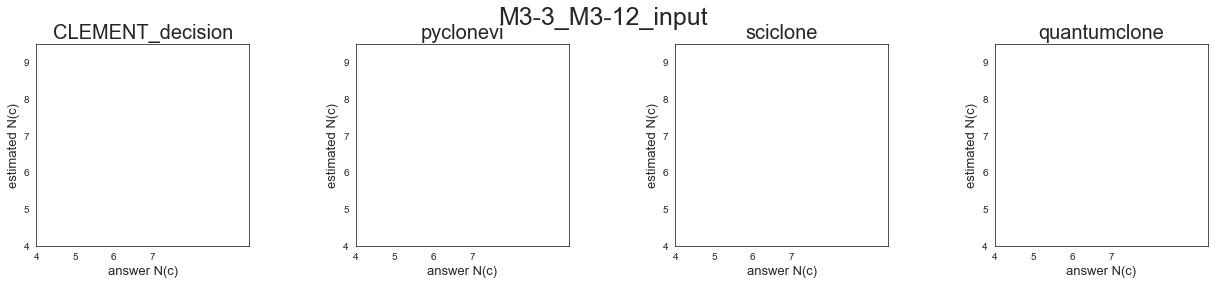

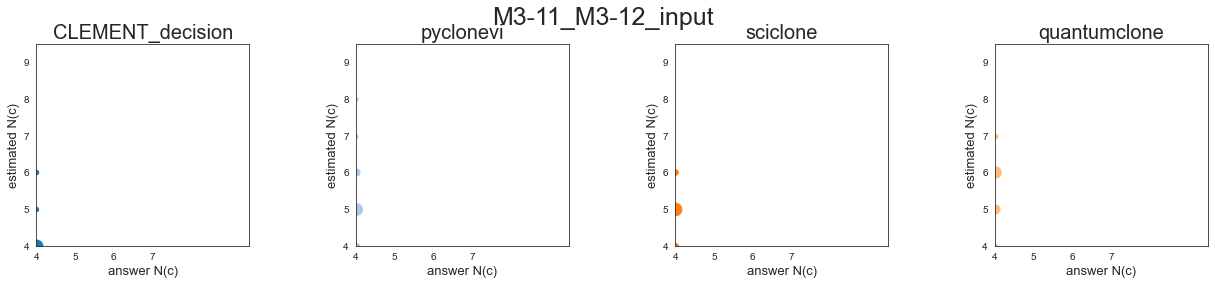

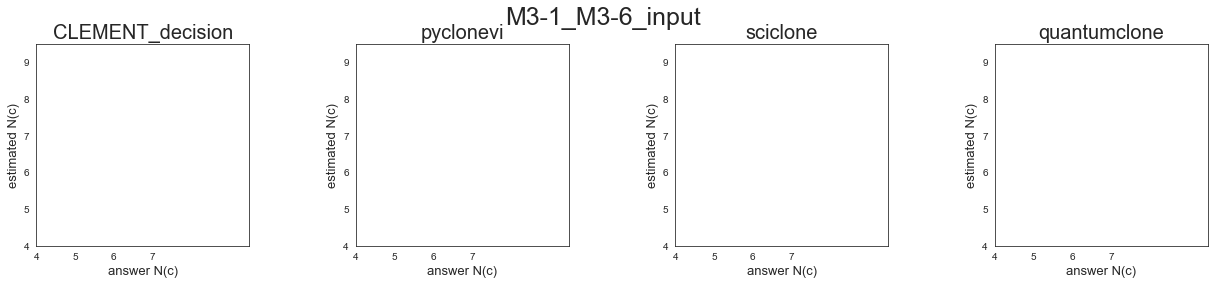

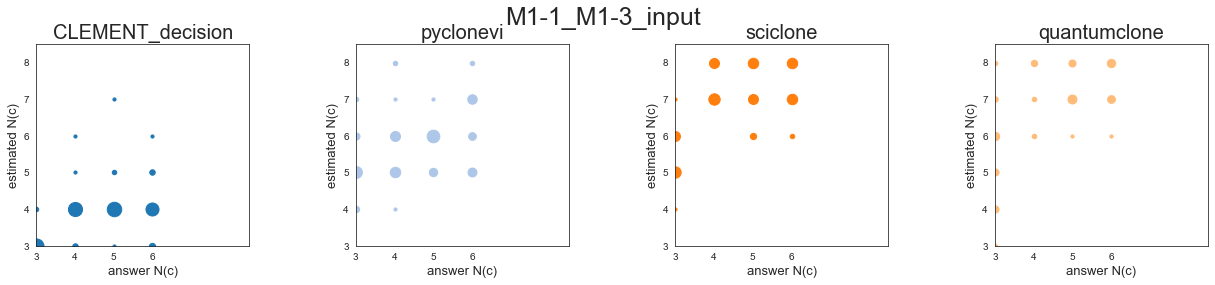

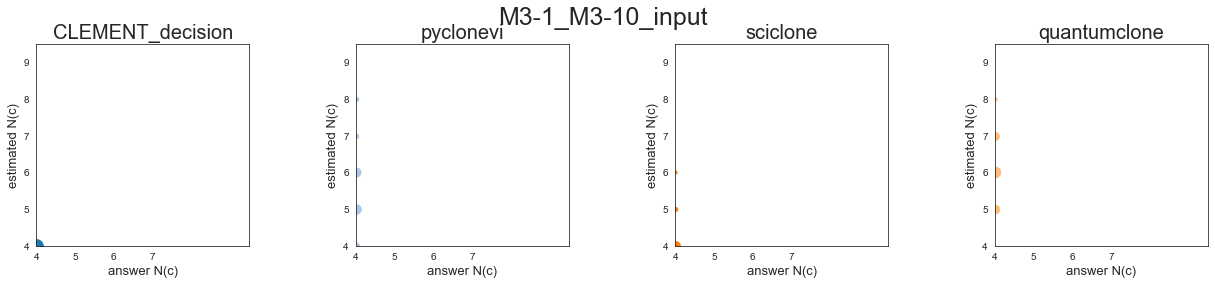

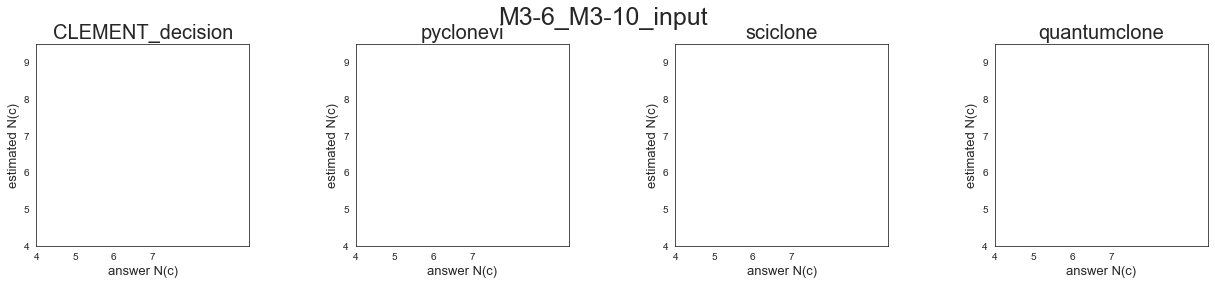

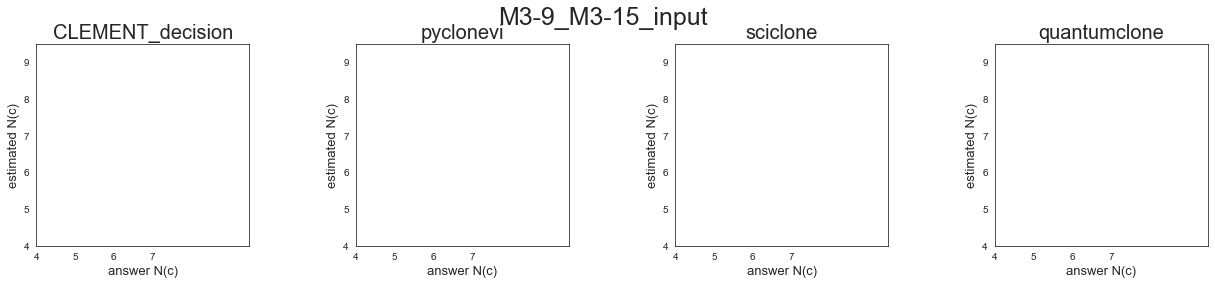

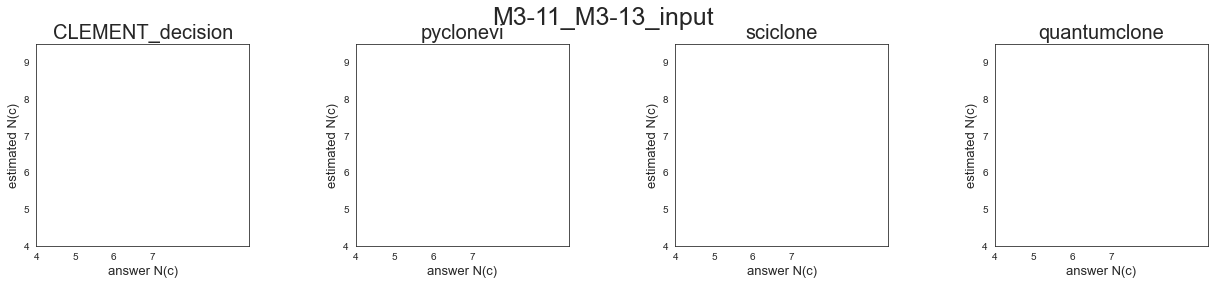

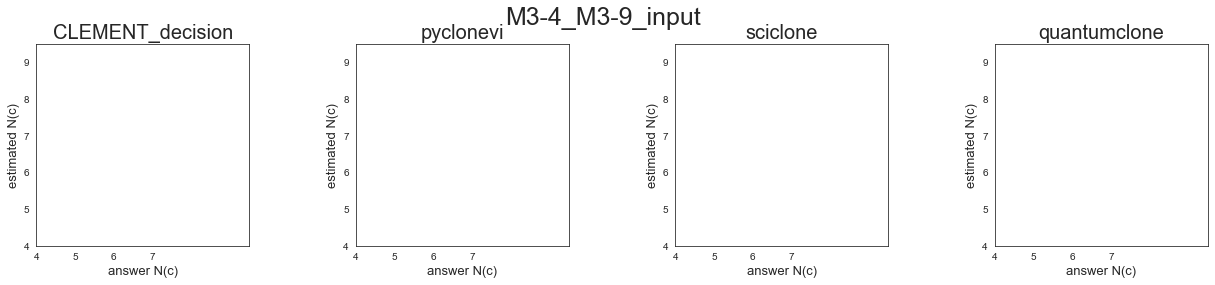

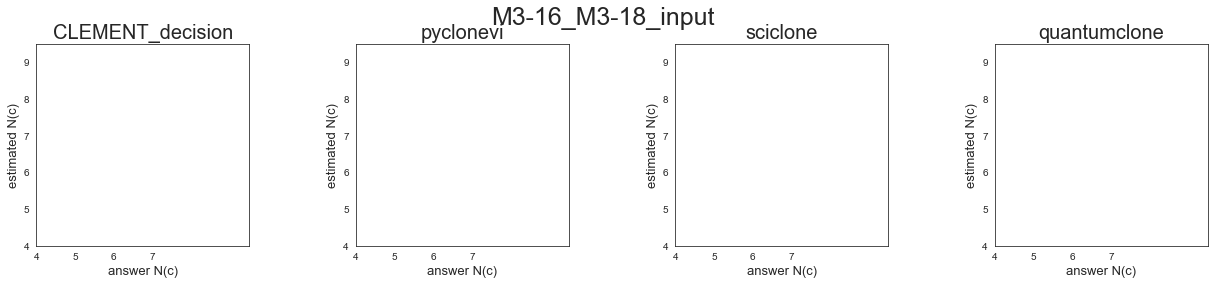

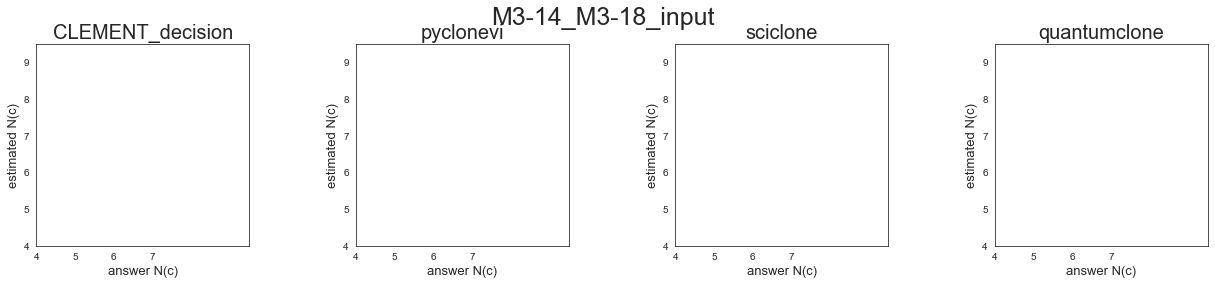

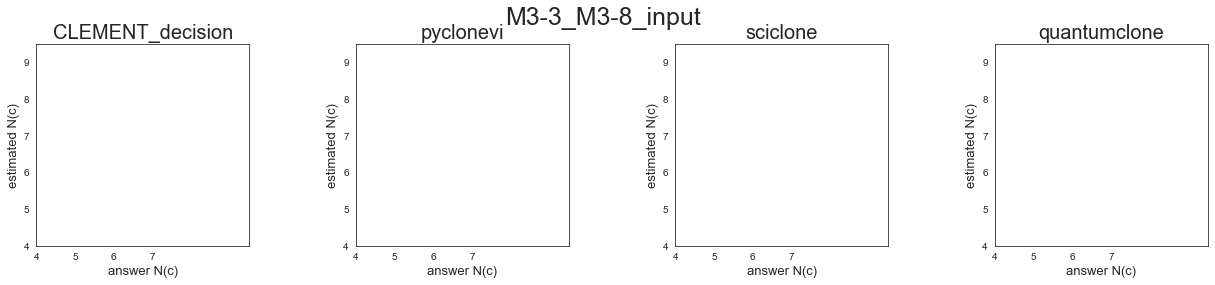

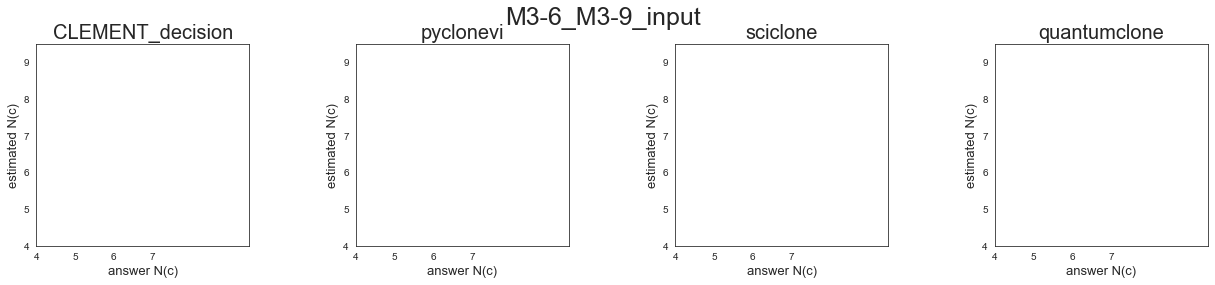

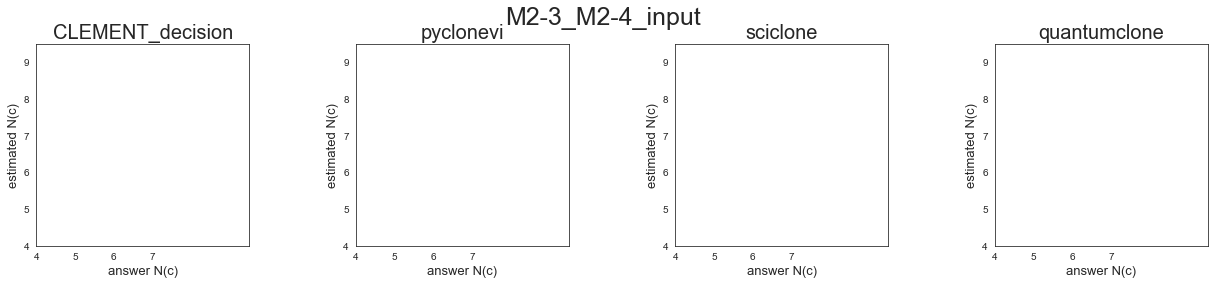

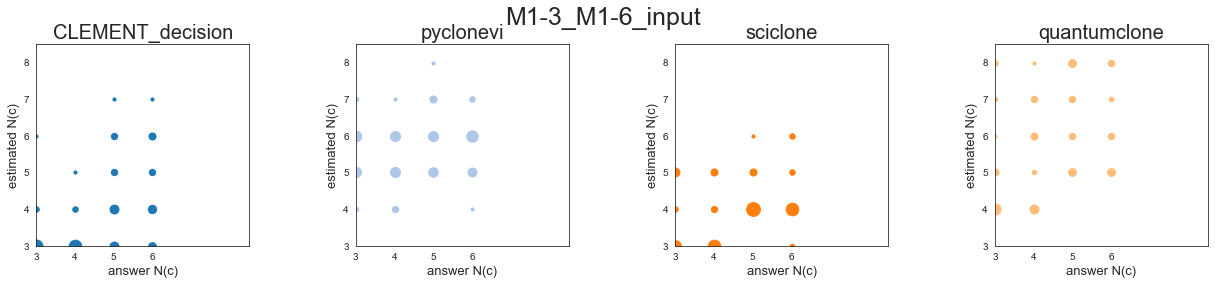

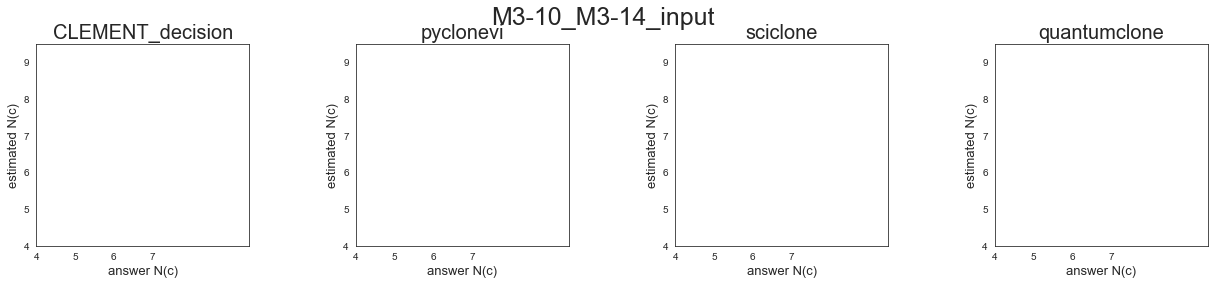

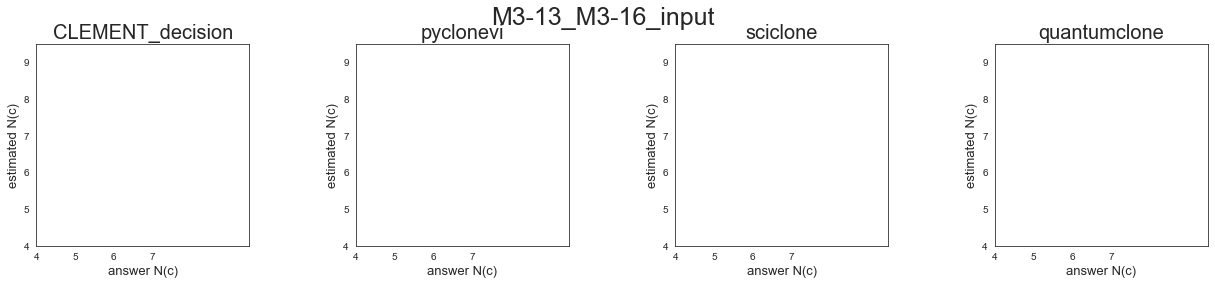

In [30]:
import pandas as pd
import numpy as np
import argparse
import os

class ResultClass:
    def __init__(self, toollist, **kwargs):
        self.score_record = np.zeros ( ( len (toollist), kwargs["BENCHMARK_NO"] ), dtype = "int" )
        self.Yindex_record = np.zeros ( (len (toollist)  , kwargs["BENCHMARK_NO"] ), dtype = "float" )
        self.ARI_record = np.zeros ( (len (toollist)  , kwargs["BENCHMARK_NO"] ), dtype = "float" )
        self.NUM_CLONE_record = np.zeros ( (len (toollist) , kwargs["BENCHMARK_NO"] ), dtype = "int" )
        self.runningtime_record = np.zeros ( (len (toollist) , kwargs["BENCHMARK_NO"] ), dtype = "float" )
        self.f1score_record = np.zeros ( (len (toollist) , kwargs["BENCHMARK_NO"] ), dtype = "float" )

    def acc (self, I, J, score, Yindex, ARI, NUM_CLONE_answer, runningtime, f1score):
        self.score_record[J , I] = score
        self.Yindex_record[J , I] = Yindex
        self.ARI_record[J , I] = ARI
        self.NUM_CLONE_record[J , I] = NUM_CLONE_answer
        self.runningtime_record[J , I] = runningtime
        self.f1score_record[J , I] = f1score

def M1only (SAMPLENAME, DIMENSION):
    if DIMENSION == "1D":
        return True
    elif DIMENSION == "2D":
        if (SAMPLENAME.split("_")[0][1] == "1") & (SAMPLENAME.split("_")[1][1] == "1"):
            return True
    elif DIMENSION == "3D":
        if (SAMPLENAME.split("_")[0][1] == "1") & (SAMPLENAME.split("_")[1][1] == "1") & (SAMPLENAME.split("_")[2][1] == "1") : 
            return True
        
    return False

if __name__ == "__main__":    
    import argparse 
    import palettable
    import matplotlib
    import numpy as np
    import seaborn as sns
    from scipy.stats import ttest_ind
    import itertools, glob, os
    from sklearn.metrics import mean_squared_error
    from matplotlib.axes._axes import _log as matplotlib_axes_logger
    matplotlib_axes_logger.setLevel('ERROR')
    


    # parser = argparse.ArgumentParser(description='The below is usage direction.')
    # parser.add_argument('--COMBINED_OUTPUT_DIR', type = str)
    # parser.add_argument('--BENCHMARK_NO', type = int)
    #parser.add_argument('--OUTPUT_JPG', type = str)

    kwargs = {}
    # args = parser.parse_args()
    # kwargs["COMBINED_OUTPUT_DIR"] = args.COMBINED_OUTPUT_DIR
    # kwargs["BENCHMARK_NO"] = int(args.BENCHMARK_NO)
    #kwargs["OUTPUT_JPG"] = args.OUTPUT_JPG

    global NUM_CLONE
    tabl = palettable.tableau.Tableau_20.mpl_colors
    safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

    colorlist = [i for i in tabl]
    sns.set_style("white")
    #sns.set_palette("tab10")
    sns.set_palette(sns.color_palette(colorlist))

    font_dir = "/home/goldpm1/miniconda3/envs/cnvpytor/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/"
    font_dirs = matplotlib.font_manager.findSystemFonts(fontpaths=font_dir, fontext='ttf')
    for font in font_dirs:
        matplotlib.font_manager.fontManager.addfont(font)
    matplotlib.rcParams["font.family"] = 'arial'

    DIMENSION = "2D"
    DIR = "/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_" + DIMENSION
    DIR_LIST = glob.glob(DIR + "/*_input")
    SAMPLENAME_LIST = [i.split("/")[-1] for i in DIR_LIST]


    y_pred_sample = [[]] * 4
    y_answer_sample = [[]] * 4
    y_pred_bunch = [[]] * 4
    y_answer_bunch = [[]] * 4

    #for SAMPLENAME in ['M1-2_M1-3_input', 'M1-2_M1-5_input', 'M1-2_M1-6_input', 'M1-2_M1-8_input', 'M1-3_M1-5_input', 'M1-3_M1-6_input', 'M1-3_M1-8_input', 'M1-5_M1-6_input', 'M1-5_M1-8_input', 'M1-6_M1-8_input']:
    for SAMPLENAME in SAMPLENAME_LIST:
        print (SAMPLENAME)
        fig, ax = matplotlib.pyplot.subplots(1, 4, figsize = (21,4))
        fig.subplots_adjust (wspace = 0.5, hspace = 0.2, bottom = 0.15, top = 0.85)
        
        OUTPUT_DIR = "/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_" + DIMENSION + "/RMSE/" + SAMPLENAME + ".jpg"
        #os.system ("rm -rf " + "/".join (OUTPUT_DIR.split("/")[0:-1])  ) 
        os.system ("mkdir -p " + "/".join (OUTPUT_DIR.split("/")[0:-1]) )
        
        for NUM_CLONE in range (0, 4):
            kwargs["COMBINED_OUTPUT_DIR"] = DIR + "/" + SAMPLENAME + "/500_" + str( NUM_CLONE ) + "_0.1_0.1"
            kwargs["SAMPLENAME"] = SAMPLENAME
            kwargs["BENCHMARK_NO"] = 30
            if "M1" in kwargs["COMBINED_OUTPUT_DIR"]:
                kwargs["NUM_CHILD_CLONE"] = 3
            elif ("M2" in kwargs["COMBINED_OUTPUT_DIR"]) | ("M3" in kwargs["COMBINED_OUTPUT_DIR"]) :
                kwargs["NUM_CHILD_CLONE"] = 4

            toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]
            
            result = ResultClass(toollist, **kwargs)

            i_real = 0
            for i in range (kwargs["BENCHMARK_NO"]):
                for j, tool in enumerate( toollist ):
                    try:
                        inputdf = pd.read_csv ( kwargs["COMBINED_OUTPUT_DIR"] + "/" + str(i) + "/" + tool + ".results.txt", sep = "\t", header = None)

                        Yindex, runningtime, f1score = 0, 0, 0
                        for k in range (inputdf.shape[0]):
                            if inputdf.iloc[k][0] == "score":
                                score = int ( inputdf.iloc[k][1].split("/")[0])
                            if inputdf.iloc[k][0] == "Y-index":
                                Yindex = float ( inputdf.iloc[k][1] )
                            if inputdf.iloc[k][0] == "ARI":
                                ARI = float ( inputdf.iloc[k][1] )
                            if inputdf.iloc[k][0] == "NUM_CLONE":
                                NUM_CLONE_answer = int ( inputdf.iloc[k][1] )
                            if inputdf.iloc[k][0] == "runningtime":
                                runningtime = int ( inputdf.iloc[k][1] )
                            if inputdf.iloc[k][0] == "F1":
                                if inputdf.iloc[k][1] != "None":
                                    f1score = float ( inputdf.iloc[k][1] )
                                else:
                                    f1score = 0

                        result.acc (i_real, j, score, Yindex, ARI, NUM_CLONE_answer, runningtime, f1score)

                    except:
                        i_real = i_real - 1          # 뭔가 오류가 나서 result가 안 나오는 것도 있다
                        continue
                i_real = i_real + 1


            # Seaborn을 위해 df를 만들기
            df = pd.DataFrame (columns = ["tool", "score", "Y-index", "ARI", "NUM_CLONE", "f1score", "runningtime"] )
            matrix = []
            for j, tool in enumerate( toollist ):
                for k in range (1, i_real ):
                    matrix.append ( [tool, result.score_record[j][k], result.Yindex_record[j][k], result.ARI_record[j][k], result.NUM_CLONE_record[j][k], result.f1score_record[j][k], result.runningtime_record[j][k]] )

            df = (pd.DataFrame.from_records (matrix, columns = df.columns))
                    

            for j, tool in enumerate( toollist ):
                value_count = df [df ["tool"] == tool ] ["NUM_CLONE"].value_counts()

                #print ("{} -> value_count : {}".format (tool, value_count))

                value_count_dict = {}      # {2:8, 3:69, 4:148, 5:112, 6:26, 7:17}
                for i in value_count.index:
                    value_count_dict [i] = value_count.loc[i]
                    ax[j].scatter ( x = NUM_CLONE + kwargs["NUM_CHILD_CLONE"] , y = i, s = value_count_dict[i] * 10, c = colorlist[j], label = value_count_dict[i])
                
                y_pred =  (  list ( df [df ["tool"] == tool ] ["NUM_CLONE"] ) )
                y_pred_sample[j] = y_pred_sample[j] + y_pred
                y_pred_bunch[j] = y_pred_bunch[j] + y_pred
                y_answer = [NUM_CLONE + kwargs["NUM_CHILD_CLONE"]] * len (y_pred)
                y_answer_sample[j] =  y_answer_sample[j]+ y_answer
                y_answer_bunch[j] = y_answer_bunch[j] + y_answer
                try:
                    RMSE = mean_squared_error( y_answer , y_pred) ** 0.5
                except:
                    print (len (y_answer), len(y_pred))

                print ("\t{}\t{}\tRMSE : {}".format(NUM_CLONE, tool, RMSE))


                ax[j].axis ( [ kwargs["NUM_CHILD_CLONE"], 5.5 + kwargs["NUM_CHILD_CLONE"] , kwargs["NUM_CHILD_CLONE"], 5.5 + kwargs["NUM_CHILD_CLONE"] ]) 
                ax[j].set_xticks (np.arange (kwargs["NUM_CHILD_CLONE"], 4 + kwargs["NUM_CHILD_CLONE"], 1 ))
                ax[j].set_yticks (np.arange (kwargs["NUM_CHILD_CLONE"], 6 + kwargs["NUM_CHILD_CLONE"], 1 ))
                ax[j].xaxis.label.set_fontsize(13)
                ax[j].yaxis.label.set_fontsize(13)
                ax[j].set_xlabel ("answer N(c)")
                ax[j].set_ylabel ("estimated N(c)")
                ax[j].set_title (tool , size = 20)
                fig.suptitle (kwargs["SAMPLENAME"], fontsize = 25)

                #ax[j].legend()
        
        
        # Sample RMSE (clone 다 합친 것)를 tool 4개마다 계산하기
        for j, tool in enumerate( toollist ):
            print ("\t\t{}\tSample RMSE : {}".format (tool,  mean_squared_error( y_pred_sample[j]  , y_answer_sample[j] ) ** 0.5  ))
        
        fig.savefig ( OUTPUT_DIR )
        fig.show()


    print ("\n\n")
    for j, tool in enumerate( toollist ):
        print ("{}\tTotal RMSE : {}".format (tool,  mean_squared_error( y_pred_bunch[j]  , y_answer_bunch[j] ) ** 0.5  ))

# bash simulationdataset_pipe2_benchmark.sh --COMBINED_OUTPUT_DIR /data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/simulation_2D/clone_4 --SAMPLENAME simulation_2D_clone_4 --BENCHMARK_NO 100 --OUTPUT_TTEST /data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/simulation_2D/clone_4/ttest.txt --OUTPUT_JPG /data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/simulation_2D/clone_4/benchmark.pdf
# bash simulationdataset_pipe2_benchmark.sh --COMBINED_OUTPUT_DIR /data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/simulation_2D/clone_5 --SAMPLENAME simulation_2D_clone_5 --BENCHMARK_NO 100 --OUTPUT_TTEST /data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/simulation_2D/clone_5/ttest.txt --OUTPUT_JPG /data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/simulation_2D/clone_5/benchmark.pdf